# block party

<i>local policy information accessible and byte-sized</i>



block party generates a summary and transcript of community board meetings directly from the discussion recording. To learn more about these processes, feel free to check out the open-source project hosted on Github. 

In [1]:
def read_summary(file_name,get_prop=None):
    import os
    import json
    
    path_to_json = os.path.join(os.getcwd(),
                             f'../json_objects//{file_name}.json')
    json_files = json.load(open(path_to_json, 'r'))
    if get_prop is None:
        output = json_files
        return output
    else:
        output = json_files.get("data").get('properties').get(get_prop)
            
        full_word_count = json_files.get("data").get('properties').get('wordCountFullTranscript')
        summary_word_count = json_files.get("data").get('properties').get('wordCountSummary')
        word_count = list(dict(list(full_word_count.items()) + list(summary_word_count.items())).keys())
        #[display(Markdown(f"<font size=\"5px\">{chunk}</font><br/>")) for chunk in output_list]
        return output, word_count

In [2]:
def summarize_text(text_input=None, ratio_input=None, word_count=None):
    """
    Generate summary from the sentences of transcript, using Gensim
    :param text_input: punctuated transcript
    :param ratio_input: proportion of transcript to output as summary
    :param word_count: if entered
    :return: summary of transcript that is shortened to the ratio proportion
    """
    from gensim.summarization import summarize

    summary = summarize(text_input, ratio=ratio_input, word_count=word_count)
    return summary

In [3]:
def text_length(text_input):
    import readtime
    length = readtime.of_text(text_input)
    return length

In [4]:
def make_summary(input_text, phrase_list_input, word_count):
    import spacy
    from spacy.matcher import PhraseMatcher
    nlp = spacy.load('en_core_web_sm')
    
    nlp_text = input_text
    # apply spacy nlp
    doc = nlp(nlp_text)

    # apply matcher
    matcher = PhraseMatcher(nlp.vocab)
    terms = phrase_list_input
    # Only run nlp.make_doc to speed things up
    patterns = [nlp.make_doc(text) for text in terms]
    matcher.add("test", None, *patterns)
    
    # get key sentences
    important_sentences = []
    for sent in doc.sents:
        for match_id, start, end in matcher(nlp(sent.text)):
            if sent.text not in important_sentences:
                important_sentences.append(sent.text)
        else:
            continue
    
    
    
    input_summary = " ".join(important_sentences)
    summary = summarize_text(input_summary, ratio_input=None, word_count = word_count)    
    return summary

In [23]:
def make_summary_topic(topic_title, word_list):
    from IPython.display import display, Markdown
    try:
        summary = make_summary(full, word_list, 200)
        if len(summary) != 0:
            display(Markdown(f"<font size=\"6px\">{topic_title}:</font><br/>"))
            print(text_length(summary))
            output_list = summary.split('\n')
            [display(Markdown(f"<font size=\"5px\">{chunk}</font><br/>")) for chunk in output_list]
        else:
            pass    
    except ValueError:
        pass

In [30]:
def make_executive_summary():
    from IPython.display import display, Markdown
    summary = make_summary(full, keys, 500)
    display(Markdown(f"<font size=\"6px\">Summary:</font><br/>"))
    print(text_length(summary))
    output_list = summary.split('\n')
    [display(Markdown(f"<font size=\"5px\">{chunk}</font><br/>")) for chunk in output_list]

In [25]:
def generate_topics(input_text, topic_title, word_list):
    from IPython.display import display, Markdown
    display(Markdown(f"<font size=\"8px\">{topic_title}</font><br/>"))
    display(Markdown("<font size=\"3px\">Keywords used:</font><br/>"))
    display(Markdown(f"<li>{str(word_list)[1:-1]}</li>"))
    
    # Generate Summary
    make_executive_summary()

    # Generate Education topic
    make_summary_topic("Education", education)

    # Generate Transportation topic
    make_summary_topic("Transportation", transportation)

    # Generate Community topic
    make_summary_topic("Community", community)

    # Generate Governance topic
    make_summary_topic("Governance", governance)

    # Generate Envrionmental topic
    make_summary_topic("Envrionmental", environmental)


In [38]:
transportation = ["ferry", "transportation", "cycle", "lane", "rotunda", "curb", 
    "bus", "subway", "car", "driving", "avenue", "e-bikes", "bicycles", "bicycle", "cyclist", "cycling",
    "river", "scooter", "cruise", "driveway", "terminal", "barge", "pier", "gutter", "bike", "stroller", "transit",
  "gridlock", "pavement", "walkway", "helmet", "highway", "curbside", "ramp", "moped",
  "rideshare", "ride", "helicopter", "helicopters", "crosswalk", "intersection", "freight", "rail", "railway",
    "promenadfe", "roadway", "motor", "vehicle",  "vehicular", "wheeled", "pedal", "congestion", "metro",
  "plowing", "signage", "MTA", "CitiBike", "DOT", "D.O.T"]

In [53]:
community = ["DDC", "PSA", "sidewalk","MIH", "AMI", "townhouse","housing","landlord", "apartment", "eviction", "high-rise", "kitchen", "rent", 
           "rental","buildings", "NYCHA", "police","homeless", "alcohol", "shelter","De Blasio","ADA",
  "condominium", "furniture", "real estate", "rooftop", "bed", "room", "tenant", "elevators", "heating", "vacancy"]

In [33]:
environmental = ["global warming","garden", "park", "tree", "bush", "greenway", "green", "air", "planters", "fence", 
                 "outdoor","coastal", "dog", "turf", "planting", "seed", "comfort station", "swings",  
    "trees", "playground", "plant", "gate", "bench", "sandbox"]
education = ["school", "student","teacher","education", "class", "remote learning", "bullying", "bully",
  "college", "university", "curriculum", "blended", "enrichment", "pre-k", "kindergarten", " learning labs",
  "k-8", "campus", "high school", "teachers", "report card", "classroom", "principal", "academic", "educate",
            "ACES", "DOE"]

In [34]:
governance = ["budget", "ballot", "voting", "elections", "polling", "presidential", "absentee"]

In [ ]:
['0CaLN3JVqQU', '04tFfJSPXnI', 'e3P7x9pBy_A', 'h-DFxf6e8EQ', 'ofiPj8zrqtU']

In [58]:
video_id_list = ["CONsQ0C4l8o","hTjMrcmSMzo", "lDdOi2k_7R8", "Mszdq4hXBbk", "0lGIV_phj4k", "VMa0mgsCfdA", "BnSv2rB3sew"]

In [60]:
video_id_list = list(set(['CGACxWLdbwY', 'Mszdq4hXBbk', 'CONsQ0C4l8o', 'L92tc4z4n3o', '0CaLN3JVqQU', 'hTjMrcmSMzo', 'UzAK2WgIyjc', 'bLnv23J9SyM', '7zcp8XK5o2k', '7VISaOjX1Wc', 'ZG4Wwc-hDXU', 'XLDAQb2sIlQ', 'lDdOi2k_7R8', '0lGIV_phj4k', 'llgmHkG-6ik', 'DkUAeE9kAKU', 'VMa0mgsCfdA', 'h-DFxf6e8EQ', '1PwvDEjuyFc', 'b-XkU0OUk4E', 'BnSv2rB3sew', 'R-6aV2Q9b7M', '5C4JJZxEuWU', 'AVrE_YJPHG0', 'G0AQMoXFLH0', 'yOhg71XEdoc', 'Mpq77fcKJ9c', 'N4qLcmbbD4I', 'ryP_b-kq2Yk', 'ofiPj8zrqtU&t=5s']))


In [65]:
len(video_id_list)

28

In [54]:
video_id_list

['0CaLN3JVqQU']

In [57]:
set(video_id_list)

{'0CaLN3JVqQU',
 '0lGIV_phj4k',
 'BnSv2rB3sew',
 'CGACxWLdbwY',
 'CONsQ0C4l8o',
 'L92tc4z4n3o',
 'Mszdq4hXBbk',
 'UzAK2WgIyjc',
 'VMa0mgsCfdA',
 'bLnv23J9SyM',
 'hTjMrcmSMzo',
 'lDdOi2k_7R8'}

In [19]:
import urllib
import os
from IPython.display import display, Markdown

In [62]:
path = os.path.join(os.getcwd(),'../../community_board_meeting/json_objects')
# get all files in directory
directories = os.listdir( path )

In [63]:
processed = [x.split('.json')[0] for x in directories]

In [64]:
video_id_list = list(set(video_id_list) & set(processed))
#video_id_list = ["hTjMrcmSMzo"]

In [66]:
for i in range(len(video_id_list)):
    video_id = video_id_list[i]
    
    author = read_summary(video_id).get('data').get('YoutubeMetadata').get('author')
    display(Markdown(f"<font size=\"5px\">{author}</font><br/>"))
    
    title = read_summary(video_id).get('data').get('YoutubeMetadata').get('title')
    display(Markdown(f"<font size=\"3px\">{title}</font><br/>"))
    
    date = read_summary(video_id).get('data').get('YoutubeMetadata').get('publishDate')
    display(Markdown(f"<font size=\"2px\">{date}</font><br/>"))
    
    description = read_summary(video_id).get('data').get('YoutubeMetadata').get('shortDescription')
    description = description.replace('\\n'," ")
    description = urllib.parse.unquote(description)
    description = description.encode("ascii", "ignore")
    
    display(Markdown(f"<font size=\"2px\">{description}</font>"))

    print(read_summary(video_id).get('data').get('properties').get('fillerWordCount'))
    print(read_summary(video_id).get('data').get('properties').get('readTimeSummary'))
    print(f"{read_summary(video_id).get('data').get('properties').get('readTimeFullTranscript')}\n")

    full, keys = read_summary(video_id, 'fullTranscript')

    generate_topics(full,"Summary", keys)

<font size="5px">MCB5</font><br/>

<font size="3px">October 27th</font><br/>

<font size="2px">2020-10-28</font><br/>

<font size="2px">b''</font>

{'uh': 83, 'um': 427}
6 min read
51 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'absentee', 'election', 'housing', 'budget', 'funding', 'state', 'capital', 'enforcement', 'elections', 'requests', 'needs', 'member', 'request', 'health'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">First, we have non- action items where we're going to hear about changes to the election law that the state legislature has sort of made in the last two years and some current voting related legislative priorities.</font><br/>

<font size="5px">So to that end, councilman powers is introducing a new resolution on Thursday at the City Council's full stated meeting in support of the state bills that authorize the board of elections in New York state to establish absentee ballot drop- Now, while we would have loved to have these, you know for these drop- off boxes for this current election that we're we are experiencing right now.</font><br/>

<font size="5px">The city Board of elections reported that they mailed out over 775,000 absentee ballots to voters in June and that's roughly 12 times the amount in 2016 presidential primary, and you know, while this past spring, you may have heard and read in the news that governor Cuomo issued the executive order to allow all new yorkers to cite risk of exposure to Covid-19 as a valid reason to requested absentee and in that same one fell swoop.</font><br/>

<font size="5px">We all know that you know a part of the equation is the United States postal service and that's beyond New York state's operations so like, for instance, it was found in a recent inspector general investigation that this summer, the newly appointed Master General implemented a policy change that you know was purported to reduce costs and inefficiencies, but actually removed hundreds of high- speed, mail, sorting machines and cut overtime, so also in July the usps they sent a letter to all the states warning them that if they did not require voters to request mail- in ballots at least 15 days before the election, there could be a risk that the usps would not be able to deliver the ballot in time for the votes to be counted.</font><br/>

<font size="5px">So the councilman's resolution, like I said, he's going to introduce on Thursday the City Council, is the support of the Albany bills that we want to see past they're sponsored by your Senator Brad Hoyleman and Assembly member Dick Godfrey, and so I am not seeing any, but I have a question myself following on from Justin's comments about attempts to professionalize the board, the Election Board and that's a state sort of local endeavor.</font><br/>

<font size="5px">It has passed in the house and then the second item is in regard to an oversight hearing that took place on September 25th by the committee on governmental operations chaired by council member Fernando Cabrera was entitled election administration during Covid-19 pandemic after governor Cuomo issued a series of executive orders to ensure all new yorkers could vote by absentee ballot.</font><br/>

<font size="5px">I know we talk about the importance of lightner and green space in our survey, but it's important just to add that again in the district needs statement, if everyone's okay with it, so I'm going to turn it over to you for comments for changes for suggestions to that document.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">, I'm the chair of the budget, education and City services.</font><br/>

<font size="5px">In the summer and pre- approve all overtime requests and treat all election mail as first class priority mail, but this just goes to show like these experiences of this past primary election, that the operational failures and the policy changes at Usps.</font><br/>

<font size="5px">Silo the services to prevent homeless was the number one issue in youth, education and child welfare.</font><br/>

<font size="5px">I do not love that the funding for mental health profession in every middle in high school is last on the list.</font><br/>

<font size="5px">The director of the public realm keep it at number, 12 put 13 and 14 at the end and move the DOE request for funding a mental health professional in every middle and high school.</font><br/>

<font size="5px">and we're going to bump up number 25, which is the funding of mental health professional in every middle high school in our district and we're going to identify those very specifically Thank you so much for moving up that really important mental health professional for every school.</font><br/>

<font size="5px">In our district I mean every school around the city just on the summer use employment.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">We want to make clear that the caveat is that we would like enforcement of the traffic safety issues, which includes cars and bicycles, but we would like to see the enforcement shifted, so we're not asking for an NYPD enforcement, but rather that this responsibility shifts to D.O.T in Parks culture and the other community facilities.</font><br/>

<font size="5px">We rank the creation of the office of the public realm, along with appropriate staffing for that office as number one, I'm sure you recall, land use, talked about the office of the public realm and heard it parks transportation.</font><br/>

<font size="5px">This whole move to shift the enforcement to DOT I have not seen good things with D.O.T in terms of, as you know, my be in my bonnet about 14th street and that they never came clean with the data that they promised and then by executive fiat turning it into a busway which, by the way, does not have bike lanes If it's not too late for that on page seven under the topic of transportation, you know you talk about.</font><br/>

<font size="5px">You know to cover like parking or illegal driving in bus lanes or bike lanes.</font><br/>

<font size="5px">so you're saying for bike, Lane Safety and oh, I just meant, I would add parking or illegal driving in bus lanes and bike lanes as kind of a clause to that one.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">You see that these the requests sort of are in line and aligned with the three top issues that we've seen, which are homelessness and the needs of the homeless in the district and noise complaints, as you go further down and also SBS small, you know small business and creating those supports for those sort of businesses in the district renee.</font><br/>

<font size="5px">I do not know if it's police spending or if it's funding or grants to the Times, Square, Alliance or the local bids It addresses partially, I guess some of the homeless issues, so it does not have to say broadway, but that's what I'm thinking?</font><br/>

<font size="5px">No, let me ask you a question number six, which is create a project- based rental subsidy for homeless set- aside units separate from supporting housing.</font><br/>

<font size="5px">You'll see that the first one increased budget for Hpd's our space initiative funds, new construction rental units, the second one is a remediation in a supporting housing site in our district medical respite access to open spaces, and then we move into a lot of the DOE asks which are for the students in our district.</font><br/>

<font size="5px">You know new construction term sheet program, so it funds supportive housing development.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">So to that end, councilman powers is introducing a new resolution on Thursday at the City Council's full stated meeting in support of the state bills that authorize the board of elections in New York state to establish absentee ballot drop- The city Board of elections reported that they mailed out over 775,000 absentee ballots to voters in June and that's roughly 12 times the amount in 2016 presidential primary, and you know, while this past spring, you may have heard and read in the news that governor Cuomo issued the executive order to allow all new yorkers to cite risk of exposure to Covid-19 as a valid reason to requested absentee and in that same one fell swoop.</font><br/>

<font size="5px">It has passed in the house and then the second item is in regard to an oversight hearing that took place on September 25th by the committee on governmental operations chaired by council member Fernando Cabrera was entitled election administration during Covid-19 pandemic after governor Cuomo issued a series of executive orders to ensure all new yorkers could vote by absentee ballot.</font><br/>

<font size="5px">As a result, these voters were unable to vote by mail, since state law generally requires absentee balance to be mailed by election day in order to be counted as Justin mentioned, roughly one in five absentee ballots cast in June in the June primary were rejected by the BOE for various reasons, as he said, signatures missing no postmarks.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">I know we talk about the importance of lightner and green space in our survey, but it's important just to add that again in the district needs statement, if everyone's okay with it, so I'm going to turn it over to you for comments for changes for suggestions to that document.</font><br/>

<font size="5px">Okay, any more comments, questions changes, okay, so moving forward just to wrap up we're going to add the light and air language and also language regarding the support of Broadway and the need to revitalize Broadway and its importance to the district on the district needs statement, help them fund conversion of their their air conditioning so that it's covered friendly.</font><br/>

<font size="5px">I did not say that when you, when you go to the end, we only have 29, but I have fun conversion of air conditioning for broadway theaters okay, seeing none, we need a motion and what we're going to do is we're going to restore use, Joseph's language bump that up to number one in the capital budget, we're also going to add Joe Mafia's request regarding funding conversion for air conditionings in the broadway theaters and then Chuck's edition of sanitation, restoring trash cans and additional counts to the district.</font><br/>

<font size="5px">MCB4</font><br/>

<font size="3px">MCB4 October 2020 Clinton\\Hell's Kitchen Land Use Committee</font><br/>

<font size="2px">2020-10-26</font><br/>

<font size="2px">b'AGENDA 1. Update: Radson to Provide Design and Environmental Review Update on the Slaughterhouse Project - 495 11th Avenue  2. Discussion/Vote: Statement of District Needs and Budget Requests for Fiscal Year 2022  3. Old\\\\New Business:'</font>

{'uh': 270, 'um': 338}
7 min read
57 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'building', 'space', 'design', 'housing', 'street', 'project', 'hotel', 'tower', 'plaza', 'base', 'spaces', 'center', 'years'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">, money they got from development, air ride sales, there's no money for a design at present and the other continuing support was 705, 10th avenue and the MTA site , I mean it's not going to go anywhere, but you maintain the habit of requesting the number one request for the board that came from us was more funding for building code enforcement at D.O.B and to raise updating the DOB website as a priority.</font><br/>

<font size="5px">Even bother putting in the request and just be respectful of being respectful of the fact that we do have a budget crunch that we're facing second issue that came up was we after saying all that we want to talk about a way to look at zoning regulations such that waivers, become easy enough that if there's a lot of commercial space that can be used as homes and housing locations, and it violates zoning regulations that there's a mechanism in place for reusing empty space, particularly in Hell's kitchen and Chelsea, that could be used as something different than currently exists in the zoning regulation.</font><br/>

<font size="5px">The land, just south of the plaza, is owned by New York state and operates out of a port authority easement next to the vent tunnel, which we'll talk about the plaza is intended to be a public private partnership to be maintained by Radson, and we want to also provide a safe entry to the Javits center, as well as a space adjacent to the hotel and restaurant, and we also are going to respect the existing infrastructure.</font><br/>

<font size="5px">, so the thing here is, you still have the building floating in the residential tower on the southern corner, where it changes from the limestone color to the brick, and that also, I believe, is set back Yes right, so that's the only thing I think that makes this look odd, because it's a very tall, skinny building and then it seems to float the other side hotel steps up.</font><br/>

<font size="5px">I'll, speak later about the open space when you're ready for that great- I have a few questions about the presentation going back to the first block that had like the Axon metric that had the what was residential and what was hotel and the and the how the base was broken out in terms of commercial space.</font><br/>

<font size="5px">You have to program that in to make sure you design for it Dan, because that's how this kind of density of housing will not work, otherwise, so they'll be compacted and we'll look into the containerized approach, one more question on the housing program and then the public plaza all right, Joe hold on I had a just a quick question for clarification: will there be disburse throughout the building, affordable housing and supportive housing if they're not segregated?</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">We're talking about limiting our requests for things that go beyond public Safety, public health, education and housing.</font><br/>

<font size="5px">It's a gradual transition to that 35 class.</font><br/>

<font size="5px">It's always a pleasure, it's like being in class and learning all that stuff.</font><br/>

<font size="5px">You divine designed a void in between two towers, and I appreciate that as an as a somebody with you know a little education and architecture.</font><br/>

<font size="5px">Thank you again, jd going back to supportive housing studio, one student, one bedroom.</font><br/>

<font size="5px">So we are aware, but right now we really wanted to focus on a specific service to provide adequate services to those with mental illness out of college drug addiction.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">and I think that Jonathan introduced a lot of this already, but just understanding the the site considerations based on the various ownerships that are involved surrounding the site, so one being that the plaza is part of a Map street and then subject to the New York City D.O.T revocable consent.</font><br/>

<font size="5px">Looking down 39th street towards the site, there is a lot of bus queuing that occurs there so taking that into account with the design of the plaza and as you can see, 39th and 11th on the corner, this large masonry wall and just understanding that that's these are the areas across the street and down 39th street.</font><br/>

<font size="5px">The bike lanes that we've discussed and the pedestrian circulation coming from Hudson, Boulevard, Park and street connections via crosswalks across the north side and south side of 39th street, as well as crossing across 38th street, and going up towards along the vent structure and running to the plaza the next one.</font><br/>

<font size="5px">this is this plaza is part of a DOT revocable consent, so it sits in the bed of a street that is under jurisdiction by the state.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Even bother putting in the request and just be respectful of being respectful of the fact that we do have a budget crunch that we're facing second issue that came up was we after saying all that we want to talk about a way to look at zoning regulations such that waivers, become easy enough that if there's a lot of commercial space that can be used as homes and housing locations, and it violates zoning regulations that there's a mechanism in place for reusing empty space, particularly in Hell's kitchen and Chelsea, that could be used as something different than currently exists in the zoning regulation.</font><br/>

<font size="5px">if you notice, so we really see these two buildings as like, as if they were once one and then pulled apart, and I know what you did I did not see any place where the the program space for the supporting housing was located.</font><br/>

<font size="5px">so and we have our constraints of the police whole operation on top of it You have to program that in to make sure you design for it Dan, because that's how this kind of density of housing will not work, otherwise, so they'll be compacted and we'll look into the containerized approach, one more question on the housing program and then the public plaza all right, Joe hold on I had a just a quick question for clarification: will there be disburse throughout the building, affordable housing and supportive housing if they're not segregated?</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">Can you everyone hear me just to make sure and lauren George by the way looks like Richard bears, but just saying that we had two capital budget priority requests from this committee last year, one was listed as a priority, one by the presumably approved by the full board So if anyone wants to add anything to the capital budget.</font><br/>

<font size="5px">So any additional budget requests we're just not even going to put in because it looks you know, as Bob just pointed out there, Even bother putting in the request and just be respectful of being respectful of the fact that we do have a budget crunch that we're facing second issue that came up was we after saying all that we want to talk about a way to look at zoning regulations such that waivers, become easy enough that if there's a lot of commercial space that can be used as homes and housing locations, and it violates zoning regulations that there's a mechanism in place for reusing empty space, particularly in Hell's kitchen and Chelsea, that could be used as something different than currently exists in the zoning regulation.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">, money they got from development, air ride sales, there's no money for a design at present and the other continuing support was 705, 10th avenue and the MTA site The right is from the park looking east over the new Javits expansion and there you can see how some of those medallions really create a little bit of a playful pattern on the building.</font><br/>

<font size="5px">So it's our understanding that the the area up to 39th street will be an upgrade park that is currently in design and anticipated within the next five years or so to be opened and then potentially in the future, this land bridge that would go over up and over the tunnel entrances, but for now also assuming that or for now, under the assumption.</font><br/>

<font size="5px">Also, this granite cobble that you can see there a mix of wood and stainless steel for furniture and then also this pop of the sea green movable furniture there that we're trying to incorporate all of these elements into the design to create this cohesive vocabulary of materials in the area.</font><br/>

<font size="5px">BXCB11</font><br/>

<font size="3px">Full Board Continued 10/2020</font><br/>

<font size="2px">2020-10-26</font><br/>

<font size="2px">b''</font>

{'uh': 4, 'um': 2}
1 min read
1 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'night', 'motion', 'ethics', 'complaints', 'extensions'</li>

<font size="6px">Summary:</font><br/>

1 min read


<font size="5px">I guess the ethics Committee is yahey right, The community board, will continue to review the pending complaints that have been submitted, and that is all we have for now and motion to Adjourn.</font><br/>

<font size="5px">You have a second seconded, I second, yes, all right seconded by Ken, any anyone against or any extensions nope all right motion passes meet and Adjourn.</font><br/>

<font size="5px">Everybody have a good night, everybody.</font><br/>

<font size="5px">Good night thanks everybody for your time meeting ended at 12:10, 12 p.m. Good night, everybody good night, good night.</font><br/>

<font size="5px">MCB4</font><br/>

<font size="3px">MCB4 October 2020 Transportation Committee</font><br/>

<font size="2px">2020-10-26</font><br/>

<font size="2px">b'Wednesday October 21, 2020  AGENDA      1. Presentation: Department of Transportation to Present on Citi Bike Expansion and Infill      2. Committee Discussion/Vote: Pier 79 Ferry Expansion      3. Committee Discussion: Sidewalk Maintenance      4.  Discussion: Bike Safety on 8th Avenue      5.   Committee Discussion: The Improving Helicopter Safety Act of 2019      6.  Committee Discussion/Vote: Statement of District Needs and Budget                Requests      7.  Old/New Business'</font>

{'uh': 331, 'um': 629}
14 min read
108 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'bike', 'street', 'sidewalk', 'parking', 'block', 'bikes', 'system', 'stations', 'lane', 'service', 'cars', 'space', 'program'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">I have twofold question: one is we need more electric bikes, so hopefully you'll be getting more of more of the electric bikes, and you know I think it's great that you're putting these in the area, especially if you put them on the street, but the thing is: and like if you, if I'm going to buy from Coney island to my office or to my work, I need electric bikes, so so, first on the electric bike, so Lyft is continuing to add new electric bikes to the fleet.</font><br/>

<font size="5px">I know you've heard me mention this before, because we've talked about it in my professional cap with gansevoort street issues and having a sidewalk station there, but this is significant, given the fact that when the city begins to bustle again, our sidewalk space will be precious and we need to prioritize people as much as possible in terms of their feet and then bikes and then very small space leave for cars.</font><br/>

<font size="5px">One thing I would be very interested in seeing DOT implementing with this expansion of the CitiBike program is taking another look at the bike stations and seeing, if there's an opportunity that, while we're in the street, where is it, which is a great place to park, bicycles, to incorporate free bike parking racks for nine CitiBikes, so that way, riders that are that are doing one better than CitiBike, which is owning our own bicycles and maintaining them ourselves will also be part of the amenities that are that are happening to us.</font><br/>

<font size="5px">or I guess your second point about city rack installations over the last year, I will say that Covid-19 definitely put a halt, as one would guess to a lot of our non- essential work for some time, but our public space unit has been working on our bike recovery plan to essentially kind of cover areas city- wide, where we are installing additional bike, parking facilities and capacity to help with this increased demand in cycling.</font><br/>

<font size="5px">yes, so you have crosstown now 38 and 39 38 to come in and 39 to to leave, and I think that should encourage that, and maybe a good signaling sign signage would be a good thing to do to say you have a protected bike lane so and 42Nd. Yes, the area from 29th to 44th street is It's something we're going to have to be talking with you all about, because I think it's probably a zone that would be addressed almost in phases, because there are more open space opportunities in some areas and in some areas it's really more like enhanced, vehicular, passageways or pedestrian passageways.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">Yes, I think we're we look to place stations near schools and any really large amenities, so school museum shopping, plaza anywhere, where there's going to be a lot of activity and people coming to or from we want to have a station there.</font><br/>

<font size="5px">So I think it's a reminder that, in addition to enforcement, that we need to have a renewed sense of education , we have a lot of some of our typical education components like on- street teams and going to schools going to different businesses to educate people on how to safely ride a bike and what the rules of the road are.</font><br/>

<font size="5px">So I think it's a great reminder not only about the need for enforcement, but also the need for education, and you know, I think, the as well as looking to place stations in the street as much as possible, which we appreciate your support with not every area is as supportive as taking roadway space for CitiBikes.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">I'm joined by my colleagues, lily, Gordon Covid-19, Brian, Parrott and Caitlin Toner from Dot's bike share program as well as Colleen chatter goon from the Manhattan office, who many of you also have the pleasure of working with so last year, DOT embarked on our five- year phase three CitiBike expansion alongside our partner lifts, and this is going to double the size of the bikeshare system, triple the number of available bikes in the program and since CitiBike launched in 2013, new yorkers and visitors have turned time and again to the CitiBike system as a healthy, safe, fast and affordable transportation alternative and, as the city continues to reopen now in a Covid-19 world.</font><br/>

<font size="5px">kind of the last big, not yet in process fully plan planning zone for Hudson river park, aside for our river research and education center down in Tribeca, and it is in the queue and we have been working on an RFP for that area, which is pretty complicated given all of the transportation and other uses that have leases and lots of issues It's something we're going to have to be talking with you all about, because I think it's probably a zone that would be addressed almost in phases, because there are more open space opportunities in some areas and in some areas it's really more like enhanced, vehicular, passageways or pedestrian passageways.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Please we have a few different ways that we want to do this infill project through our design toolbox, so the first is to add new stations, and the second is to expand existing stations by adding new docks to stations that are already on the ground and then the third is creative design solutions like 3d bridging which you can see here on in this photo, which will allow us to have stations that are both on the sidewalk and road bed.</font><br/>

<font size="5px">Why does not just the thing is that you know once you have that you have people riding on the sidewalk to get to the station There is no need for parking and deliveries, so we really would like very much to put that station in the street bed.</font><br/>

<font size="5px">I know you've heard me mention this before, because we've talked about it in my professional cap with gansevoort street issues and having a sidewalk station there, but this is significant, given the fact that when the city begins to bustle again, our sidewalk space will be precious and we need to prioritize people as much as possible in terms of their feet and then bikes and then very small space leave for cars.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">Why is the DOT budget virtually no dollars for pedestrian most is dedicated for vehicle and roadways.</font><br/>

<font size="5px">Why did the pilots know at the curb and the stops and the corners, but not in the middle of the roadway, and why so much of the sanitation budget is dedicated to roadway and cars and not sidewalk and pedestrian?</font><br/>

<font size="5px">Okay, the last item before all the new business is the discussion of budget.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">One thing I would be very interested in seeing DOT implementing with this expansion of the CitiBike program is taking another look at the bike stations and seeing, if there's an opportunity that, while we're in the street, where is it, which is a great place to park, bicycles, to incorporate free bike parking racks for nine CitiBikes, so that way, riders that are that are doing one better than CitiBike, which is owning our own bicycles and maintaining them ourselves will also be part of the amenities that are that are happening to us.</font><br/>

<font size="5px">and we'll frankly continue to look into as outdoor dining is becoming a more permanent fixture in New York, City All of that stuff gets left behind where we are there's a parks department right next to the park.</font><br/>

<font size="5px">Can we put this because you know we had, especially when the bike lane in Ninth Avenue was coming in, and so we were suggesting red turn arrows because of the danger of people crossing green light, green lights.</font><br/>

<font size="5px">Yet it looks like D.O.T has said they can use our block for outdoor recreational activities and they can close it down to parking cars during those periods.</font><br/>

<font size="5px">MCB7</font><br/>

<font size="3px">CB7 Housing Committee</font><br/>

<font size="2px">2020-10-27</font><br/>

<font size="2px">b''</font>

{'uh': 201, 'um': 319}
8 min read
81 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'housing', 'building', 'buildings', 'money', 'guys', 'work', 'development', 'management', 'problem', 'leaders', 'tenants', 'government', 'state', 'tenant'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">chair of cb7's housing committee meeting So tonight, we're joined by a number of NYCHA attendant leaders in our community district to hear from them a bit about what's going on at each development as well.</font><br/>

<font size="5px">Public housing has been under assault for decades and there's been a lot of abandonment and demolition across the country and in my talking with NYCHA residents over the decades that fear of gentrification and displacement and privatization runs deep When new programs come up what it would mean, everybody wants their buildings renovated and maintained, but there's always been a lot of concern and mistrust and fear of displacement and privatization, and the issues that you're going to be hearing is climbing crime and safety Obviously, repairs the fact that the federal government has largely abandoned nature of public housing, as well as the state wise towers which is going through.</font><br/>

<font size="5px">A lot of residents have not received any leases, so you know everything's up in the air right now, so we really do need to sit down, and you know, have some dialogue with management and determine what is that going to look like once wise towers, finalizes their transition because, as far as I know, there's a timeline where they are saying that leases must be signed by November of this year.</font><br/>

<font size="5px">I mean we want things to improve in the development I think all night tenants have been having that problem throughout New York City Housing Authority, but this building is 24 years old and we've been having a lot of problems with it.</font><br/>

<font size="5px">sorry Larry, of what no, but she was also making a point that some of the tenants are afraid to provide access right now because of the Covid-19 and do not want a lot of people in their unit, particularly some of the seniors, but the place is covered in scaffolding because of all the asbestos removal So she said crime and safety is the big issue from her point of view right now, and that means working with the 20th and working with PSA and doing vertical controls and doing whatever it takes to make that development a secure place.</font><br/>

<font size="5px">Well, do you mean that, and inside or under the scaffolding, if you're sliding in between the buildings, as you go from place to place, it's just hard At a past housing committee meeting, we discussed maybe some kind of working group for the NYCHA developments in our neighborhood that could include a representative from elected officials and from NYCHA to sort of just get everyone to the table.</font><br/>

<font size="5px">and we can maybe use that information just to get a picture of what needs to be done for our area, because I do know when I go on the dashboard it'll tell me which buildings have issues with elevators Basically we work regarding Riverside, so I think you know just tonight alone, we've learned a lot from each other, I've experienced that, but thank you guys.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So I know that a few resident leaders did not want to be in a room with 40 individuals, so they prefer to participate online By the way I sent her on the link for a virtual meeting right, there's several links and emails going out about the meetings that are being held at police headquarters, and I saw a mona Lisa yesterday and then you know as folks join, especially our NYCHA tenant leaders.</font><br/>

<font size="5px">Public housing has been under assault for decades and there's been a lot of abandonment and demolition across the country and in my talking with NYCHA residents over the decades that fear of gentrification and displacement and privatization runs deep When new programs come up what it would mean, everybody wants their buildings renovated and maintained, but there's always been a lot of concern and mistrust and fear of displacement and privatization, and the issues that you're going to be hearing is climbing crime and safety Obviously, repairs the fact that the federal government has largely abandoned nature of public housing, as well as the state wise towers which is going through.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">If madeline innocent who shares our nature task force might be stuck still poll working because of the intense interest in early voting, which is fantastic.</font><br/>

<font size="5px">Probably the right meeting will be the full board or the budget.</font><br/>

<font size="5px">The community boards are required to have a budget hearing at some point before we vote on the budget priorities.</font><br/>

<font size="5px">So if you want to be heard on any of the budget priorities prior to the vote on them, those are your opportunities.</font><br/>

<font size="5px">But again, this is not the meeting to talk about the budget priorities.</font><br/>

<font size="5px">then the other big chunk of public housing is Frederick, Douglass and a mix of other buildings and that's between 100th and 105Th Street, and you know going back to Ronald, Reagan Hud and his cutting the national budget for producing housing and for maintaining it.</font><br/>

<font size="5px">I mean I think, ernesto to your point about voting that we do not know about I think there was 30 million in the state budget that has never been that was allocated.</font><br/>

<font size="5px">so you know and the budget constraint as now a number of people have mentioned, you know, is in the tens of billions of dollars, and you know the chair of the committee on housing is eliquid empress.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">A lot of residents have not received any leases, so you know everything's up in the air right now, so we really do need to sit down, and you know, have some dialogue with management and determine what is that going to look like once wise towers, finalizes their transition because, as far as I know, there's a timeline where they are saying that leases must be signed by November of this year.</font><br/>

<font size="5px">and we're worried about that and that and on some gate that they put in front of the some fence they put on the side of one of the gates on the west side of the development here.</font><br/>

<font size="5px">So they do not tell us anything they like up in the air The purpose of tonight's meeting is to try to get at issues that are confronting our neighbors who live in public housing, and the chair of the meeting at the top of the meeting reminded us that it's important that we speak to each other and to all of those here with respect, and I we really need to insist upon that, and that includes the chat as well as what we're saying live on the air.</font><br/>

<font size="5px">and I think there were some things in the agenda that did not really get as much air time.</font><br/>

<font size="5px">MCB7</font><br/>

<font size="3px">HHS Committee</font><br/>

<font size="2px">2020-10-28</font><br/>

<font size="2px">b''</font>

{'uh': 208, 'um': 530}
12 min read
89 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'food', 'meals', 'policy', 'program', 'seniors', 'information', 'programs', 'hunger', 'pantry', 'chat', 'data', 'insecurity', 'research', 'experience', 'access'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">Yes, thank you to madge for the research you did that went into our district needs statement and budget priorities this being at the top of the list, so we're very excited to have experts with us tonight to educate us about challenges to do with food insecurity and ways to provide greater access for everyone to healthy food during this time.</font><br/>

<font size="5px">So that's the model that westside campaign against hunger created and that has now turned into the to the gold standard of what a food pantry should look like across the United States and that's what we've been doing for the last 40 years So I will say in our previous fiscal year we served about 11,000 households out of our two programs, so we have our 86th street market We do partner with Lincoln Square Neighborhood center, an amazing organization and our the mobile market was designed to bring the experience of 86th street and that supermarket style on the road.</font><br/>

<font size="5px">So what we are really proud of is showing up during one of the most challenging times in all of our in of all new Yorkers lives and making sure that they had access to healthy, fresh food for to feed their families The holidays are coming up, so we are going to be having our annual turkey challenge where our goal for this year is to give out 5,000, turkeys and holiday meals to new Yorkers in need- We love Labriska food pantry.</font><br/>

<font size="5px">There are vulnerable individuals who are scared to go out, and you do not know if a food pantry is open, closed supermarkets delivering whether they take snap, which it just it was even more so we were able to with the 12 food schemes that we had already prepared and with a lot of work, create 59, neighborhood food resource guides and with the help of places like hunger, free America, share meals.</font><br/>

<font size="5px">So that's why this is such an important program how it's going to roll out in New York City is not quite clear with what's going on now, but this is a program that we want to support It could then buy food with it, the way that they were supposed to and then make a donation to something like the West side campaign against hunger or another group in their community.</font><br/>

<font size="5px">if they come here, they will find not only an abundance of food but fresh food and a good attitude towards them, and we have a lot of volunteers, we had historically a lot of volunteers who were part of a community of people who received help from the West side campaign against hunger and therefore wanted to give back and so became volunteers and became the backbone of our program as I'll mention in a moment that had to change after a while.</font><br/>

<font size="5px">I think one of the problems is information and education and everyone who can help them that way, including Community Board, is substantial because most people I speak to, I did not know- meals is an ongoing program.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">and maybe Shelley can build on this and the committee members too, in terms of ideas that we write a resolution in support of what's needed and also the recommendations that are outlined in the New York Food 2020 report, which was produced by Hunter College New, York, City, Food policy center, where Charles is from in the Lori Tish Center for food education and policy where pam is from and the CUNY urban Food Policy institute.</font><br/>

<font size="5px">I think that is an absolutely brilliant idea, and I know that next month I think the Hunter College Group or the city college group is going to have a conference on restaurants, and I think it would be wonderful if they could bring up at that conference, or maybe we could somehow interact with it and talk about restaurants, getting funded to provide food for people who need it and that way, helping restaurants and helping the people who need the food, because we would love not to see so many restaurants disappearing from our neighborhood and they kind of this report was produced by the Laurie Tisch Center for food education and policy.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">the delivery people had a demonstration at the precinct not long ago, but just as an example in Amsterdam houses, which is a public housing development at the kind of southern end of the Community Board western beef no longer does deliveries, and so for some of our older adults who can't drag a heavy cart back from the store or families who are that are you know that may have a large household.</font><br/>

<font size="5px">The hospitals have been providing information to people coming into the emergency room, so we try to do a lot of outreach around its availability.</font><br/>

<font size="5px">It's a group that I actually spent a lot of time trying to deal with, because we were used to feeding hundreds of meals to seniors from our congregate sites, and so we were immediately switched over to grab and go where seniors could come down and pick up their meal who would normally dine in a in the dining room.</font><br/>

<font size="5px">It's also for folks who go to the emergency room who go to their clinics, all right.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">The next time that we will hear comment on the budget priorities will be at a pre- meeting to the full board meeting next week on Wednesday and then the full board meeting itself, and we will have public comment before we take our vote on whether to adopt the budget, the budget priorities as preferred or as referred to the full board by the by the steering committee.</font><br/>

<font size="5px">That's next Wednesday will be almost an hour of that in the pre- meeting and then also which is the budget hearing and Yes, thank you to madge for the research you did that went into our district needs statement and budget priorities this being at the top of the list, so we're very excited to have experts with us tonight to educate us about challenges to do with food insecurity and ways to provide greater access for everyone to healthy food during this time.</font><br/>

<font size="5px">I think that one of the things that you know becomes so important is who your local politicians are and how they're going to be voting in the City Council.</font><br/>

<font size="5px">That's going to be the budget hearing, you could take a vote tonight on the framework subject to being fleshed out, but then there's always the concern that there's always the concern that you know there might be further edits, which you do not want to do at full board.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">I look like the Brooklyn bridge, but it's really the golden gate.</font><br/>

<font size="5px">You know, because, while we have many options, they're not always affordable, we love our markets, the green markets, but they're not always priced well for people in the neighborhood on fixed incomes.</font><br/>

<font size="5px">They love going to the garden, they love cooking in school</font><br/>

<font size="5px">MCB6</font><br/>

<font size="3px">Manhattan Community Board Six - Land Use \u0026 Waterfront Committee Meeting - 10/26/20</font><br/>

<font size="2px">2020-10-27</font><br/>

<font size="2px">b''</font>

{'uh': 257, 'um': 191}
6 min read
43 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'construction', 'park', 'project', 'building', 'plan', 'street', 'wall', 'month', 'end', 'information', 'sequencing', 'resiliency', 'north'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">We do not have too many details as of yet still because the contractor is still submitting their schedule and all their documents and everything that we need to review, but wanted to give you the information that we have available and we'll come back obviously, next month, with a lot more details to be able to answer a lot more questions so for tonight we have a couple updates on the pre- construction phase that that's almost behind us now for this particular area and what's next for construction phase and my colleagues from our agent TV Liro team, John, Lynch and Desiree Gasol will walk us through that and a couple of overall reminders sprinkled throughout this presentation.</font><br/>

<font size="5px">It shows all the parks open since the escrow project has not yet started, but once the construction starts, we're going to be coordinating with the DDC web team to make sure that our interactive map tool shows you know which parks are closed and where you can go so we're definitely happy to come back next month and give a more comprehensive update on that sort of recreation aspect of like what happens during construction.</font><br/>

<font size="5px">I'm just wondering how much of that area gets closed down for the construction, we'll have to work that out with with our contractor, for their operations and and with solar one, because they have to be able to use that building and get to it to continue operating so so any sort of update everybody has to go all the way over like way like off, like everybody all bikes and pedestrians, and come back up on like 21st street right.</font><br/>

<font size="5px">Okay last week I attended a meeting of the Stuyvesant Cove park association, which was attended by representatives from solar one, and they mentioned the the sequencing of the construction of the wall, but they also pointed out that the the city, whether it was DDC or or another entity dealing with budget, has put the brakes on their constructing their building, even though it's fully funded, and it did not seem to make any sense to them, and I wanted to alert the Community Board to that that issue If the construction on solar one is delayed for a significant period after the retaining wall or the flood wall that is being erected next to it, has been completed to get solar one completed and open up that whole area of the park as the work proceeds down to the southern end of the park, I think, is a very important imperative and the the folks at the city who need to green light solar one have to have to understand that.</font><br/>

<font size="5px">I do want to see if you have any kind of a reaction or a response to the the idea that the sequencing of this project in terms of currently the south end of Stuyvesant cove park, is being made available for public use, with the idea that the construction will be completed all aspects including solar one before they have to close down the southern end and if that remains basically an open sore, then none of the park will be available, and The park is phased.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">While we build the wall on the West side and then just from the north, when Steichov Park gets closed further south right, so we'll make sure that the we accommodate solar ones operation, they continue to stay in that building and will you have to reroute the bike lane or any of the pedestrian passage in that area?</font><br/>

<font size="5px">I mean I know that Cd3 has Avenue B being used as the jogger and bike path, but that's only up to 14th street, We do not have our DOT colleagues on the line either.</font><br/>

<font size="5px">So I would envision maintaining access, but by the public through those areas by bike and by foot until Stuyvesant.</font><br/>

<font size="5px">This call is a mitigation, and you know heads and bike mitigation, but also park mitigation that they promised us.</font><br/>

<font size="5px">but I know D.O.T and DEP are investigating, and You know several years ago, where D.O.T proposed some interesting and really cool uses for the pedestrian malls for the for the malls themselves and sort of how to activate them for the Park Avenue and for the city as a whole.</font><br/>

<font size="6px">Community:</font><br/>

2 min read


<font size="5px">Okay last week I attended a meeting of the Stuyvesant Cove park association, which was attended by representatives from solar one, and they mentioned the the sequencing of the construction of the wall, but they also pointed out that the the city, whether it was DDC or or another entity dealing with budget, has put the brakes on their constructing their building, even though it's fully funded, and it did not seem to make any sense to them, and I wanted to alert the Community Board to that that issue I do not have any other questions about the sequencing of the construction, but I do want to ask you about security and whether you're going to have cameras and the like to prevent theft in the lay down areas, and also the the possibility that you might have encampments growing up as the currently is a homeless encampment at the south entrance to Stuyvesant cove park at Avenue, Scene, East, 18Th, Street, and and certainly we want to discourage that sort of activity which could be a hazard and also present some security issues So that's a good question and we'll work with our contractor to address security concerns and the homeless people issue.</font><br/>

<font size="5px">You know more housing in our district, so it's one of the tools MIH, I know, in short, it's support of solar one, but what are sort of like the well in support of lifting the hold on construction so that it may go forward the for the new solar one building in coordination with the construction of the flood wall by DDC as part of this eastside resiliency project right so in support of lifting okay all right, so I think cody.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">I do not have any other questions about the sequencing of the construction, but I do want to ask you about security and whether you're going to have cameras and the like to prevent theft in the lay down areas, and also the the possibility that you might have encampments growing up as the currently is a homeless encampment at the south entrance to Stuyvesant cove park at Avenue, Scene, East, 18Th, Street, and and certainly we want to discourage that sort of activity which could be a hazard and also present some security issues I do want to see if you have any kind of a reaction or a response to the the idea that the sequencing of this project in terms of currently the south end of Stuyvesant cove park, is being made available for public use, with the idea that the construction will be completed all aspects including solar one before they have to close down the southern end and if that remains basically an open sore, then none of the park will be available, and The park is phased.</font><br/>

<font size="5px">BCB2</font><br/>

<font size="3px">2020.10.19 - CB2 Parks \u0026 Recreation Committee Meeting</font><br/>

<font size="2px">2020-10-23</font><br/>

<font size="2px">b"Brooklyn Community Board 2 (CB2) Parks \\u0026 Recreation (P\\u0026R) Committee Monday, October 19, 2020 // 6:00pm remote via Webex  00:00:00 - Welcome \\u0026 Process 00:02:05 - Roll Call \\u0026 Introductions 00:05:57 - Approval: Agenda  00:06:15 - Presentation \\u0026 Discussion: play:groundnyc  00:40:30 - Discussion: park cleanup efforts  01:03:00 - Approval: September 2020 Committee Minutes 01:08:25 - Chair's Report  01:11:05 - Discussion: park outreach  01:31:45 - Other Business 01:44:20 - Community Forum 01:50:40 - Motion to Adjourn"</font>

{'uh': 172, 'um': 260}
7 min read
58 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'park', 'kids', 'parks', 'friends', 'playground', 'play', 'pop-', 'groups', 'materials', 'garbage', 'neighborhood', 'places', 'space'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">I am delighted to welcome Rebecca Faulkner who's, the executive director of Playground NYC, and it's a non- profit organization that works together, creating special events, playground, type situations and related things working with children and getting wants and they're very big on recycled using the site, recycled materials and Also here, with the co- founder and head play, worker Okay, so we are playground NYC and we are a non- profit organization advocating for young people's rights.</font><br/>

<font size="5px">We work in schools, we work in community centres and we also operate the yard, which is an adventure playground you may have heard of on Governors island we've been out there for four years now we have a very large wonderful space stocked with loose parts, materials and tools and all sorts of fantastic fun for kids to create and build themselves, and we do all of this in New York City, because we feel- that places to play and imagine and create- are essential for children's healthy development and well- so the please this is a picture of our playground on governor's island and for those of you who know governor's island.</font><br/>

<font size="5px">A pop- up in a neighborhood looks like our staff coming with wonderful recycled materials, and we work with the community to find recycled materials, often cardboard boxes and other fun loose parts and creating and providing a space for them to play and use materials as they wish bring tools to our pop- ups.</font><br/>

<font size="5px">Obviously, when we began in store fronts in schoolyards and now on open streets and they're, all really great places to bring self- directed play with loose parts and as this slide shows, we can create pop- ups in communities quickly and really listen to what the kids want and also listen to what families need.</font><br/>

<font size="5px">Well, thank you for that and thank you for everybody's enthusiastic interest in in the parks, so we're going to move on now to the minutes, and I was told we have to use the parks Department sparingly to come to our meetings we're always looking for ideas and one of the things I was thinking of which sort of relates to friends groups in a way as well is perhaps for the spring, since it's getting cold already, maybe each one of us could sort of adopt a playground or a park and kind of spend some time there, maybe talking to people seeing what they like about that playground or park, and what they'd like to see taking place there What could we do to help foster or work with any friends group?</font><br/>

<font size="5px">, that's very possible, but I'm wondering if there are another if there would be another one coming there, and it just may well be that group Data Ginsburg Statue, but the other thing that I wanted to talk about was going back to a skateboard park and directing kids away from Borough Hall and the monument in Fort Greene Park.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">We do in the summer, but then also the public school field trips that come to us.</font><br/>

<font size="5px">We did yesterday up in Harlem and what we've also heard from the kids, who have come out for our summer camp this year and for our after- school programming that we started in the fall is just basically kids, who have spent months pooped inside on a computer all day, be it school or playing video games I think that would be a good idea talking to the school perspective, looking the right people in the schools that would be handling that yes, so suzanne, you wanted to say something.</font><br/>

<font size="5px">Oh, I was going to say that, especially now in the time of a zoom class, this would be something they could do outside of zoom Okay, because Lenny, that would be a great source of you, could then quarterback getting some of the principles or whoever they are in the schools to run that as a you know, student activity, I would do it as soon as we had the logistics worked out.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">I started the campaign right with the signage.</font><br/>

<font size="5px">I read that in some newsletter citywide with the signage encouraging people to take their garbage.</font><br/>

<font size="5px">yeah sure there was a similar project, the station's cleaned up and MTA started with, like let's take the garbage cans out of the subway stations and that'll entice people to take out the garbage that they have with them after a year's time that did not work, I mean no, You know, that's their vehicle of</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Now, if you or anyone you know, has difficulty because of ADA issues accessing this meeting, please call the district office contact them before everything happened in March, we were beginning conversations with two trees, which are the Dumbo based real estate group about a vacant lot that they had in Williamsburg You know behind the F train on York Street before the construction starts there and what I'm thinking about is bridge part 2 bridges between the housing developments on one side and the Dumbo community on the other side.</font><br/>

<font size="5px">three major housing projects and Commodore Barry Park is a gigantic part that the kids in that neighborhood are not getting any use of that part right now.</font><br/>

<font size="5px">You know in that park also raised the issue about the new buildings in the area, and I think I've discussed this having a variety of amenities.</font><br/>

<font size="5px">I think she might also have been considering at a housing project, and so, but she did seem open to ideas.</font><br/>

<font size="5px">There was a lot of room for skating in there and the kids were just coming in droves literally I mean he's, got a half a dozen police officers that wander around that place all day, long.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">You sort of be the parks person for the Brooklyn borough president's office and just knowing that they have a separate budget.</font><br/>

<font size="5px">I thought it might be good, even less of them educating us, but for us to sort of educate that person or that office about what our priorities are, so that they hear from us directly because they do have budget to spend, and it's just good in general for them to know what our priorities are and then from a friend's group perspective.</font><br/>

<font size="5px">, we've talked about reaching out again to Jeff Lowell, so we could talk about what budget funds they might have for parks and how they might we might help them consider what the needs are.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Unfortunately, but I think this is really great, so really just an idea that I think you know maybe has been discussed which would be potentially in Bridge park 2 I could see something like an event: that's pre- construction, getting everyone excited about what the park's going to be there and having having play space sort of be the anchor activity during that time.</font><br/>

<font size="5px">Oh okay, I think, is not betty, also involved in a community garden, and Maybe you know what about garden groups getting involved in playgrounds or parks and doing You know like growing flowers or vegetables or something in a park.</font><br/>

<font size="5px">, that's very possible, but I'm wondering if there are another if there would be another one coming there, and it just may well be that group Data Ginsburg Statue, but the other thing that I wanted to talk about was going back to a skateboard park and directing kids away from Borough Hall and the monument in Fort Greene Park.</font><br/>

<font size="5px">MCB3</font><br/>

<font size="3px">CB 3 Manhattan - Full Board Meeting - October 27</font><br/>

<font size="2px">2020-10-28</font><br/>

<font size="2px">b''</font>

{'uh': 332, 'um': 328}
11 min read
96 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'page', 'buildings', 'week', 'information', 'chat', 'month', 'email', 'state', 'voting', 'member', 'access', 'school', 'proposal', 'building', 'winter', 'business', 'children'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">So we would encourage the business community and other houses of worship to find a way to also provide access to needy school children, because there is such a dire public need at this time and and I'll provide my information on the on the chat.</font><br/>

<font size="5px">I just wanted to backtrack a little bit and mention that for next month's meeting we are changing the way that we're going to have people sign up for public speaking thanks to Ed Chan in our office, who did a lot of leg work to digitize, the public speaking form the form that's currently up.</font><br/>

<font size="5px">They can be easily enlarged to meet the park's current needs and in light of global warming and its effect on the lower East side, keeping existing buildings and restoring them is almost always a much greener solution than demolishing them and rebuilding new tonight we're asking for full board approval of a resolution in support of saving these buildings, as passed by the Parks Committee last week, and I want to thank the committee for this.</font><br/>

<font size="5px">My fellow LESPI Board member Deborah Y will now describe for you the unique qualities of these buildings and our proposal for restoration and renovation, which includes brand new bathrooms and other interior facilities that meet all park, department, standards and future needs and programming.</font><br/>

<font size="5px">Thanks for the opportunity to speak at the public session tonight, I want to share an update regarding character: Community center, the old Ps64, the landmark former school designed by architect, cbj snyder between East 9Th and East, 10Th Street off of Avenue B for those that might not be familiar with it If any and the ongoing saga of what's been considered, demolition by Neglect, there's been a recent update, the city inspected, the building the Department of buildings and the fire department went after there were numerous complaints from people accessing the roof and a pit that opened on the sidewalk.</font><br/>

<font size="5px">If you want to use the chat, if you can hear us, okay, I'll, look out for that, all right it was a really historical building at one point in time, and now the building is dilapidated, and so the residents of the community and the Baruch residents of NYCHA would love to see it restored to something that the children and the residents could use again, not just for them, but for all members of the community If you need more information about that, please email me So, as I promised you, I told last time last month, I said that I would tell you the list of the hubs that are providing adult meals in our district for adults that are not just adults, but also for children or college students, or anyone that has food deprivation or someone that may need to supplement their income by having some meals provided to you.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">At this time we heard I heard with enthusiasm the testimony of the New York City comptroller last Mr, Luke Wolf, who said the school children need access, he's and he's encouraged the business community and private organizations to reach out and help school children needy school children to gain access to gain internet access.</font><br/>

<font size="5px">So we would encourage the business community and other houses of worship to find a way to also provide access to needy school children, because there is such a dire public need at this time and and I'll provide my information on the on the chat.</font><br/>

<font size="5px">Thanks for the opportunity to speak at the public session tonight, I want to share an update regarding character: Community center, the old Ps64, the landmark former school designed by architect, cbj snyder between East 9Th and East, 10Th Street off of Avenue B for those that might not be familiar with it If that's okay with folks one, oh also this weekend we're doing a free, Conbody class.</font><br/>

<font size="5px">okay and Herman, something just what are we looking at now that has like number 13 new school for Essex crossing?</font><br/>

<font size="5px">My question is I'm looking at number 13 new school for Essex crossing.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">There's also going to be a transportation alternative right outside my office, and so if people have time in the afternoon, please join us on the larger CitiBike in this particular case.</font><br/>

<font size="5px">Not only is there a wonderful CitiBike I do not know I'm making this up, but we're all trying to be thinking outside the box move some of the bicycles so that there could be outdoors so that the restaurant can survive so any plan for sanitation fire depart plowing the streets in the snow.</font><br/>

<font size="5px">She introduced us a little like earlier this month, but it just got numbered so it basically the bill would remove all detrimental financial penalties from the criminal legal system, including court surcharges and fees, mandatory mini minimum fees for penal law and vehicle and traffic offenses and availability of incarceration as a remedy for failure to pay a fine surcharge or fee.</font><br/>

<font size="5px">We have Ps19 at 185, first avenue Jackie transportation.</font><br/>

<font size="5px">That's parked number three item four item like that: t's transportation</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">We want to thank the land, youth, zoning, public and private housing committee for their thoughtful and thorough consideration of the guild's application to the amend the site plan of the Grand Street guild block to allow for the introduction of two new 100, affordable housing projects and upgraded open space.</font><br/>

<font size="5px">My fellow LESPI Board member Deborah Y will now describe for you the unique qualities of these buildings and our proposal for restoration and renovation, which includes brand new bathrooms and other interior facilities that meet all park, department, standards and future needs and programming.</font><br/>

<font size="5px">So what the comptroller did is he called on the agency to expedite capital projects that address chronic issues in the New York City's public housing developments, and that includes poor ventilation, elevator addresses and some other issues that will keep that will put residents in danger, as it becomes colder during the winter months.</font><br/>

<font size="5px">the asterisk does not actually look like the right place, many cooperatives and rental right there elisa, I think Lisa is frozen So we talk about community participation in NYCHA next Gen and Rad, but the housing authority is already now proposing an entirely new program.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">In our state, but around our country or making putting hours aside to ensure that they have their right to vote, it's really amazing, and you know that extended hours, the board of elections extended the early voting hours, Friday, Saturday and Sunday, because there were so many people who needed a vote and there was not enough time.</font><br/>

<font size="5px">Let me just say that you know the early voting is a is relatively new to the state, and so we've tried to expand voting, but it's a presidential year, and that is always the biggest turnout and normally in a regular election day, there's something like 5200 sites across the state.</font><br/>

<font size="5px">I think, since the primary you know recently what we've been calling for were additional voting hours, which we heard today that the board of elections is going to move to do so, starting on Friday, Saturday and Sunday.</font><br/>

<font size="5px">Let me just say this: you know the community board is required to give input on budget priorities for our community every year.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">We at lesbia are proposing to restore and renovate the East River Park's Track House and Tennis Center comfort station, which you can see on the slides here rather than demolish the buildings as currently planned under the east side coastal Resiliency project.</font><br/>

<font size="5px">They can be easily enlarged to meet the park's current needs and in light of global warming and its effect on the lower East side, keeping existing buildings and restoring them is almost always a much greener solution than demolishing them and rebuilding new tonight we're asking for full board approval of a resolution in support of saving these buildings, as passed by the Parks Committee last week, and I want to thank the committee for this.</font><br/>

<font size="5px">My fellow LESPI Board member Deborah Y will now describe for you the unique qualities of these buildings and our proposal for restoration and renovation, which includes brand new bathrooms and other interior facilities that meet all park, department, standards and future needs and programming.</font><br/>

<font size="5px">a board member of Lesbi here is a closer look at the track house on the left and the tennis Center comfort station on the right.</font><br/>

<font size="5px">QCB3</font><br/>

<font size="3px">Queens CB3 - October 2020 Meeting</font><br/>

<font size="2px">2020-10-22</font><br/>

<font size="2px">b''</font>

{'uh': 393, 'um': 565}
11 min read
87 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'pier', 'motion', 'information', 'vote', 'structure', 'chat', 'evening', 'budget', 'flu', 'concession', 'health', 'parks', 'reconstruction', 'chief', 'land', 'litter', 'times', 'care'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">Someone renetta wants to know what you're chief of your chief of newborn chief of Queens Margaret has a follow- up question margaret We experience a lot of litter both from I think temporary parked vehicles and from wind blown litter from trash baskets along 69th street in the BQE corridor, and I know our sanitation staff is already working so hard.</font><br/>

<font size="5px">facing a twin endemic where you have a Kobe, 19 and influenza at the same time, so you know, and as well as making sure that we're not going to overwhelm our health care system, so we want to make you know we do have ways to prevent the flu, so I get your flu shot and on our website we also have a health map where you can find out where you can get a free vaccine and and I'll try to make sure to drop all of those things into the chat box.</font><br/>

<font size="5px">We have a joint public hearing with land use, it's BSA calendar number, 2019-, 18a1, Marina road, we're going to have the parks department, give their presentation and How are you doing everybody good evening?</font><br/>

<font size="5px">This is why we pursued the BSA variants and this variance is necessary for the proposed reconstruction of an existing concession structure that was located on pier 1, and we want to relocate that on the onto the new pier one, just a couple of slides here on Norville Project, here's a aerial view of the site, pier 1 and P3, are located in Flushing bay.</font><br/>

<font size="5px">We do not see a negative impact in the immediate term with this reconstruction in terms of being able to accommodate everybody who wants to come in but as Eric said, the the big goal here is to is to is to for future expansion as well to set us ourselves up for that as we get more demands People get in good times and the first thing they get rid of in bad times we're starting to see a lot more use during what everyone's been through this past summer, because it's kind of a socially distance people can get out, but I have not seen a lot of new acquisitions, so you know we'll be ready for you know the future, but at this point I think the plan that we have really accommodates what we have now with a little room for growth This project was conceived before the air train was, was you know, public and the the peers for the air train or the or support structures for the air train will not be in the vicinity of of pier one.</font><br/>

<font size="5px">You can not mute yourself, yes, hi good evening good evening, I'm here just to do the name chain for Pariah Sunrise, which is like you said it's a mexican restaurant in 8311, Okay, does anyone have any questions talk to them in the chat?</font><br/>

<font size="5px">Okay, as of October 21st 2020, Committee, Board, 3, land use and parks, committees, BSA calendar number, 2019- 182, a one Marina Road Corona New York one.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">was world teachers day and we received the invitation First, our office just put out a proposal to change well to allow for free community college, no tuition for community colleges within the CUNY system and addition, and in addition to that also pair, that with an increase in workforce development and giving more opportunities to people who have been impacted by the pandemic through underemployment and unemployment.</font><br/>

<font size="5px">So we have a proposal for the expansion of pre- existing programs and ways to connect people who are out of work or out of school who could use upgrades in their skills to help them with the new economy?</font><br/>

<font size="5px">And if you have a child- or you know someone who has a child that goes to public school, that they will be receiving money from this bill, it's 420 per child, and so I just be on the lookout for that hold on to the card that they send you so that in case that there is a second wave of funding, you have that, but again any family that has a children going to public schools in New York.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">Oh, it was D.O.T, okay, We want to provide a secure, pier in Marina and dock areas, with amenities for fishing event, charter boats and permittee boaters.</font><br/>

<font size="5px">This is why we pursued the BSA variants and this variance is necessary for the proposed reconstruction of an existing concession structure that was located on pier 1, and we want to relocate that on the onto the new pier one, just a couple of slides here on Norville Project, here's a aerial view of the site, pier 1 and P3, are located in Flushing bay.</font><br/>

<font size="5px">It is also to reconstruct the fixed portion of pier 3 and repair and replace the floating dots at pier 3 as well, and overall we are going to upgrade the site utilities at this facility.</font><br/>

<font size="5px">That's on the pier, currently upland and elevated, as per as per Appendix G Code, and we are going to repair and reconstruct a number of floating docks, including new guide.</font><br/>

<font size="5px">We do widen out what is existing at pier one now from for the boaters, and there is, there is area for expansion as well in the future, as funding comes in all right.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">This blue shaded area is the is the fixed pier that we are going to reconstruct, which includes a new ADA compliant aluminum gangway.</font><br/>

<font size="5px">We will be removing this, this electrical service equipment and then moving it up land, as I stated before, and it will include a new longer ADA compliant gangway.</font><br/>

<font size="5px">People get in good times and the first thing they get rid of in bad times we're starting to see a lot more use during what everyone's been through this past summer, because it's kind of a socially distance people can get out, but I have not seen a lot of new acquisitions, so you know we'll be ready for you know the future, but at this point I think the plan that we have really accommodates what we have now with a little room for growth Steel piles, reinforced, concrete pile caps and pile decking new timber decking above the concrete decking new serial making ADA compliant with a new, gangway and and upgrading the electrical service there as well, and the the flooring docks itself will also be repaired and guidepiles will be replaced and brought up to brought up to code per FEMA requirements.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">Oh well, November 4th is the most important day as they say or November 3rd, whichever they regard I'm voting early We have two public hearings tonight, our fiscal year, 2022 capital and expense budget and board members.</font><br/>

<font size="5px">we're going to open up the session for our FY 2022 capital and expense budget Reverend Iran, as some of you, the board members, have the except the capital expense budget in their in their hands and but for all of the visit, the guests from the community.</font><br/>

<font size="5px">That was the high expense budget, only capital that was the one related to the post office.</font><br/>

<font size="5px">Thank you so much for our capital and expense budget team.</font><br/>

<font size="5px">Thank you to the capital and expense budget And I know that I sent everyone out an email from the last borough board, which is a couple of days ago talking about voting.</font><br/>

<font size="5px">The board's response to those budget cuts was to prioritize our issues by moving the sanitation items in our capital expense budget up.</font><br/>

<font size="5px">Many people are very concerned and confused about the start of early voting, which is this Saturday and for our area.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">he's the new chief borough tree for sanitation : will the New York City Department of Environmental Protection conduct an air quality survey along 35Th, Avenue and side streets, considering the increase in vehicular traffic and idling times?</font><br/>

<font size="5px">These are these three items are something new that will be introduced to the budget, to upgrade the 90 street playground repair and replace the decorative pavement at Flushing Bay promenade.</font><br/>

<font size="5px">Everyone, the port authority, has stated if the air train happens, that an upgrade of the Marina is promised.</font><br/>

<font size="5px">so, like I said, we've been trying to coordinate with port authority as much as we can regarding the air train project.</font><br/>

<font size="5px">Now it was green before I'm going to send Clara the telephone number to just give it to him, so he can just dial in So therefore we're looking at the changes, the new, the new things that we'd like to add, which is the upgrade to 90 street playground, the repairing on replacement and to replace the decorative pavement at the Flushing bay promenade.</font><br/>

<font size="5px">What else do you want on the upgrade for the 90th street playground?</font><br/>

<font size="5px">Okay, you wanted to consider the maintenance on that park on 88Th street.</font><br/>

<font size="5px">MCB1</font><br/>

<font size="3px">10/21 Executive Committee 2020</font><br/>

<font size="2px">2020-10-26</font><br/>

<font size="2px">b'10/21 Executive Committee  6:00 PM  Location: live Remote Meetings - Https://Live.Mcb1.Nyc  - Capital And Expense Budget For Fy 2022 - Resolution  - Warren St Cargo Bike Corral - Presentation By The Dot Freight Division  - 52 William Street \\Temporary\\ Shelter- Report, Discussion And Possible Resolution  - Committee Reports'</font>

{'uh': 202, 'um': 251}
10 min read
89 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'bike', 'space', 'cargo', 'bikes', 'street', 'loading', 'parking', 'streets', 'traffic', 'foods', 'deliveries'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">But just like this location, whole foods on Warren Street is working to use cargo bikes for their local deliveries as a pilot participant they can load unload and stage your deliveries at the curb, but having a dedicated space with cargo bike rails can improve safety and efficiency of their overall operations.</font><br/>

<font size="5px">So again, this will be partially occupying the truck loading zone, where the pilot participants, such as whole foods, is permitted to load, unload and stage their deliveries at the curb already, but having dedicated bike parking available with the Cargo Bike Rail improves safety and also provides free, convenient and short- term parking for the public to use we're taking a closer look at this drawing here to show you an example of what the Cargo Bike rail could potentially look like is that the space will be marked out with bike racks, flexible ballers and markings in the outside lane.</font><br/>

<font size="5px">That add vehicle miles traveled and create safety problems on the city streets, to delivery by cargo bike, and in order to facilitate that, we think one of the helpful tools is to have space that they can load and unload those vehicles.</font><br/>

<font size="5px">They have to find a place off street to store their bicycles overnight, but in the process of loading unloading and staging they're able to use this corral space- and you know it just assists in making bikes a worthier option to make some of these deliveries, which you know during the pandemic.</font><br/>

<font size="5px">It adds parking for bikes in the community and overall, I think it's an improvement on just leaving at a truck loading zone and having that operation occur more haphazardly in that space, and that is a permanent, build out.</font><br/>

<font size="5px">Corral, though, is a safe, more protected space, and that would really unlock the cargo bike operations at this site for them, and do you have a guarantee that do you have a guarantee from them that they will no longer use vans or allow their truck deliveries on that street?</font><br/>

<font size="5px">I just want to say that I think there's a different way to look at this, and this is really those racks on either side of this are going to be a huge community benefit people who want to go with their own bike to whole foods who now might have to search high and low for something to lock to some sort of street , that's going to be a huge amenity for the community, it's something that can be used by many people like the space before that could be housed only five loading or unloading vehicles and then possibly five.</font><br/>

<font size="5px">We're at and making sure that our sidewalks are clear and making sure there's more space for people to continue to add just more street furniture and more you know, sidewalks is something we're trying to avoid and We want to make sure that, with the cargo bikes constantly going on and off the curb, we see that as a safety concern again our focus on pedestrians and keeping them on the sidewalk traffic.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">two ago we had presented to the transportation and street activity permits committee about this proposal, so I just wanted to give a brief update about what to those that were there, but also for keeping everyone up to speed as to what we've been up to the past two weeks, so we were able to get contacts for the school nearby Ps234, the residential buildings, transportation alternative and by NYC, to send out an email to inform them all about the project.</font><br/>

<font size="5px">We sent we sent letters and the presentation to the school, and I think that the reception was generally positive.</font><br/>

<font size="5px">and you have the kids from the school Would not it be nice if the teachers the teachers would not be nice if the people teachers could live here.</font><br/>

<font size="5px">I think that's so inappropriate of the school that I can't support that it's not just actually support.</font><br/>

<font size="5px">They had put a charter school in them before even looking at the elevators.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">But just like this location, whole foods on Warren Street is working to use cargo bikes for their local deliveries as a pilot participant they can load unload and stage your deliveries at the curb, but having a dedicated space with cargo bike rails can improve safety and efficiency of their overall operations.</font><br/>

<font size="5px">So again, this will be partially occupying the truck loading zone, where the pilot participants, such as whole foods, is permitted to load, unload and stage their deliveries at the curb already, but having dedicated bike parking available with the Cargo Bike Rail improves safety and also provides free, convenient and short- term parking for the public to use we're taking a closer look at this drawing here to show you an example of what the Cargo Bike rail could potentially look like is that the space will be marked out with bike racks, flexible ballers and markings in the outside lane.</font><br/>

<font size="5px">That add vehicle miles traveled and create safety problems on the city streets, to delivery by cargo bike, and in order to facilitate You know it like Eugenia said: first come first serve and the racks are added bike parking for either shoppers or community residents.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Just it's just another option for people who want to avoid appearing in person to get their to get their goods, their necessities, they're, currently occupying the sidewalk We talked to the the buildings on that block.</font><br/>

<font size="5px">We're at and making sure that our sidewalks are clear and making sure there's more space for people to continue to add just more street furniture and more you know, sidewalks is something we're trying to avoid and We want to make sure that, with the cargo bikes constantly going on and off the curb, we see that as a safety concern again our focus on pedestrians and keeping them on the sidewalk traffic.</font><br/>

<font size="5px">If you can, we can certainly have a follow- up conversation if you'd like what I think the appropriate thing to do would be to have another dialogue with whole foods about size, shape, accessibility and see where we can go to make cargo bikes work somehow in that zone with maybe real estate from the front of the building.</font><br/>

<font size="5px">What we do not know is what they're doing to help the people on our streets that we would like to be able to get shelter and the groups of people who are together, who want to move together.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">I see we have capital and budget expense first, but I'm going to hold that I'm going to allow a Warren, Street, Cargo Bike Corral presentation by DOT.</font><br/>

<font size="5px">we'll do budget and capital expense and then committee reports at the end.</font><br/>

<font size="5px">So, thanks to all the committee chairs for your work in discussing the New York City fiscal year, 22 budget, this is the part of the process where we go through not only last year's remaining items which I'll walk you all through, but also new ideas that were generated this year.</font><br/>

<font size="5px">I do not know, but that would be something that would be interesting and it does affect the budget.</font><br/>

<font size="5px">Is that part of the well because then it would not go through the city budget?</font><br/>

<font size="5px">These cars are probably something you're like into a budget request.</font><br/>

<font size="5px">That's all I'm saying turn it into a budget request.</font><br/>

<font size="5px">I do not know if what I was saying was a budget request.</font><br/>

<font size="5px">I do not know the parliamentary procedure tammy for on voting, but I'd like it to be Can I get a call for a vote on the capital, an expense budget for year, 2022 sure</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Is it safe to say it's a request of the board for us to instruct whole foods to have their people not attempt to park in the racks on the side of the cargo bike?</font><br/>

<font size="5px">I also think that there's no way that any of us should approve it unless you have in writing an agreement from whole foods that they will not allow their own vans or any of their deliveries for the store to double park on Warren Street, and I think, that's completely fair, because what this is not about a general cargo space for multi- delivery companies.</font><br/>

<font size="5px">and it's to say that you know whether that member of the public is lucky because they got to park there They will not allow their vans or any deliveries for the store to double park on Warren Street, and they will not monopolize the bike racks to allow for public uses and with that, I'm passing it off to deda.</font><br/>

<font size="5px">and you know that that's what we're going for with that and also like I just wanted to just add there are a lot existing bike racks on green street, which they are at full capacity.</font><br/>

<font size="5px">MCB8</font><br/>

<font size="3px">Top chat replay</font><br/>

<font size="2px">2020-10-28</font><br/>

<font size="2px">b''</font>

{'uh': 65, 'um': 121}
8 min read
60 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'police', 'bail', 'budget', 'law', 'money', 'crime', 'conversation', 'day', 'years', 'reform', 'changes', 'funding'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">and then we'll begin with council member powers who will talk about defunding, the police and then we'll move to Liz Krueger, who will discuss bail, reform Let me stress this is just the beginning of the conversation, dismantling information addressing community concerns, and I know this is a heated topic, so I just ask that everyone be respectful, Obviously this year there was a you know, missed Covid-19 and everything else happening in 2020 we've been having a very serious conversation about public safety and the role of the policing and budgets, and things like that in as part of those City Council's dialogue around these issues, social justice and policing issues this year, and I think that when we got to, as we were going through our budget process this year, we started to talk, see and Covid-19 having such a disparate impact on different communities and also having such a large putting such a large standard to our city budget.</font><br/>

<font size="5px">So, the very beginning, we said you know doing a budget appropriately means a sacrifice in a number of different places, but we would really be making a mistake if we, if we took away you, know money for affordable housing, programs and CUNY and educate departments and fair student funding at the city level and are we making the right decisions, and then we started to have a very serious conversation nationwide about the role of the police department and that's where we even furthermore went into start talking about functions of department and things like accountability, and I always say you know, I we're fortunate here.</font><br/>

<font size="5px">I think many were using it to say you know a priority shift around spending here in the city and to move money from just the sort of enforcement aspect due to other programs and other services, and I think many people have different ways to express it different terms that were used but ultimately wanted to see every shifting and priority, and the thing that we have to do is to make sure that we are investing in public safety to make sure people feel safe in their community, but also make sure that we are doing like the one of the big things that we were able to do.</font><br/>

<font size="5px">With advocates to really talk about what's happening here, because I've heard stories of police officers telling witnesses In this case, I've got to give up your information, but we know that the bail reform, actually rather the discovery law, Senator Krueger, say you can get a protective order to protect a witness and, if that's not being communicated to would- be witnesses.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">So, the very beginning, we said you know doing a budget appropriately means a sacrifice in a number of different places, but we would really be making a mistake if we, if we took away you, know money for affordable housing, programs and CUNY and educate departments and fair student funding at the city level and Colleges stay on track to graduate and get appropriate services, whether it's getting a metro card to show up to school every day or having a counselor to actually help guide the process to make sure our public schools did not get lose all the funding to save a lot of programs to food, pantries and other programs that it's a kind of unfortunate dance.</font><br/>

<font size="5px">It is night and day between what exposure they've already had when they enter your office versus taking somebody who's, a 10th grader, perhaps from the south Bronx, and does not come from a family where people have a lot of job experience, certainly not education experience, and so, if we could just think of ways to expand quality internships for low- income high school students in this city, we would see an amazing improvement in people's opportunities.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">and then we'll begin with council member powers who will talk about defunding, the police So, the very beginning, we said you know doing a budget appropriately means a sacrifice in a number of different places, but we would really be making a mistake if we, if we took away you, know money for affordable housing, programs and CUNY and educate departments and fair student funding at the city level and are we making the right decisions, and then we started to have a very serious conversation nationwide about the role of the police department and that's where we even furthermore went into start talking about functions of department and things like accountability, and I always say you know, I we're fortunate here.</font><br/>

<font size="5px">You know undermine our ability to build good, affordable housing during a time where housing is becoming a you know, even a more fleeting thing for a lot of individuals, so I'll leave that down, but obviously I'm here to take questions as well afterwards, and I think also it's important to note that we are in a serious fiscal crisis This pretty massive set of changes we made to New York state law in 2019, also before Covid-19, before this literal explosion of past due awareness of the differing treatments different communities received from police officers throughout this country.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">Obviously this year there was a you know, missed Covid-19 and everything else happening in 2020 we've been having a very serious conversation about public safety and the role of the policing and budgets, and things like that in as part of those City Council's dialogue around these issues, social justice and policing issues this year, and I think that when we got to, as we were going through our budget process this year, we started to talk, see and Covid-19 having such a disparate impact on different communities and also having such a large putting such a large standard to our city budget.</font><br/>

<font size="5px">The budget on the head count and all the brand invited to bring it back that just a few years ago what it was before, actually that my Predecessor City Council, you know added a lot of folks to bring it back to a reasonable level in a moment where we still had a very safe city and to be able to move that spending to different areas during the recession.</font><br/>

<font size="5px">BXCB11</font><br/>

<font size="3px">Full Board 10/2020</font><br/>

<font size="2px">2020-10-26</font><br/>

<font size="2px">b''</font>

{'uh': 128, 'um': 140}
5 min read
48 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'minutes', 'phone', 'session', 'agenda', 'person', 'public', 'email', 'member', 'month', 'attendance', 'leadership', 'motion', 'friend', 'home', 'concerns', 'work'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">We have not put it put attendance in the minutes for a while, so it was a lot of it I was trying last year's meetings because some people are concerned about the attendance of board members, so it took a little while to get that form up and running.</font><br/>

<font size="5px">I just heard news today, a friend of mine who has Covid-19, and So if you feel uncomfortable you're, you know you're part of that age where you think you might be might be an issue for you or you have folks at home and we did have a good number of people who wanted to do it in person So I feel that, like we did, I everybody that was in attendance did not have a problem, so I those who feel that they need to stay at a distance.</font><br/>

<font size="5px">Actually, it's a notice that we're working on so Community board members are held to a certain standard when they're at meetings, and we wanted to have a standard for members of the public when they do attend community board meetings, and we came up with something that we plan to include and we're trying to fit it in every committee agenda and we're going to upload it to the website.</font><br/>

<font size="5px">All right can we can you skip me for now, because we're going to need to go into executive session to discuss a couple of complaints, old business right so towards the end land use Ken government good evening I did not get the minutes in on time, but these we will have.</font><br/>

<font size="5px">If there's three people working and they're working from home, that phone should roll over to somebody's cell phone because you do not want to give that out to the general public, and I mean I stated that at the leadership or whatever committee was last Tuesday, and that's one of the reasons why I made the decision that I'm going to be making by the end of the month.</font><br/>

<font size="5px">When we come into the staff respond to phone calls, we've been covering the office Monday to Friday sometime, even in Mid overnight, I've gotten taxes middle night asking what's going to be in the agenda I've called people called me on my private phone that I've given to most of them saying that I can not make it because I'm sick or I have to work so what else , I will give her credit for when she's right minutes, we do not get it soon.</font><br/>

<font size="5px">If you want to rejoin the meeting following the executive session, because that is the plan, please email us at Bx11, Cb. We can't just summarily kick the public out without an explanation, so the ethics Committee received a few complaints and because they involve community board members and personnel Community board staff.</font><br/>

<font size="5px">I think someone sent the question there, but right now, I'd like to call for a motion to go into executive session to discuss complaints about from the public about community board members and staff members.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">I do not know if the community board can have like a class or something so that people understand how to log on and log off, and my company did it they did a virtual class.</font><br/>

<font size="5px">I think we need to deal with the minority and help them to you know, get online or have or have the education for the technical issues or assist with that all right.</font><br/>

<font size="5px">I mean no offense to Farah, but we do not have anybody better than I think the principal himself.</font><br/>

<font size="5px">They have to do remote learning that do not have access to the technology, so we figured.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">It was less than probably 15 people in a room.</font><br/>

<font size="5px">The room was pretty big, they were social distance and everyone had a mask on there was hand sanitizers, they took temperatures of everyone coming into the hall, so everything was followed and we believe that a smaller group like that it can meet in person.</font><br/>

<font size="5px">Did you stay for 45 minutes to wait for either Con, Edison or police or whoever is going to come?</font><br/>

<font size="5px">I mean there's, definitely room for improvement.</font><br/>

<font size="5px">The event was focused on environmental justice and housing justice and the unique challenges that both of our districts face.</font><br/>

<font size="5px">Okay, sorry and on October 1st, the house passed an updated version of the Heroes Act and it provided additional rounds of direct cash assistance and financial support for individuals and families, housing support, restoring unemployment benefits and 417 dollars for state and local aid.</font><br/>

<font size="5px">and they think they're emboldened, because they think the police are not working but yo.</font><br/>

<font size="5px">You and I know the police are still working.</font><br/>

<font size="5px">The biggest thing is that we need people to cooperate and, unfortunately, what is happening is not necessarily the police fault.</font><br/>

<font size="5px">So you can't blame the police or the Da's office when we can't get people to cooperate to tell us who's, doing it,</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">two Community Board budget priority court requests, if you could mail them to me and put them in the email.</font><br/>

<font size="5px">Unfortunately, so yeah it was voting on a committee to my knowledge, yeah.</font><br/>

<font size="5px">The fiscal year 2022 budget request was sent out was emailed to each and every board.</font><br/>

<font size="5px">So I'd like to take make a motion that you approve the budget priority request as was distributed, you get a second can't get a little seconded.</font><br/>

<font size="5px">The presidential authorization should give FEMA the authority to provide disaster funeral assistance to New York state and any other state that requests it, and so we'll keep you appraised on that.</font><br/>

<font size="5px">MCB4</font><br/>

<font size="3px">MCB4 October 2020 Chelsea Land Use Committee</font><br/>

<font size="2px">2020-10-26</font><br/>

<font size="2px">b'AGENDA  1. Committee Vote: CB4 Budget Requests for Fiscal Year 2022\\r  2. Old/New Business'</font>

{'uh': 111, 'um': 142}
6 min read
46 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'budget', 'elevators', 'housing', 'buildings', 'building', 'spaces', 'funding', 'expense', 'land', 'kind', 'vacancy', 'associations', 'tenant', 'guys', 'capital'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">I do not think anybody else on this call, but Bert knows for sure right that, then the budget task force's job is to try to combine all of these , know historically the what you're, what you're, what you're voting on as recommend or budget requests, have been things that the committee itself has been on record for you know you know working on that's interesting Jesse, because I've been thinking about it today and talking to Paul that I think a number of the things that I looked at them again and for the third time, like things about zoning and code enforcement and all that kind of stuff.</font><br/>

<font size="5px">We could request that kind of a study through HPD because they are actually the keepers of you know how the vacancy, and because that affects their sort of what do you call it their mandate in terms of brand stabilization and land control issues EDC would come into play when we talk about industry, city or some other large.</font><br/>

<font size="5px">What's the word, the other, like the retail around the corner and the lunch spaces, because the local, the local businesses there would be less people, Maybe if we wanted to go down this road, that we might recommend two different kinds of study, one about residential issues and one about industrial commercial office building uses so different If that's where, if we want to go down that kind of a route, they're two different things- and I agree with you Betty as a as an advisory group, our focus seems to be generally speaking, housing much more than office space by and large That's what we sort of concern ourselves with the discussion that we had last month was potentially converting office spaces into residential there's: a request for five percent reduction of the large leased spaces, but there's no whole cell walking away or vacating those from Isis.</font><br/>

<font size="5px">We have to recognize that, whatever I think you guys are discussing right now, the top priorities to the one two, three, the things that you want to send to the budget task force to say this is the most important last year's priorities are still important, but we recognize that those are all going to sort of be shifted down, and you know I have to say with regard to Brad's suggestion about use of the streets for restaurants We've got the elevators okay we've got the elevators at Fulton and Chelsea Elliott, and we do not want to do to propose studies and I think and betty what I would suggest we do to pull in Pam's point about open street funding for the citywide level is on the restaurants.</font><br/>

<font size="5px">I mean, I think it's a more logical way of getting the funding, for that So as long as you and Paul work on the together afterwards and submit something to the budget task force that it clarifies those What agency you're expecting the request to go to and if it's a, whether it's capital or expense?</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">but maybe we should say as a community, we are advocating for them taking the side with space and maybe taking some street space just thought that coming up with transportation community, which I'm sort of part of You know, that's, certainly a transportation committee issue.</font><br/>

<font size="5px">I have one tiny item to bring up having to do with open streets, which is budgeting for the expenses that are presently being born by individuals and the block associations to maintain the barriers replace them when they get wrecked and purchase the signage that's needed to mount on those barriers.</font><br/>

<font size="5px">I think that's a transportation issue We've spent beyond 250 bucks just to equip the barriers to get the barriers, the appropriate barriers, not the big wooden jobs and also the signage.</font><br/>

<font size="5px">even if it is a transportation issue, you know it's land use in the sense that we, the citizens, are using these spaces , there are many others should be something that we should be able to have a sale, and you know this community actually has I mean this came up, came to my mind when we were actually looking at terminal straws.</font><br/>

<font size="5px">So we're going to back up, you know the transportation related things or the or</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">I send you an email, but that you had been talking at the last meeting about retrofitting or converting buildings that are underused or empty into other land uses, which I thought I thought is very relevant at this point I'm looking at that, actually, even before Kowitt's truck for a variety of reasons, so New York City is known to have pretty high what you call it vacancy rate, irrespective of what happens the pandemic, but because the pandemic, I think the vacancy rate in housing apartments is 13.8 now and that's the data that actually is generally collected by HPD and real estate.</font><br/>

<font size="5px">The industry series was three buildings, three or four buildings that were to be converted for rapid reuse, and you know all kinds of cool stuff was going to come up there But if you ask me, technically speaking, does that qualify as vacancy rate no for offices for housing related?</font><br/>

<font size="5px">We could request that kind of a study through HPD because they are actually the keepers of you know how the vacancy, and because that affects their sort of what do you call it their mandate in terms of brand stabilization and land control issues EDC would come into play when we talk about industry, city or some other large.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">I mean we're talking budget here , that's in the expense budget, one to use all the positions that they have already in the budget which they're not using not and to use trained people in that elevator maintenance department, not laborers, which they have to use the labor is they have to do a very quick couple of weeks, training for the laborers to know which is the door and which is top and which is the bottom of the elevator in terms of our actual process, we're voting on these recommendations in November's full board.</font><br/>

<font size="5px">I do not think anybody else on this call, but Bert knows for sure right that, then the budget task force's job is to try to combine all of these So I just do not want to give people to, though I do not want to give people the impression that I tonight we will be, you will be voting on it so , know historically the what you're, what you're, what you're voting on as recommend or budget requests, have been things that the committee itself has been on record for you know you know working on We should introduce some new ideas on this budget.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">What was withdrawn things at park?</font><br/>

<font size="5px">as a community board, I think a kind of clear agenda as to how we want the street space reshaped moving forward, so there's more room for the pedestrians and more amenities for the community, including outdoor dining and whatever else that follows absolutely.</font><br/>

<font size="5px">We should be utilizing our waterfront, not just for a beautiful park we need to be, it could be a floating farm.</font><br/>

<font size="5px">Sometimes the city will do things like close streets like they do park Avenue in the summer on weekends, to give people a glimpse of what it would be like.</font><br/>

<font size="5px">Well, the we've got the restaurants, the outdoor, dining, okay and we've got.</font><br/>

<font size="5px">, we've got the outdoor, dining and The two and a half things are again betty the outdoor dining for restaurants, the city streets, which could be a subset of that or separate call that open streets?</font><br/>

<font size="5px">What we want to advocate for is you know the lights in front of our playground that are not being paid attention to or the</font><br/>

<font size="5px">BXCB11</font><br/>

<font size="3px">Leadership Committee 10/2020</font><br/>

<font size="2px">2020-10-26</font><br/>

<font size="2px">b''</font>

{'uh': 28, 'um': 36}
3 min read
36 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'person', 'agenda', 'minutes', 'email', 'public', 'member', 'report', 'problem', 'business', 'phone', 'situation', 'harassment', 'order', 'work', 'conversation'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">Like I said, a person feels threatened by the person they can get in order protection and every time that person is public come to place of work Of course, I was not going to get physical unless you got food which I did not think she would have, but it was a very comfortable situation first for her to come to the job, and second, you know to being put in that position where I was not sure how to proceed.</font><br/>

<font size="5px">So I kind of like just you know, entered the conversation and went inside and left her talking about people by herself because she did come there to pick a fight, because every time she brought something up, I shut her down and then she was just grasping at anything that she put until.</font><br/>

<font size="5px">It just means that, if we're going to be of service to the public, then they have to respect us and not come at us like this, because it's not me, , I was in a situation where I was harassed.</font><br/>

<font size="5px">Is that what you want me to say any personal attacks against a community board member staff, member of the public and or elected official or the representative So if I get an email, I thought I felt like the email that I got today was inappropriate.</font><br/>

<font size="5px">Not everybody maybe knows what you're talking about it's public anyway since, but you might, if you want to clarify for people who just showed up so at the end of the day, I went against one of our team members, one of our group, and then I get accused of doing something like that.</font><br/>

<font size="5px">You should just block this person and then just let this person just email the board and So Al said we're going to just say any outburst from the public during the meeting.</font><br/>

<font size="5px">like you, said harassment after after meetings or outside of meetings for right now, it's unfortunate that we have to take that harassment and honest the board president's office that you know what I do not have to take this That's going to be resigned and if we keep getting this harassment, no one's here to get harassed, we're here to do business.</font><br/>

<font size="5px">This is a different situation because you're visible, but on one zone you know you still have to have some form of way to recognize one another in order for one person to be speaking at the time, because you can't hear everybody and everything just like you said when Jeremy actually asks you to turn up your life and the people are sitting there We call themselves in order for everybody.</font><br/>

<font size="5px">If people do not send their minutes in because you know I feel like that, should be one I'll give you an example that worked really well last night at the end of the meeting, one of our care people said so Jeremy who's doing new ones, and I said it should really come from a board member because it really should, because I think you need to get in the habit of doing minutes in terms of my own.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Joel was maybe on board hatred for the police have escorted people out for being disrupted.</font><br/>

<font size="5px">The police told me today when it comes to electronic communication.</font><br/>

<font size="5px">Sometimes because you have to make sure, does anyone have anything that we need to add or take away from the documents, because the police department escort him or her out of the media?</font><br/>

<font size="5px">I put people in a waiting room.</font><br/>

<font size="5px">I just slide them in waiting room and they wait until we're done with executive sesh.</font><br/>

<font size="5px">It's 10 P.M in the same exact room and So is this the biggest room that they have here?</font><br/>

<font size="5px">No, that room is the room one big round table.</font><br/>

<font size="5px">we'll try a bigger room to test it out to see if there's a bigger echo or the Microphone system, Board.</font><br/>

<font size="5px">Maybe we should not rely so heavily on the police.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">You know it's they're important, but I feel like us voting on something is more important so and that might trigger the member of the public to cause an outburst.</font><br/>

<font size="5px">: it's a lot more people that are important and only suggestions about this number one on the text into these, because some of the things that we do for when we talk about the budget I do not know why the Community board has its budget right, so spending.</font><br/>

<font size="5px">Okay then distinguish what we have all right demand: canadian development, because we have we'll have budget priority requests</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">I mean we really should think about how much we want to air and do not do it.</font><br/>

<font size="5px">It's going paper killing trees, but it's you want to do it that way, but that you're, assuming that's you know for me, like we are now but still online.</font><br/>

<font size="5px">Let's burn some trees fix the problem that we're facing honestly.</font><br/>

<font size="5px">MCB6</font><br/>

<font size="3px">Manhattan Community Board Six Health \u0026 Education Committee Meeting - 10/27/20</font><br/>

<font size="2px">2020-10-28</font><br/>

<font size="2px">b''</font>

{'uh': 253, 'um': 103}
4 min read
38 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'schools', 'school', 'work', 'construction', 'students', 'project', 'survey', 'public', 'parents', 'member', 'information', 'pencil', 'kids', 'evening'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">I want to say something I am on the school leadership team at one of our Plu schools and vice president of the Pa at another DOE school, and I simply want to say to Steve, Kevin and their colleagues how grateful parents are for the work that SCA and your colleagues in school facilities have been doing to get us started safely, been a chaotic opening and also, I know principals have been in our schools until all hours of the night.</font><br/>

<font size="5px">I want to say thank you, everybody for inviting us to your meeting of the CB6 health committee as agreed to we're here tonight, at the request of the board to do a presentation on a progress update of the work that we're conducting at the school just to preface the presentation before Kevin comes on in a couple of seconds.</font><br/>

<font size="5px">It's exponential in that it's taking us more time to complete the remaining work, and you know it's one of the things we deal with every day and now, with students back in the school, we have to observe department of education protocols which are very similar, but there are a number of checks and balances that we have to.</font><br/>

<font size="5px">Extension like these are huge time increments, and I fully appreciate that this is a complex project and things turn up that you have to adapt to and obviously with Kobe I think it's helpful, so I'm trying to figure the best way forward here in terms of obviously, the construction is going to continue and I will figure the right time to engage with the principal of the schools on this right.</font><br/>

<font size="5px">Now, I'm not going to bother principals who are trying to keep people alive, but I will figure out the right way, working with Council member Rivera's office to get some response to this, because the way you presented that to me- and the way you just spoke- makes me very much want to figure a way to work with you and help you.</font><br/>

<font size="5px">Unless there is an objection from a committee member is we'll move ahead with the chairs John we'd like to say thank you for having us and I'll go through it quickly, because I know I want to finish and end up by 7:35, and so the first thing I'm going to comment is not in the presentation, and that is that we are beginning to get anecdotally more than just anecdotal information on the loss of students in our our schools, and you know some principals are beginning to speak openly about the numbers that they're going to be handing in to Central at the at the end of this week.</font><br/>

<font size="5px">It looks like a 15 to 20 percent drop in enrollment in many of our schools, so we're if we will keep the pressure on the DOE to make this information public and I'll certainly be reaching out to Council member Rivera's office and Keith powers and Ben Kalos to put the heat on tweed, because right now, they're what's been said, is they're going to review the information, and we do not want that to go on for months.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">I want to say something I am on the school leadership team at one of our Plu schools and vice president of the Pa at another DOE school, and I simply want to say to Steve, Kevin and their colleagues how grateful parents are for the work that SCA and your colleagues in school facilities have been doing to get us started safely, been a chaotic opening and also, I know principals have been in our schools until all hours of the night.</font><br/>

<font size="5px">Instead, they will receive another mark, such as needs improvement, or course in progress depending on grade level and will be provided with additional time and support to ensure they can master course concepts and earn credit as appropriate, and while students must continue to participate in remote and blended learning each day.</font><br/>

<font size="5px">More detail on this grading policy has just been released, so there was some a good bit of detail on it to receive a course in progress grade the school's supposed to continue to support their learning, and then people are to reach out to their child's teacher or principal through the New York Schools City schools account how they can get a school's account, so they can be in touch about their kid.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">The ancillary problems that come on here, there's homeless, living under the scaffolding and I live on East 17Th street in an apartment directly facing the project for all this time, Do you feel there's an appropriate plan in place to address the shortfalls in the above, and then students in temporary housing and I've been talking to Karin about this, and I think this is something that her committee, rich Rick.</font><br/>

<font size="5px">You know and flush this out how many of your students are in temporary housing.</font><br/>

<font size="5px">How many of them lack internet access we've certainly found that NYCHA housing?</font><br/>

<font size="5px">You know that the internet access is just not adequate and you know people are scrambling around now to improve the bandwidth available in the in the NYCHA housing.</font><br/>

<font size="5px">MCB4</font><br/>

<font size="3px">MCB4 October 2020 Social and Racial Justice Task Force</font><br/>

<font size="2px">2020-10-26</font><br/>

<font size="2px">b'MCB4 Social and Racial Justice Task Force\\r Tue, Oct 20, 2020 5:30 PM \\r AGENDA\\r  1. Presentation/Discussion: MCB10 representative to discuss their Exonerated Five resolution regarding mural/artwork project in Central Park.\\r  2. Discussion: Debrief/recap of Executive Committee meetings proceedings and recommendations regarding the Taskforce from Sept. 29th meeting.\\r  3. Taskforce Discussion: Identify methods for the community members to raise concerns/questions/issues re: social and racial justice to our Taskforce.\\r  4. Taskforce Discussion: Review of MCB4-approved recommendations from July meeting re: Social and Racial Justice and discuss how to address/move forward on them, including:\\r A. Volunteer/s to sign up for one or more recommendations and B. Develop specific proposals for review at the November Taskforce\\rmeeting.\\r  5. Taskforce discussion: Agenda for November 2020 Taskforce meeting including future discussion/presentation/s by additional speakers/presenters.\\r  6. Taskforce Discussion: Conversation on Bike Equity (that came up at the Transportation Committee meeting last month).  7. Old/New Business'</font>

{'uh': 33, 'um': 32}
1 min read
8 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'screen', 'chat', 'camera', 'ipad', 'evening', 'host', 'agenda', 'today', 'platform', 'mic', 'guidance'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">As long as you make that person the host, I was not sure about that you know, I gave someone the host capabilities, I left the meeting Thank you for making it today just getting my earpiece, hey, jeffy, hi varan.</font><br/>

<font size="5px">The camera tab should be down at the bottom of your screen by the Mic Do you think you'll be able to still share your screen the same on this newer platform?</font><br/>

<font size="5px">I I've made it possible for people to share the screen just because it made it.</font><br/>

<font size="5px">I think, and make it simpler for everybody today, so you should be able to see down by where you right next to the camera and by the Mic tab.</font><br/>

<font size="5px">If you see it at the bottom of your screen, where the Mic and the camera, I I'm on an ipad so, wherever you push to turn on your camera right next to it should be the let's share your screen function.</font><br/>

<font size="5px">Did you see where that do you see where it says Mic, where you can turn on your mic, all right , you're, looking at the screen Okay, if you scroll your mouse or your finger, if you're using the ipad to the bottom you're going to see where it says, Mic, Camera and screen, do you see that it would be on the bottom?</font><br/>

<font size="5px">Okay, let me just I do not think I shared my screen yet.</font><br/>

<font size="5px">and I are both the co- chairs of this committee, and we have some interesting things on our agenda to discuss this evening.</font><br/>

<font size="5px">Just as a quick reminder, this meeting is being recorded and because this is on a different platform, we may need a little bit of guidance from people more expert than me as to you know how we can all participate in a way and raise our hands and do that sort of thing.</font><br/>

<font size="5px">We will also be taking minutes of our meeting this evening and darren or Jesse.</font><br/>

<font size="5px">I understand that you will be leaving us after a little while six o'clock, but I think maybe putting questions into the chat might be a way of doing the or at least saying into the chat raising your hand.</font><br/>

<font size="5px">I mean not a lot recorded okay, and are you also a co- host or something so you can share our agenda and other things later , it looks like my screen actually is open, so I can try and see if it works.</font><br/>

<font size="5px">Let me see if that maybe boots out of the situation, but you can see my screen going to make you the organizer Varen.</font><br/>

<font size="5px">So therefore the meeting can go on after I leave you'll be able to share your screen.</font><br/>

<font size="5px">, so I think everybody else should be able to see this on their screen right now too, thank you for sharing baron.</font><br/>

<font size="5px">I know he's having flashbacks of getting us together on our platform, so thank you so much jesse and everyone for having us here today.</font><br/>

<font size="5px">BCB14</font><br/>

<font size="3px">Budget Committee Meeting</font><br/>

<font size="2px">2020-10-28</font><br/>

<font size="2px">b'Tuesday, October 27, 2020'</font>

{'uh': 101, 'um': 237}
5 min read
37 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'budget', 'request', 'funding', 'requests', 'programs', 'parks', 'years', 'priority', 'health', 'seniors', 'capital', 'expense', 'list', 'data', 'speeding'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">So without further ado, you know our priority, so we're going to start with a capital budget and then go into the expense items for no reason other than Our first budget request was to renovate or upgrade the existing precinct house.</font><br/>

<font size="5px">The reason why that was a high priority last year is because it's been on our on our budget request list for something like three decades Study and OMB has not funded that yet, but I think we should maintain it in the budget, especially since you know it is something that NYPD is recognized as a need but lower their priority.</font><br/>

<font size="5px">Since we know it's not coming this year and that there might be more urgent requests more closely related to more immediate needs, and then there was some other capital requests to maintain and I'm going to move those expense to maintain the precinct building so that good working order and anya.</font><br/>

<font size="5px">it's been since cove, because you know a lot of streets are not as trap become actually much more aggressive in this speeding Well, okay, we'll pursue that for sure, I'm going to move on to capital budget so he's the only commissioner to come to a budget consultation this year.</font><br/>

<font size="5px">I just want to put that really high up on our list of priorities, because you know their baseline was decimated and they have, and when I spoke to Joe Scala at Bk14, one of my heroes in city government, he was like look.</font><br/>

<font size="5px">I think that if we do not, I and a number of my colleagues have talked about the fact that they've put support for community boards high up in their expense budget for years, and we kind of stick it down there around number eight.</font><br/>

<font size="5px">was we asked them to just baseline that into our budget and let us decide whether that should be odps or Ps, but What we really need is administrative assistance, so we're looking for data entry and that sort of thing and and website updates and It just is difficult to put a lot of work in that you just do not know if it's going to work, but anyway, we'll figure it out there any list out that you can hire, it may be a clerk or a community associate.</font><br/>

<font size="5px">Next year or the year after we talked about new Kirk Plaza and that we're going to ask DOT, MTA and EDC to all you know, take a look at this request, especially again a need for outdoor space.</font><br/>

<font size="5px">But if you know, there's that many programs in one closet sort of demonstrates that we would be able to program up another one before you move on one quick thing that I did not hear in the DHS, the department of homeless services Is that something that we're, including in the budgeting this year or not at this time we can, but that would not actually be a DHS request.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">Does the city still have the college AIDS, because that can probably help you to alleviate.</font><br/>

<font size="5px">You know having you have a college age come in, But that's because there are not as many students going to school and that we've been told that the crossing guards we do have that they actually we have our total allotment filled.</font><br/>

<font size="5px">I think Crossing guards is one of those things they're taking out of the NYPD budget and putting it either into DOT traffic or maybe even the DOE budget.</font><br/>

<font size="5px">I think it was a task force and OEM and DOE, but I will figure out how to how to aim it and request for food pantry.</font><br/>

<font size="5px">You know just additional supporting funding for mental health support both with the with the street outreach teams and, generally speaking, because we've all heard and perhaps know that social distancing and health, anxiety and school anxiety and working from home with people in your house, all together in a room anxiety, has certainly created mental health tensions and so support for our fellow man and fellow woman will may be maintained in our requests.</font><br/>

<font size="5px">Obviously there was no almost no school, so reports of suspected abuse by educators dropped 81 percent.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">Lane maintenance is something that we, you know kind of sewed into the letter when they asked us for support that they had made a commitment that they were going to maintain the bike lanes and then I'm having a really hard time getting DOT to repair anybody who's in the neighborhood around Beverly and East 16Th Street, and wants to go check out the East 16th street dead end.</font><br/>

<font size="5px">Next year or the year after we talked about new Kirk Plaza and that we're going to ask DOT, MTA and EDC to all you know, take a look at this request, especially again a need for outdoor space.</font><br/>

<font size="5px">something I think maybe expanding public programming was sort of the DOT, the plaza language.</font><br/>

<font size="5px">I wanted to jump in mainly because when we were talking about the the MTA and their longer term capital with accessibility, their pro funding program that was approved for church you know allocate somebody go sweep it water, some plants and put them in pots, but it's a vacant area that could have to get somebody in the community to adopt it in, because MTA won't even shovel more than three feet away from the So dpr we'll ask more for some exterminator funding for parks, exterminator funding for MTA so that they do more abatement along their tracks.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So we will have a conversation fairly soon with with HPD and EDC about the development of the lot on Bedford, Avenue, Bedford and church, which is going to be a 100, affordable, housing development and it was announced in tandem with Councilmember eugene a couple of weeks ago, Expanding street outreach for homeless is something I just want to maintain as a high priority.</font><br/>

<font size="5px">and we see and we hear concerns and complaints and we work very closely with breaking ground, but it takes something like 250 encounters for a street homeless person to accept services.</font><br/>

<font size="5px">It fits into our mission, looking back, yeah, so homeless, Outreach additional home security programs then and to HPD a request to maintain at the housing stock that exists.</font><br/>

<font size="5px">We also have one of the highest rent unit, overcrowding, statistics in the city and then get this according to HPD Vi. So that's kind of the housing but but, as we all know, we're going to be hosting a shelter, 200 men, General population, shelter.</font><br/>

<font size="5px">I mean complaints about homeless populations, concerns about crime there and just sort of like just the general maintenance and sanitation.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">The reason why that was a high priority last year is because it's been on our on our budget request list for something like three decades Study and OMB has not funded that yet, but I think we should maintain it in the budget, especially since you know it is something that NYPD is recognized as a need but lower their priority.</font><br/>

<font size="5px">We do not have anybody picking them up, so a restoration of the sanitation budget to me is when you, when you look at what sanitation's symbol is I think that if we do not, I and a number of my colleagues have talked about the fact that they've put support for community boards high up in their expense budget for years, and we kind of stick it down there around number eight.</font><br/>

<font size="5px">They took nine thousand dollars out of our budget from last from the previous fiscal year.</font><br/>

<font size="5px">We talked it was in our previous budget request to activate the church in bedford location, which now, as we mentioned, HPD has announced with EDC and the council member that's going to turn into an affordable housing development.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">They had two contractors leave in the middle of picking up tree branches.</font><br/>

<font size="5px">We had sanitation, doing the works, you know their work, their job plus picking up tree branches where they could So if your sidewalk erupts because of tree roots, you now can leave it like that indefinitely So I want to keep this on the on the request, move it up from 11th and now sean if somebody trips over the broken side more because of the tree roots, who do they sue well as long as the homeowner has called it into 3-, I'll try to find it and send it out to all of you and what it cost the city when tree branches fall down- We also need an increase in the park enforcement patrol so that everything is not called the police call.</font><br/>

<font size="5px">Contractors sidewalks pruning tree branch response, oh Tree, plantings, park enforcement personnel and exterminators, and I'm going to try to bunch that into not so many requests but get it all to parks.</font><br/>

<font size="5px">At one point, I'm told that we're considering a park, but it's going to be housing , there's that exit has an opportunity there for a little bit of green spacing</font><br/>

<font size="5px">MCB3</font><br/>

<font size="3px">CB 3 Manhattan - Executive Committee Meeting - Oct 22 2020</font><br/>

<font size="2px">2020-10-23</font><br/>

<font size="2px">b''</font>

{'uh': 163, 'um': 411}
7 min read
79 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'vote', 'parks', 'funding', 'item', 'list', 'order', 'budget', 'school', 'month', 'trevor', 'room', 'services', 'program', 'maintenance', 'transportation', 'beginning', 'chat', 'policy'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">So what we do at transportation is we usually put up the list of rules at the beginning at 6:30 and people if they want to speak on a specific agenda item, they have to sign into the chat room before seven o'clock , we call the name by the order they raise their hands.</font><br/>

<font size="5px">I I lower ranked a couple of the health and human services ones to make room for those in the first ten, but generally that sort of oh- and the second major comment I have is that I think there's a couple of priorities that did not make it last time that I think should be in the top 25, such as the increased funding for commercial peace assistance program.</font><br/>

<font size="5px">I think we had a method last year or that we moved up or down a particular item but I'd like to talk about how we want to do this first, because we I agree with Lisa on some of the items from parks, because I remember last year's discussion and you know we moved around a lot of things, but what's the procedure or what do we want to follow to sort of get this done?</font><br/>

<font size="5px">alicia you got hands up by trevor I would like to see parks maintenance staff, which has had serious cuts, moved up pretty high along with the recreation program the playground associates, which I think is It's kind of hard to say put this in front of like city Ffs hra, because I really do not know the importance of that, but I do know that we really need to get some parks maintenance because they suffered some serious cuts.</font><br/>

<font size="5px">Okay, Jackie, I'm reading the priorities from other committee committees and I feel like I want to see ellen pike stream being constructed, and I do not know if we are already having too many past items on that list or not like that's capital.</font><br/>

<font size="5px">The only thing I wanted to say is that if we could move number nine, restoring funding for starving program, maintenance and building maintenance from nature move it above seven, because I understand social services, a lot of important issues- So if we could move that item to seven, that would be great.</font><br/>

<font size="5px">Can we refer to each item either by t2 or e2 or p whatever just to make it easier to follow, because we were talking about you know organics, if I knew which one t number it'd make it easier and also we have a ranking system that committees have done , that's where we are right now: okay, everyone look through the list.</font><br/>

<font size="5px">I know we want to insert stuff above that, but the more we insert stuff above that moves it down a list, but if we could just keep it in that particular space, I won't push the other items which are important because they include recreation programs for kids and tree pruning, but , I think, there's a typo len used to increase funding, not increased.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">Number three is Hs2 increased funding to expand access to after- school programs for elementary and high schools.</font><br/>

<font size="5px">Number 20 is Hs12 increased funding for summer camp programs for middle school students, Sony program number 21 is parks, number five, neighborhood branch libraries open six days a week.</font><br/>

<font size="5px">It seems to me like things like pedestrian ramps and school improvements are really as important as parks and I'm not.</font><br/>

<font size="5px">They went through their own process of deciding what I mean each school, you know made a request and if you ever go to those cec meetings They have already submitted these ask to the school construction authority and none of it has been funded yet I understand the school's need and in a Covid-19 environment that cooling systems are going to be critical if they're not already funded, but I just want to make sure that we understand what we're looking at from the human services or this ranking from for the schools trevor.</font><br/>

<font size="5px">Just I mean that's what we have right project by project school by school and if it's two different projects in a single school, it's two requests.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">So what we do at transportation is we usually put up the list of rules at the beginning at 6:30 and people if they want to speak on a specific agenda item, they have to sign into the chat room before seven o'clock he puts also puts like similar to transportation, puts a set of rules on the screen at the beginning of the meeting, but does not keep him up the whole time once we start talking, he takes them down, but I think people are allowed to sign into the chat room at any given time This is all we're plowing new ground here.</font><br/>

<font size="5px">If we want to move something from transportation, it can't be like number four.</font><br/>

<font size="5px">Seven, oh transportation, but if I could mention that one, it's not the top ranking, but also the funding for that is coming back in January.</font><br/>

<font size="5px">I do not want to take over for Paul, but I think that transportation is the least represented on the list The curbside recycling is coming back in January or funding to the to the rece.</font><br/>

<font size="5px">Maybe trevor since we've already moved transportation to number 10?</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So what we do at transportation is we usually put up the list of rules at the beginning at 6:30 and people if they want to speak on a specific agenda item, they have to sign into the chat room before seven o'clock It is also explained at every meeting, so we usually so just like in when we're in the room.</font><br/>

<font size="5px">For instance, like the commercial lease that you mentioned, that's a very vulnerable item, because the city did stop the program and then restart it because of advocacy, whereas the DOB tenant advocacy is not in danger, we would like more funding, but it's not in danger.</font><br/>

<font size="5px">The next item is human services, increased funding for senior meals and kitchen staff, salaries and senior centers and home delivered meals.</font><br/>

<font size="5px">but I feel like NYCHA is really lacking staff right now , that's what you're talking about for buildings I mean I work for the DOE in the kitchen and we were told that they are coming back relatively soon.</font><br/>

<font size="5px">Number: one: funding for Community board operating budgets, number two Hs1 increased funding for senior meals and kitchen staff, salaries in senior centers and home, delivered meals.</font><br/>

<font size="5px">Two increased funding for waste management staff and operations at NYCHA buildings.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">The budget priorities is one of the main things that's going to take up the bulk of our time tonight.</font><br/>

<font size="5px">We need a name on each ballot because it's you know, people are going to FOIL it Then, if we're putting the name on the on the sheet, because I have to email, I have to email the the ballot the ballot out right, but maybe I just do not understand how yeah The Bylaws committee met already, but this has to happen during the committee meeting right like all election voting right.</font><br/>

<font size="5px">Okay, so now we are going to move on to the biggest part of our meeting tonight budget priorities.</font><br/>

<font size="5px">I think the resolution is for current budget and the district, like the budget priorities are for next year, so they decided to do separate ones.</font><br/>

<font size="5px">maybe because I'm not sure if that changes anything about how it goes to economic development Susan, we just know they should note on their minutes supposed to note that there was not a quorum and so because you did not have a quorum voting.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Is there a green thing at the bottom of your screen that says, share screen I would like to see parks maintenance staff, which has had serious cuts, moved up pretty high along with the recreation program the playground associates, which I think is Lawyers number 13 is parks, number one parks, maintenance, staff, number 14 is parks, number two recreation programs, number 15 is parks, number three tree pruning and stump removal number 16 is parks.</font><br/>

<font size="5px">I know we want to insert stuff above that, but the more we insert stuff above that moves it down a list, but if we could just keep it in that particular space, I won't push the other items which are important because they include recreation programs for kids and tree pruning, but There are a lot of things that are threatened here, including park staff, which is the reason why I was pushing for that and to keep the order of the other ones.</font><br/>

<font size="5px">For some reason, tree pruning has been cut every year and there's tremendous complaints about it because of the safety issue.</font><br/>

<font size="5px">MCB8</font><br/>

<font size="3px">Top chat replay</font><br/>

<font size="2px">2020-10-29</font><br/>

<font size="2px">b''</font>

{'uh': 298, 'um': 214}
10 min read
64 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'school', 'kids', 'students', 'learning', 'parents', 'day', 'schools', 'voting', 'teachers', 'events', 'children', 'student'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">Now it is a defined period of time in which you know, parents and students can make that transitional choice to blended learning, because the system needs to adapt to the different numbers of people who are adopting each approach to participating in our schools.</font><br/>

<font size="5px">There's also an issue in terms of as more parents Opt for blended learning, that there may well be a need for more teachers and the Department of Education is working ongoingly to try to make available enough teachers to address that issue, and the last point I'm just going to mention is given that the scheduling issues for children's there's a question of how students will get food That arrangements are being made at each school to make food available.</font><br/>

<font size="5px">There's no penalty, nothing surrounding that, but the effects of a decision such as that will there's a short- term effect, which is that schools have to restructure their entire hybrid setup surrounding the number of kids that and that who initially signed up for remote and are now signing up for in- person and that's going to happen sometime around November But then there's also another effect of what is going to happen three months from that deadline from when that form is due and students who stuff comes up at home and their parents, their parents who were unemployed now get a new job and can not have child character at home.</font><br/>

<font size="5px">We do not want them to send them in back into two years ago, or a year and a half ago a lot of parents used to you know if the kid woke up with a slight fever or a cough or things like that they used to drug them up, give them some Motrin or tylenol and send them off to school, and they made it through the day great.</font><br/>

<font size="5px">So how do you let people go to school when they've been at these big parties over the weekend We actually literally call them up the next morning and say we need to see the guest list, because you know, if there's any of our parents that are on that guest list and their children are on that went to the event we automatically put them on quarantine for two weeks, whether they're positive or not, whether they've been tested or not.</font><br/>

<font size="5px">Unfortunately, I can't stop them from having these events, but when they return, I could stop them from coming to school as a private school and we start calling literally calling these people saying you can't send your child to school for two weeks I do not want any of my teachers, God forbid, to get sick or any students to get sick or anyone to get sick, and that is the only way I know how to stop.</font><br/>

<font size="5px">They want the access of all the people to enter, and then why would the principal be told she can't go remote for the entire week of early voting to make sure the staff and children were safe when the board of Ed is making her go remote on election day like?</font><br/>

<font size="6px">Education:</font><br/>

2 min read


<font size="5px">Do you just because, if you're letting people into the school and at the same time you're a testing facility, it seems and knowing what's going on in Europe So how do you let people go to school when they've been at these big parties over the weekend Unfortunately, I can't stop them from having these events, but when they return, I could stop them from coming to school as a private school and we start calling literally calling these people saying you can't send your child to school for two weeks I do not want any of my teachers, God forbid, to get sick or any students to get sick or anyone to get sick, and that is the only way I know how to stop.</font><br/>

<font size="5px">So, let's talk about the New York's, the DOE hybrid situation, where kids only go to school twice a week in real life and then the other time they're at home, doing zoom, right and adding on to this point that and to your point, charity is this pod thing is that the way my school works is that the pods are six to eight kids, with a teacher and they're, not part of my school safety program That is something very vital in your and, as you said, you're 100 right, if one, if that pod shuts down for my school , that's not a huge impact, because those kids can just do remote learning from home and it's not much of a pivot, but for his school, on the other hand, you're losing you're losing a hundred percent of in- person.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">If you are in person and you're in the same room as a teacher you're still watching on zoom and it's hard for us to say no to people, especially jewish members of the community, but we only have so much room in a physical plant if we were to reopen which we did so The problem is just only you provide, that's only heat inside of the room, and then you have to open the rooms, but how you're going to open how you ventilate that's the key or all of that, because in the way that I hear I'm not an expert in the virus, but I hear the virus when you speak, usually because the particles are a little bit heavier, they try to maintain on the lower level and then drop down within a couple of hours.</font><br/>

<font size="5px">Yes, in all prior years, schools are simply closed on election day and the reason that they are closed is so that we can use so that the city can use the buildings as polling sites for early voting.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">That is going to be the issue, and I am sure that there are excess other accessible sites throughout the city where accommodations can be made, but that what really happened was it's just that the sites had been selected and the board of elections in there infinite capacities were not able to pivot , like you got to see the principal on the street of Wagner on Monday morning, trying to separate the crowds to make a pathway through the hundreds of people for children to enter the future, so the criterion for early vote for voting locations and election day schools are officially closed and many schools are used as voting locations and it's frankly because it is one of the few groups of buildings with large quantity in every neighborhood that the city controls, and so that is why the city chooses to use schools as polling sites.</font><br/>

<font size="5px">Yes, in all prior years, schools are simply closed on election day and the reason that they are closed is so that we can use so that the city can use the buildings as polling sites for early voting.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">It's very exhausting, there's a lot of things that we're juggling there's a lot of balls up in the air.</font><br/>

<font size="5px">and it's hard for us to say no to people, especially jewish members of the community, but we only have so much room in a physical plant if we were to reopen which we did so It's so distracting, although adorable too bad, you can't do touching green, but in any event, it is really cute.</font><br/>

<font size="5px">The only thing you have to do is 100 fresh air, and then you resolve, but it's going to be the bill of the electricity huge, but it's like versus money.</font><br/>

<font size="5px">We did buy MERV 13 filters for all our central air and heating exhaust.</font><br/>

<font size="5px">If you remember, we had a field hospital in central park.</font><br/>

<font size="5px">My school was not selected as an early voting site for this year because they diverted them to another location in battery park.</font><br/>

<font size="5px">So if you live on 15th street, you are voting in battery park this year, which is outrageous but so wagner is also very special, because it is the number one point number one: most voters assigned to wagner middle school in all of New York City, so 108,000 people are assigned to vote at Wagner middle school for early voting and election day.</font><br/>

<font size="5px">MCB1</font><br/>

<font size="3px">10/27 CB 1 Monthly Meeting 2020</font><br/>

<font size="2px">2020-10-28</font><br/>

<font size="2px">b''</font>

{'uh': 314, 'um': 397}
13 min read
113 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'seaport', 'rights', 'development', 'building', 'budget', 'place', 'month', 'street', 'air', 'years', 'space', 'sites', 'member', 'problem', 'council'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">This borough, president, it seems like announced New, York, City's Human rights watch provided bias, trainings on various topics like LGBTQIA plus rights, and I heard they were really positive, but they were only live and then recordings were I'm not available, and so I was wondering if maybe a budget request could be funding and access for more of these and maybe updated annually, so that once a training is provided to community board members, the recording then be posted to all community board sites so that both the public and members can late access at a date that works better for them, because I know timing was an issue for many people Looking through the sign in sheet, I do not see anybody else who is looking to speak specifically on our budget.</font><br/>

<font size="5px">I just want to finally just state that you know that the Community board applications believe it or not, are going to be released next month I am in support of the resolution for the creation of new receiving sites for the seaport development rights.</font><br/>

<font size="5px">This is a unique opportunity to meet the demands of parents to keep their neighborhood safe for their children and preservationists to help the seaport remain a true historic district, while still allowing the developer to serve to sell their air rights to financially support the South Street Seaport Museum.</font><br/>

<font size="5px">This action will allow the air rights to be bid on by a larger market and will result in a robust revenue stream that can support the South Street Seaport Museum and, at the same time generate significant and deeply affordable housing in the larger neighborhood by allowing more apartments to be built in areas where the zoning is aligned.</font><br/>

<font size="5px">So I really I support this resolution and I thank you to people like Tammy who chairs this board and who's really giving voice to people who come, but also to Paul Goldstein who's, been in this community for years and years, and has watched this and done things like create schools, create jobs, create housing, and it's already been mentioned, but I do want to echo that we all want to save the South Street seaport Museum, while building affordable housing.</font><br/>

<font size="5px">My community is not against affordable housing, just build it within the 120 foot restriction and allow the sale of the receiving air rights outside the historic area to support the financial needs of the museum.</font><br/>

<font size="5px">If we allow the receiving sites to be transferred to 250 water street, think about the precedent we are setting for all of the landmarked and historic districts throughout New York City, so I'm hoping that everybody votes in favor of this resolution.</font><br/>

<font size="5px">I just want to officially go on record saying this is a better plan for the seaport so the first change that I put in is in that, whereas, as you can see with the red lettering here, whereas the South Street seaport, Historic District, has long had a mechanism in place to allow for the transfer of unused development rights from the historic seaport district too, and I just added the word designated receiving sites just to clarify what we're talking about.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">Someone in the public session mention construction construct, a pool for the aquatics program, open a second harbor school building as well.</font><br/>

<font size="5px">They mentioned that there was a building, I think adjacent to or behind the current harbor school that was earmarked for their expansion and they were going to double back with the school construction authority to see if that all split, that's a different building andrew.</font><br/>

<font size="5px">there's, an expansion building across the way from the harbor school, which is a which is a regular building that could be an additional school building, but that they currently have is classrooms only and the expansion was for another classroom building to expand their programming classrooms with the pool being completely separate.</font><br/>

<font size="5px">That was an interactive event held last month for teens and young adults to learn and find ways really on how they can become civic leaders in their communities, really was just an opportunity for youth to explore how they can develop and hone in their civic engagement skills so that they can partake in a number of important conversations, whether that be in a political space or civic space, and on to number three: a DOB review of ventilation requirements in school buildings.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">I did ask D.O.T to return next month to transportation, we're going to put an invitation out for them to return with whole foods, because part of the problem that we have is whether or not other they took the whole block and whether or not questions needed to be answered specifically buy whole foods or places like.</font><br/>

<font size="5px">You know which will be rented out to a retail food establishment to match the bus stops and those ridiculous metal little benches, with little middle round parking bike parking loops that in ten years have met I've, never seen a person sit on or use as a bike stand that rhyme West Broadway.</font><br/>

<font size="5px">They belong there and that's when the representatives from the DOT said you know So then, Justine Betty, quick question: how do account holders know where the mopeds are permitted to go and not so, for example, you know if they were going down West, Street and dismounted and got into the greenway or took it into pier 26.</font><br/>

<font size="5px">Do you think they had Lopez by definition by a New York State Motor vehicle is 30 mile per hour maximum, otherwise they're not a moped, Looked up on Google and asked you know to figure out what West side highway was a highway or not, and they have listed it as a highway.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So I really I support this resolution and I thank you to people like Tammy who chairs this board and who's really giving voice to people who come, but also to Paul Goldstein who's, been in this community for years and years, and has watched this and done things like create schools, create jobs, create housing, and it's already been mentioned, but I do want to echo that we all want to save the South Street seaport Museum, while building affordable housing.</font><br/>

<font size="5px">If you'd like to know more about this, I will also drop our website link in the chat below there's a lot of various legislative endeavors to make sure that we are providing this statutorily as a tenant protection right Definitely no problem, please feel free to call 311 or get utilize housing court answers hotline which I will also drop in the chat, we're continuing to closely engage with community issues and governor's island rezoning.</font><br/>

<font size="5px">My community is not against affordable housing, just build it within the 120 foot restriction and allow the sale of the receiving air rights outside the historic area to support the financial needs of the museum.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">The first thing that we actually have on our agenda tonight is the Community Board one capital and budget expense requests for year.</font><br/>

<font size="5px">This borough, president, it seems like announced New, York, City's Human rights watch provided bias, trainings on various topics like LGBTQIA plus rights, and I heard they were really positive, but they were only live and then recordings were I'm not available, and so I was wondering if maybe a budget request could be funding and access for more of these and maybe updated annually, so that once a training is provided to community board members, the recording then be posted to all community board sites so that both the public and members can late access at a date that works better for them, because I know timing was an issue for many people Looking through the sign in sheet, I do not see anybody else who is looking to speak specifically on our budget.</font><br/>

<font size="5px">So with that and no hands raised we're going to close the public hearing on the capital budget, okay and directly go to public session.</font><br/>

<font size="5px">no's, any abstentions or recusals, okay, capital expense budget for year, 2022 has passed, has joined us.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">I speak in support of the revolution resolution, perhaps a small revolution indeed to make those air rights transferable, to projects outside of the seaport historic district, in order to preserve the height restrictions in the district and to secure those revenues to support needs within the district as originally intended.</font><br/>

<font size="5px">I've been living in battery park city for 18 years This is a unique opportunity to meet the demands of parents to keep their neighborhood safe for their children and preservationists to help the seaport remain a true historic district, while still allowing the developer to serve to sell their air rights to financially support the South Street Seaport Museum.</font><br/>

<font size="5px">We are very concerned about some of those stated issues with outdoor dining, but with that said, we're going to be a continued partner for our small business community to make sure that we're doing everything that they can to stay afloat, and we have several endeavors in the legislative front, including the small business Recovery Lease Act. My community is not against affordable housing, just build it within the 120 foot restriction and allow the sale of the receiving air rights outside the historic area to support the financial needs of the museum.</font><br/>

<font size="5px">MCB3</font><br/>

<font size="3px">CB 3 Manhattan - By-Laws Task Force Meeting - Oct 22 2020</font><br/>

<font size="2px">2020-10-23</font><br/>

<font size="2px">b'Agenda Bylaw change to allow for alternate form of voting for CB 3 officers during extraordinary circumstances requiring teleconference meetings'</font>

{'uh': 7, 'um': 12}
1 min read
4 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'motion', 'roll', 'officers', 'wording', 'election', 'law', 'favor', 'nominating', 'amendment', 'order', 'ballot', 'circumstances', 'effect', 'imposition', 'article', 'voting'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">Okay, so Linda you have the wording that has to be fixed right.</font><br/>

<font size="5px">Okay, so I just want to say this part of the meeting is for the nominating.</font><br/>

<font size="5px">This is the nominating I'm sorry, the bylaws committee, the Bylaws Committee, and we're making a an amendment to as the executive officers and the bylaw task force as executive officers.</font><br/>

<font size="5px">We are going to have the nominating committee change.</font><br/>

<font size="5px">The wording of the I'm sorry by Law Committee by Law Committee, is going to change the wording for the Nominating committee right in order for us to do our electronic nominations.</font><br/>

<font size="5px">Are we going to take roll call for the I do not see them as yet so, but for the roll call that they're not here, then right, they're, not they're, not here, okay, there's Anisha!</font><br/>

<font size="5px">So, as Alicia said, the reason we're doing this is that the current bylaws say that the election shall be conducted by paper ballot and obviously that's not going to be possible using zoom.</font><br/>

<font size="5px">So this amendment, or this replacement allows us to choose something.</font><br/>

<font size="5px">The election of officers shall be conducted by written ballot unless under extraordinary circumstances, such as those, in effect during the imposition of executive order, number 202.1 suspending article 7 of the public officers law, which allows for remote meetings remote voting methods which comply with open meeting law must be implemented.</font><br/>

<font size="5px">Would it be clearer if we said the last few words said which comply with open meetings, law will be implemented, will be used or it must be implemented Can I make a motion to pass this?</font><br/>

<font size="5px">Anyone want to make a motion.</font><br/>

<font size="5px">It was that the motion.</font><br/>

<font size="5px">Yes, I made a motion So Michael made the motion and Paul seconded all in favor.</font><br/>

<font size="5px">You need to do a roll call.</font><br/>

<font size="5px">Okay, roll call here we go.</font><br/>

<font size="5px">Okay, roll call here we go.</font><br/>

<font size="5px">Okay, Michael made the motion.</font><br/>

<font size="5px">; yes, Lisa Kaplan, yes, okay, so I do not believe anyone else has joined us so motion carries.</font><br/>

<font size="5px">so my understanding is that tomorrow I should take this motion and send it to the full board and say this: is your 28 day notice?</font><br/>

<font size="5px">Now I do not know whether it's this section that would wait till exactly to talk about our thoughts about how to conduct this election.</font><br/>

<font size="5px">I have the nominating committee separately on the agenda.</font><br/>

<font size="5px">Thank you motion to adjourn the Bylaws committee meeting.</font><br/>

<font size="5px">Okay, do we need a roll call for that?</font><br/>

<font size="5px">Second, okay, all in favor, everyone is in favor aye.</font><br/>

<font size="5px">MCB1</font><br/>

<font size="3px">10/22 Quality of Life \u0026 Service Delivery Committee 2020</font><br/>

<font size="2px">2020-10-23</font><br/>

<font size="2px">b'10/22 Quality of Life \\u0026 Service Delivery Committee  6:00 PM Location: Live Remote Meetings - https://live.mcb1.nyc  Policing in Perspective by Brian Nelsen, Community Affairs Officer, New York Police Department 1st Precinct   New York State Housing Legislation - Discussion and reports by New York State Senator Brian Kavanagh and Peter Nguyen Legislative Director, Assemblymember Yuh-Line Niou Office and Andra Stanley, Housing Committee Director and Counsel  Walking While Trans Ban NYS Legislation - Discussion   Racism as Public Health Crisis - Presentation by Pauline Ferrante, Office of External Affairs, Department of Health \\u0026 Mental Hygiene   The Anti-Racism in public act of 2020 - Report by Hanna Weinerman, Congressman Nadlers Office - Possible resolution   New York Presbyterian Lower Manhattan Hospital - Presentation by Dr. Brenna Farmer, Site Chief of Emergency Medicine    Affordability and Housing for 80/20 Tenants at 225 Rector Place - Report by board member Justine Cuccia  Capital and Expense Budget Items for FY 2022 - Discussion'</font>

{'uh': 355, 'um': 540}
12 min read
96 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'health', 'department', 'staff', 'equity', 'housing', 'bill', 'racism', 'training', 'police', 'justice', 'agencies', 'funding'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">As well as our structural capacity as an agency to improve health outcomes by building staff, awareness and skills, examining the impact of structural racism and other systems of oppression in our policies and practices and strengthening collaborations with the communities that we serve in New York City to talk about why we're focused so internally as a health department, I want to show you our theory of change, because for some people they do not quite why it's so important for us to really look at how our policies and strategies and procedures and planning actually relate to racism down the line.</font><br/>

<font size="5px">So just as a high level snapshot of the different parts of our equity plan, we are doing an assessment of how our agency supports lesbian, bisexual, Gay, queer transgender, non-, conforming and non- binary staff and communities, and putting that also mirroring that to specifically staff of that experience, who are also people of color, so that we can really understand the intersectionality there we're working on putting out data disaggregation protocols for racialized upgrades, because something that we've seen as a barrier to really understanding the health of all of our communities is how we have how white supremacist understandings of race and ethnicity have created monolithic understandings of these grits.</font><br/>

<font size="5px">So much for that, it's tricky when we're talking about funding right because, as we all know, we're in a fiscal crisis right now, just everywhere, and so the health department, just like every other city agency, is facing a lot of challenges.</font><br/>

<font size="5px">, it's challenging, so let me make sure I'm getting your question so like if a staff person attends- We had regular meetings with the commissioner to elevate trends and concerns that came up from our core workshop and would work with the commissioner to figure out messaging figure out different ways to show you know the agency's commitment to what we mean when we say racial, equity and social justice.</font><br/>

<font size="5px">Do they have to do with the need for training, or do you Do they have to ask for the training first, or do you mean for staff internally at the health department, for different no different agencies, like the question was asked in terms of with a h, you know: well, those staff, unfortunately, would not be able to attend our training.</font><br/>

<font size="5px">You know, as a public health department, I believe Albuquerque has, I think, kings County for Seattle, I think possibly has Maybe we either do a resolution or add it to our district needs statement and ask for funding to staff, to provide staff or funding to race, to justice, to do trainings for all city, hospitals and clinics, or also I appreciate that so much funding.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">People have different structural barriers related to their social positions or social identities, and when I say social positions, I'm talking about things that they acquire throughout their life or that they are assigned throughout their life, which could be your job status, education, income, wealth, etc.</font><br/>

<font size="5px">and I'm so happy to see that also because this is something that this committee has really been trying to bring awareness to and educate ourselves as well.</font><br/>

<font size="5px">Hopefully, fingers crossed that we are not thrust into a few places where tenants still can't pay back rent or their current rent landlords, can't pay property taxes or repair costs or provide salaries for staff who depend on these jobs to make a living and that local governments won't be able to pay for public resources such as teachers, firefighters, sanitation workers and other services that rely on property taxes and to really reinforce our already fragile housing stock.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">Lawsuits usually were the the driving force behind them.</font><br/>

<font size="5px">That damage has been caused to the blue stones at City Hall Park because of the police vehicles that have that are driving up on the sidewalks and things and that this damage actually has turned out to be more costly and permanent as compared to the graffiti.</font><br/>

<font size="5px">We are trying to engage in the discussion of race and intersection with housing.</font><br/>

<font size="5px">Do not know about that, but the let me see the dialog center for health justice, it's dedicated to understanding and improving equality and addressing the justice and health and driving actions as a result of improvements in health outcomes.</font><br/>

<font size="5px">You know I get in the car</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">There are two eviction bills: seven, eight, seven, eight a as well as the s8667 on eviction, and you know I think there needs to be a lot more legislative action to ensure that we are statutorily protecting tenants rights to stay in their homes and, as you guys also might be aware of, we promulgated the emergency rental relief act.</font><br/>

<font size="5px">so you know, we've been pushing the legislature to take action with you know, strong, effective holistic programs that provide real relief to our tenants and to that end we've worked on several housing bills, but there is one main bill that we've been working with: how housing advocates on and other legislators on , it's the rent and mortgage cancellation act It provides protection for renters and homeowners, so it essentially suspends all rent and mortgage payments for all residential tenants and small homeowners for the duration of the state of emerge of the Covid-19 state of emergency and for 90 days after it also provides tenants and homeowners with a right to relief with prohibitions against fines, fees, evictions and also prohibits the occurred of suspended payments under this bill, and on top of that, it will prevent any adverse credit reporting.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">You know, depending upon, I guess what their preference was in regards to how long I do not have an official date, but it was sometimes during the summer after the budget was passed whenever that was it was.</font><br/>

<font size="5px">It was not too not too long after the that final budget meeting passed, I just do not know for an individual like me or people here tonight to know what areas were disbanded as a result of the budget cuts areas of the home coverage unit or, At this point you know there have been talks about reconvening soon, possibly after the elections, but you know we're we've written multiple letters.</font><br/>

<font size="5px">Yeah generally, you know having president be multiple committees very difficult, so should we be voting again?</font><br/>

<font size="5px">You know lecture on what these things are, so somebody from we're not voting.</font><br/>

<font size="5px">Does everyone understand what we would be voting on we're talking about writing a rezzo that we will review next November yes, I vote yes, and I would I there has to be an organized way of voting.</font><br/>

<font size="5px">Listen for voting for the walking wall transition that we are writing Well, you know we're not voting on a reso betty, we'll go to this kitchen, we'll talk about it.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">It's been sort of, you know fairly quiet, only the people that are really concerned with the park that look to see it reopen and then maintain.</font><br/>

<font size="5px">I took a meeting with some people that are actually on this meeting with skip Bloomberg, the friends of City Hall Park in regards to some of these issues, and one of the things was with the damage that the cars caused to the the East side gate over where the occupy setup was happening, so Captain Figueroa actually did address it with the burrow and with the details as they you know, get turned out of city hall, so we were having like 40 cops a night, their response we're down to just eight, so there's usually only two or three cars.</font><br/>

<font size="5px">have to have them park on there, but again you know not being there.</font><br/>

<font size="5px">, they're, never really by themselves because, like when you know it's very crowded like, and you know that you see groups of cops, whether there's they're getting ready for like some type of thing but little park, but there's thousands of people walking by that just like who live or work in the area, and it's you know with the uniform , it's just those groups, it could be a group of people in borough park or in Alabama.</font><br/>

<font size="5px">MCB4</font><br/>

<font size="3px">MCB4 October 2020 Housing</font><br/>

<font size="2px">2020-10-26</font><br/>

<font size="2px">b'Agenda 1. Committee Discussion: Temporary Homeless Shelters 2. Community Update: Ryan Chelsea/Clinton Center  3.Committee Vote: Fiscal Year 2022 Budget Priorities.  4.Old/New Business'</font>

{'uh': 298, 'um': 330}
10 min read
80 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'services', 'health', 'street', 'guys', 'housing', 'patients', 'center', 'neighborhood', 'residents', 'work', 'safety', 'mayor', 'care'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">So if anybody, you know anybody who needs pediatric vaccinations, please have them come to the center behavioral health integration, so ryan Chelsea Clinton uses a collaborative care model where the provider, a social worker and a psychiatrist discuss the patient's needs.</font><br/>

<font size="5px">We are part of the state's cancer screening program, which provides uninsured patients over the age of 40, with free cancer screenings, and actually today we had our Mount Sinai Mammogram Van. I think we saw over 25 people over 25 patients received mammograms in front of the center today, please, we have another patient navigator who is dedicated to helping our patients receive benefits that include Snap health, insurance, cash assistance, lifeline phones and other public benefits, and connecting our patients to these services is very important.</font><br/>

<font size="5px">You live in other things like health behaviors right, so how you eat any addictions, you might have your sexual activity and as well as your access to care, these are all go into how healthy you are So we offer these prepare screenings to help us identify these needs in all of our patients, because somebody could be you know, could really have want to be healthy or want to have a partake part in becoming their healthy selves, but there's many barriers that we want to identify and help work on and provide assistance for.</font><br/>

<font size="5px">So the idea that these temporary relocations happen in a very unordered unplanned way and when you put it in perspective, the city noted that it relocated approximately 10,000 single adults in shelter and to our neighborhood now originally we're 21 2142 That is roughly 20 of the entire relocation it did in the city of New York, and that's why I believe we have our problems regarding this public safety issues, because it was not planned, not thought out and the building types that folks are relocated into for the providers and the shelter residents are just not adequate or properly programmed for that We've had an increase in street homeless and the combination of a great number of people with many social service problems have also attracted a great number of people dealing drugs.</font><br/>

<font size="5px">I know you guys- have done so much work Ab meeting, meaning that the Community Advisory Board meeting for all the shelters together and Jesse's going to be running that so having more than one of us on that would be excellent because the problem is there's so many hours in a day, katie right now, I'm sure, with our letter, requested a meeting with the mayor and the Commissioner Steve banks.</font><br/>

<font size="5px">That's just basic how you work social services and this, if you, if you're getting funded, you have to provide it and, I think, really sitting down with the mayor's office in DHS and coming up with a plan as to how we're going to manage this.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">, we provide as I'll point out later on the social journals of Health Transportation education.</font><br/>

<font size="5px">There are many different factors right: job status, education supports income as well as the physical environment.</font><br/>

<font size="5px">so second wave because as public as a community center, our job is also to do wellness and public health education.</font><br/>

<font size="5px">I do not have school, but they have not really talked to us.</font><br/>

<font size="5px">and I have to take my son to school when I walk While he was doing his blended learning, we heard somebody was robbed and a woman screaming that somebody robbed her.</font><br/>

<font size="5px">I have three kids and they're all trying to deal with getting back into some semblance of school and all the anxiety that goes along with that, and they have to hear, as other people have mentioned the other day, a woman screaming blood curdling scream for help.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">We actually did ask them for a meeting if they do not respond, but in this month they're going to get a very bigger broad ride next month from us, and it's going to be very public right.</font><br/>

<font size="5px">We've been sort of just trying to ride the wave ourselves we will reach out to Cv5, and a couple weeks ago we saw a duo from the Doubletree one in a wheeled walker, go over to the entrance of 360 West 36th street, which is just two doors down from us.</font><br/>

<font size="5px">He literally wheeled himself, slowly back up across the street to get back into the double tree.</font><br/>

<font size="5px">Typically, I do not know if he'll be on tomorrow, but if that's one avenue you can try 30 seconds Peter, If you could in highlighting the neighborhood, if you could highlight 36th street in particular, because we have over 500 people between 8th and 9th avenue that will make it much clearer.</font><br/>

<font size="5px">Their driveway comes out onto 36th street on this block and they are not getting the direction or the support from the mayor to actually be able to do from a safety perspective, help the people on this block.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So the idea that these temporary relocations happen in a very unordered unplanned way and when you put it in perspective, the city noted that it relocated approximately 10,000 single adults in shelter and to our neighborhood now originally we're 21 2142 That is roughly 20 of the entire relocation it did in the city of New York, and that's why I believe we have our problems regarding this public safety issues, because it was not planned, not thought out and the building types that folks are relocated into for the providers and the shelter residents are just not adequate or properly programmed for that We've had an increase in street homeless and the combination of a great number of people with many social service problems have also attracted a great number of people dealing drugs.</font><br/>

<font size="5px">So normally in the in the budget phrase, it's called we vote for continuing support for this number of affordable housing developments and then continuing support on the expense side for the homeless, for the prevention issues and the mental health that we've asked for before, and then anything else we'll have one more go right, Jessica to be able to add anything else new or are we at the point where we really have no more time the well?</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">and then we're going to discuss the third item budget priorities for fiscal year 2022..</font><br/>

<font size="5px">Thank you all very much maria take us to the budget.</font><br/>

<font size="5px">So all of those items that have been long- standing will continue to be budget requests, but many of you may have seen that there was a in this month's packet.</font><br/>

<font size="5px">I would just add for this committee not specifically related to this year's budget requests, but the survey results have been quite robust.</font><br/>

<font size="5px">So normally in the in the budget phrase, it's called we vote for continuing support for this number of affordable housing developments and then continuing support on the expense side for the homeless, for the prevention issues and the mental health that we've asked for before, and then anything else we'll have one more go right, Jessica to be able to add anything else new or are we at the point where we really have no more time the well?</font><br/>

<font size="5px">, two months in a row continuing support on the affordable housing and some of the services and then the new one, just you can just put them in and we'll ask the budget Committee to try to synthesize.</font><br/>

<font size="5px">BCB8</font><br/>

<font size="3px">Environment/Sanitation/Transportation Committee (EST)</font><br/>

<font size="2px">2020-10-28</font><br/>

<font size="2px">b''</font>

{'uh': 62, 'um': 111}
3 min read
26 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'place', 'street', 'streets', 'business', 'department', 'guys', 'chat', 'seating', 'police', 'minutes', 'garbage', 'summer', 'problem', 'list', 'serve', 'Things', 'tone'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">, so everyone I've dropped into the chat, some of the main issues that we've fielded at the district office regarding Est concern, so everyone can look at them and the doctor would be chair and vice the committee I do not know how much of it will be discussed tonight, but just so you guys have for your record.</font><br/>

<font size="5px">One of the plus points I think for us and CB8 was that we live in a very nice place to begin with, so it was nice to be able to get out and about and use our parks and use our streets in new and wonderful ways as we stayed home for the bulk of the summer.</font><br/>

<font size="5px">You know we want to dispose of our business, but nothing is urgent Noise from them increased illegal traffic of them on sidewalks of endangered pedestrians repair shops with little to no regard for pedestrian safety, as they openly engage in repair on the street.</font><br/>

<font size="5px">Commercial karting do we know Julia when the new zones took place, have they yet for our district, just ancillary to that non- commercial parting right, regular, garbage pickup , I thought was spotty at best this summer or missed a couple of times whether it's recycling or garbage.</font><br/>

<font size="5px">I had to spend that I need to spend to stay in business, but did not necessarily have on hand to spend so, hopefully our restaurants and bars and their curbside seating will permit them to last and stay around for nicer times.</font><br/>

<font size="5px">it's just going to collect wind blown garbage, so I'm hoping that department of sanitation stays on the restaurants and helps them maintain their own spaces where they have taken curbside streets space.</font><br/>

<font size="5px">So then that's everything, then the city takes up, takes over 18 minutes out for 18 minutes, 18 inches beyond correct and I'm not sure how having a semi- permanent structure in the street that obviously exceeds 18 inches changes that I'm sure in the program that devised this I've noticed two establishments that have extended out into the street, which is fine, but on both of them like there's one on the corner of, I want to say, Albany avenue and sterling place.</font><br/>

<font size="5px">About that you know I would not mind seeing alternate side return to its full force, not a big issue, because again those of us with cars, probably sitting at home, looking at them right now, so we can make it work, increasing open streets, continuing restaurants, open markets and open streets by closing vehicular traffic, even post cover whenever that will be so What have you and they're all supposed to stay the open streets program which, in my immediate neck of the woods, is on underhill avenue they're supposed to close down?</font><br/>

<font size="5px">and I stopped and had a little chat with them You know that car stayed there with no ticket and the police were right there.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">Yes, okay, I'm going to take a class in loophole.</font><br/>

<font size="5px">It's called law school I got ta, consult my daughter and get to law school.</font><br/>

<font size="5px">This has been a great success, smashing success in the weekends and vanderbilt, and I know, there's been several other blocks or series of blocks throughout the neighborhood and the district that have been closed during the school day during the evenings.</font><br/>

<font size="5px">I'm questioning the time span on this, because this has been going on for two years, because I remember I was complaining about this when my daughter was in high school and now she's getting ready to get to graduate college, and we still have that problem going on.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">You do not necessarily know how to properly utilize this food lack of helmet usage endangering left, but, subsequent to this complaint there has been at least three fatalities associated with rebels, and they now have a They will shut the bike off if they find you if their algorithm finds you misusing it So moving on to the next issue: curbside seating and their impact on deliveries, Street, cleaning and Vermin.</font><br/>

<font size="5px">I get to move my car yay, but now the downside of the rollback is that yeah, the streets do seem dirtier, especially now with leaves, and people have been super aggressive about, moving back in About that you know I would not mind seeing alternate side return to its full force, not a big issue, because again those of us with cars, probably sitting at home, looking at them right now, so we can make it work, increasing open streets, continuing restaurants, open markets and open streets by closing vehicular traffic, even post cover whenever that will be so What have you and they're all supposed to stay the open streets program which, in my immediate neck of the woods, is on underhill avenue they're supposed to close down?</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Well, the buildings are responsible for 18 inches into the curve, and it's between the landlord and the tenant as to how they allocate that I can't imagine it's we're leaving the building owner and the tenant of any responsibility to do that in fact , you can steal some of their space and make your cafe your sidewalk if they larger than the storefront so again, very beneficial for the mid block businesses with maybe a you know, a 15:20 foot width.</font><br/>

<font size="5px">Oh okay, see, I did not know they owned that apartment, but Hopefully the police will take a bigger hand and shooting them away to keep the street free for movement all right, moving on down budget cuts for department of sanitation right.</font><br/>

<font size="5px">So it's normally the traffic enforcement section of the police department that we give out the tickets, but I'll, let them know at our public safety meeting: it was a concerned resident brought up the issue of the scooters on the on the sidewalk and they brought that up to the police department and on what, with the response to the police department, is that if a scooter is stationary on the sidewalk and they seen them moving and they're stationary, there will be able to give them a ticket, but they do not want to chase the scooter.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">They needed to use as much outdoor space as other regard for pedestrian safety should be a given.</font><br/>

<font size="5px">That's like an outdoor seating space from Albany avenue almost to Hampton place.</font><br/>

<font size="5px">They now have a readers for anybody who loves Rita's ice cream, there's one right on Lincoln off at Kingston Avenue, but they've extended their outdoor seating so far onto Lincoln place.</font><br/>

<font size="5px">somebody's going to park there and</font><br/>

<font size="5px">MCB4</font><br/>

<font size="3px">MCB4 Executive Committee meeting</font><br/>

<font size="2px">2020-10-27</font><br/>

<font size="2px">b''</font>

{'uh': 102, 'um': 153}
6 min read
46 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'paragraph', 'shelter', 'budget', 'family', 'expense', 'capital', 'task', 'force', 'sanitation', 'basket', 'housing', 'requests'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">and as a parallel process, we also did a survey which will share the results with you shortly, but we had over 300 or just about 300 participants from across the community, and I think their feedback combined with really the narrative that we heard from the committees, as well as the budget task force itself, really looked to emphasize the issues of homelessness and housing, education and sanitation, the budget task force met last week to begin the process of prioritizing both on the expense and capital side, as is typical and, as has been done in past years, not so easy, there's a fully a recognition that I think we're all aware of that.</font><br/>

<font size="5px">If you have any edits that you're catching both in the two budget documents or the statement of district needs, please feel free to send them to me, but I think what we're really looking for in terms of your approval today is really the direction of these documents, knowing that they will be tweaked and fine- No, that's all right an important conversation about the priorities I was reading through the expense and capital spreadsheets today and was kind of surprised that there were so many sanitation issues so high up on our priorities, but because it did not.</font><br/>

<font size="5px">What I consider more pressing in housing and education issues, notably bat basket collection, is a higher priority than the elevators at NYCHA, and I just think that might be a misrepresentation of our overall sense of priorities as a community sure.</font><br/>

<font size="5px">and I think it's going to be very bad to constituents in the district that we are saying prioritizing another new shelter above permanent, affordable housing or NYCHA capital improvements.</font><br/>

<font size="5px">and we know we keep them on just to keep them on and keep them going below that simply because the huge number of people live in NYCHA deserve, I believe, more consideration first, because their capital needs are so outstanding We can move it down because maybe we should, but is there not another budget request we should be making, and maybe it's not on the capital side, it's on the expense.</font><br/>

<font size="5px">We often keep it in our book for 10 years, because we know that it's worth the fight, if it's something that we want, I think that, given the fact that more and more people are not going to be able to pay, rent when Covid-19 is over makes me want to double down on the fact that we need a family shelter in the district.</font><br/>

<font size="5px">I think that's a very big deal when it comes, and I understand what you're saying you're like basket service you see that the board has voted to empty the waste cans on the corner, there's a higher priority than fixing the elevators in their buildings, but that's in the expense side, Paul, not the capital side.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">What I consider more pressing in housing and education issues, notably bat basket collection, is a higher priority than the elevators at NYCHA, and I just think that might be a misrepresentation of our overall sense of priorities as a community sure.</font><br/>

<font size="5px">I do not know the number difference between that, but all right so, but if I look at if I look at operating expenses right, we have basket collection as a priority for, but we have providing students with access to enrichment and nourishment programs is number 10.</font><br/>

<font size="5px">they're prioritized and the fourth highest priority coming out of this community board is provide more frequent, litter basket collection, whereas the sixth is expand, homeless prevention programs, the tenth is providing students with access to enrichment programming.</font><br/>

<font size="5px">It's enrichment programs, it's an it's after school programs did you mean like that?</font><br/>

<font size="5px">Does that make sense like if we had all DOE up top and then all homeless, but we do kind of parse it out or we did parse it out , I will say that ACES, Leslie and Alan were very vocal on our budget committee to make sure that issues of education and our children were our district.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">Next up we have a letter from transportation that has some urgency to it.</font><br/>

<font size="5px">At least two lanes have been occupied by the work for dds of DDC and DEP for the water main, the eastern section of it is going to be freed up next month and DDC wanted to resurface as traffic lane, and we have had discussion with the I mean the bid has had discussion with D.O.T and DDC and EP, and there was a proposal made for taking those two lanes of traffic and greening them.</font><br/>

<font size="5px">So the bid needs to really activate the DOT and the DOT said they needed a resolution from CB4.</font><br/>

<font size="5px">I think you want to say, take away, delete the a and just bus parking is located blah and speaking of bus parking.</font><br/>

<font size="5px">Does the bus parking remain yes, okay and just to clarify, because we use that 30th street a lot?</font><br/>

<font size="5px">Hopefully we'll make some progress on that allen, attended a meeting organized by the speaker in EDC about the number of helicopter complaints and Nellie, and I met with the new ceos about the 10th and Midtown north in the last month.</font><br/>

<font size="5px">It's good public, close to public transportation.</font><br/>

<font size="5px">If we have something to go on, Hudson river park may have something for us:</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">What I consider more pressing in housing and education issues, notably bat basket collection, is a higher priority than the elevators at NYCHA, and I just think that might be a misrepresentation of our overall sense of priorities as a community sure.</font><br/>

<font size="5px">and I think it's going to be very bad to constituents in the district that we are saying prioritizing another new shelter above permanent, affordable housing or NYCHA capital improvements.</font><br/>

<font size="5px">The first thing that's coming up is homelessness and we do not even have one permanent family shelter in the district right, but we have a number of family shelter rooms vacated by the city.</font><br/>

<font size="5px">We often keep it in our book for 10 years, because we know that it's worth the fight, if it's something that we want, I think that, given the fact that more and more people are not going to be able to pay, rent when Covid-19 is over makes me want to double down on the fact that we need a family shelter in the district.</font><br/>

<font size="5px">I think that a lot of NYCHA folks would agree wholeheartedly that homelessness is a major issue and it should be addressed by finding an appropriate family shelter in the district.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">If you have any edits that you're catching both in the two budget documents or the statement of district needs, please feel free to send them to me, but I think what we're really looking for in terms of your approval today is really the direction of these documents, knowing that they will be tweaked and fine- I think, there's also an element of things that are what are priorities to be budget items that are reinstated versus new money and doing something new, and so there was a regular kind of reference to like what do we think is actually possible or what is a longer term ask.</font><br/>

<font size="5px">If you look at the expense budget priorities that link that's in the dropbox , I will say that ACES, Leslie and Alan were very vocal on our budget committee to make sure that issues of education and our children were our district.</font><br/>

<font size="5px">Go everyone who is on the budget task force and part of this group, and you have not provided your edits to the statement of district needs.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">I recognize that this is a proposal for a an area, not you know in central park, but not near our district, but we are a part trying to make the case that we are a park adjacent district such as it is one little one little corner, and also that the issue of unequal prosecution and law in law enforcement, unequal treatment in law enforcement has impacted our district very recently, and so that it's a That is that is of interest to members of our community and would overall because it would be an enhancement to central park, would be a benefit to our community.</font><br/>

<font size="5px">I think actually dilutes that it dilutes that what happened to the central park, boys and you're acquitting that, with a botched, a bunch of the exonerated five, the exonerated five, by the way, it's unbelievable documentary, You could make it shorter, but I think talking about Mr Ingram in this letter is so appropriate because it makes a connection to what happened in central park and it brings it to our community I want to say that we have a relationship to CB10 other than the geographic we have but central park.</font><br/>

<font size="5px">BCB2</font><br/>

<font size="3px">2020.10.21 - CB2 Land Use Committee Meeting</font><br/>

<font size="2px">2020-10-23</font><br/>

<font size="2px">b"Brooklyn Community Board 2 (CB2) Land Use Committee Wednesday, October 2, 2020 // 6:00pm remote via Webex  00:00:00 - Welcome \\u0026 Process 00:01:50 - Approval: Agenda 00:02:08 - Roll Call \\u0026 Introductions  00:02:25 - Presentation \\u0026 Discussion: Landmarks Preservation Commission Certificates of Appropriateness Application // 81 Pierrepont Street and 35 Love Lane (Brooklyn Heights Historic District)  00:24:35 - Presentation \\u0026 Discussion: Informational, Pre-ULURP Presentation // 300 Bergen Street and 98 Third Avenue Rezoning  00:49:25 - Community Forum 00:50:00 - Approval: September 2020 Committee Minutes 00:50:55 - Chair's Report 00:57:17 - Other Business 01:17:55 - Motion to Adjourn"</font>

{'uh': 329, 'um': 132}
6 min read
45 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'block', 'building', 'units', 'window', 'house', 'facade', 'story', 'yard', 'option', 'bedroom', 'work', 'love', 'windows', 'carriage'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">great thanks, Karen, okay, so you're ready we're ready, let's go with it: 81 Pierpont, Street and 35 love lane in Brooklyn heights, historic district, the applications to excavate the rear yard of 81 pierpont and new and rear yard at stellar at 35 lovely to create a new sub, a subgrade, yes interior, including a new lot line window and a new whether they have here opening the east or secondary facade facing the passageway and to make up mainly windows and doors in the front and rear facade at 35 love lane in the same area.</font><br/>

<font size="5px">Above you can see the house next door has done something similar, and then this just shows that you know the blue stone that we'll be using, and if you do not mind, I'm going to jump to the section and then come back to all this, because I think the section describes what we're doing better than everything else does so 35 leveling 81 pierpont has a seller space already that goes partially under the two- story.</font><br/>

<font size="5px">We're also going to be one wind up, doing a lot of interior work to this carriage house and we're going to be installing air conditioning units that won't be able to be seen from anywhere Now, if you do not mind so here's the plan of that yard, you can see here's 81 pierpont, the yard, love Lane just some more interior elevations just to go into what the facade looks like and what's visible.</font><br/>

<font size="5px">It cleanly continue that fence finish it cleanly, and you could see this new, this new window being proposed As for the changes to the rear facade, most people on the committee thought that it's a little busy quite a lot of new windows being added and but their main request of the team, and I do not know if you've done this yet Michael was to tell the story of the changes to the carriage houses more clearly in their presentations.</font><br/>

<font size="5px">I mean obviously they've been altered, but we we've done a lot of tax photo research and Jeremy Lesson has pretty much researched every single building in the Brooklyn knights, historic district and he's done a lot of work on these properties, and so we think that that's the story of the changes to the rear carriage houses should be told more clearly so that commissioners can better evaluate whether or not all these windows is appropriate in this application.</font><br/>

<font size="5px">We did not have this during that presentation and it did not show that it did not show that openings had already been kind of made in a similar way to the house to the left, and I think that's what Jeremy was describing and it did not have close- up images of the doors and how that actually, this new brick in a number of locations above you can kind of see this rose window.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">I know what you're thinking of the Cul- de- sac is college place when you entered love lane from hicks So the college place had a parking facility at one point.</font><br/>

<font size="5px">It was a rainy day when they came to us over at a Brooklyn law, school dormitory We understand that the structure is going to be for the music school to help.</font><br/>

<font size="5px">They have always supported the Brooklyn music school as part of the community.</font><br/>

<font size="5px">, Brooklyn loses school has to make a profit at the expense of the commitment.</font><br/>

<font size="5px">I'm quite sure that the music school had benefited from some public funding.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">great thanks, Karen, okay, so you're ready we're ready, let's go with it: 81 Pierpont, Street and 35 love lane in Brooklyn heights, historic district, the applications to excavate the rear yard of 81 pierpont and new and rear yard at stellar at 35 lovely to create a new sub, a subgrade, yes interior, including a new lot line window and a new whether they have here opening the east or secondary facade facing the passageway and to make up mainly windows and doors in the front and rear facade at 35 love lane in the same area.</font><br/>

<font size="5px">There were openings that have been closed up at multiple points, there's a bathroom window that was here that, where there's no longer a bathroom, this is in fact a double height space now, so this has had a lot of work done to it, as has the car just next to it.</font><br/>

<font size="5px">, here's where the car would pull in I know what you're thinking of the Cul- de- sac is college place when you entered love lane from hicks Information presentation for 98 third avenue, which is a rezoning, 2, zero, three zmk and two zero: three: six z: , it's at 98, 3Rd avenue right by Bergen, Street sort of like on the border.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">If it's excuse me, this is the option one of the MIH program or it will include eight affordable units of the 24.</font><br/>

<font size="5px">If the program is option two of the MIH, and that's, of course, for you and the councilman to decide- So when we withdrew that and we came to city planning, we come to you into city planning, with the knowledge that we will be providing affordable housing, and that was not proposed to begin with in the original incarnation that you voted to support, and it is now the please Austin.</font><br/>

<font size="5px">I believe that Mr Dew has a question about the affordable housing and I will follow whenever the committee members are done.</font><br/>

<font size="5px">If I may, on behalf of Mr, do Eric, can you discuss the affordable housing number of units or percentages?</font><br/>

<font size="5px">I think we should look at everything to try to get the most that we can to help people with to help with affordable housing, and if is there any other comments or questions?</font><br/>

<font size="5px">Mr Gordon, Board member Latrell Mosso had the question about whether there are any set- asides within the MIH program.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Besides the fact that we, when we replace this, we're going to wind up with a blue stone, rear yard, the hope is that the rear yard does not look dissimilar to this fence.</font><br/>

<font size="5px">This has been left as the masonry wall below the fence has been left as just kind of an exposed.</font><br/>

<font size="5px">and we're going to be installing air conditioning units that won't be able to be seen from anywhere You can see the unfinished kind of concrete block, the fence that does not continue and what we're proposing is to is to continue this wall finish.</font><br/>

<font size="5px">It cleanly continue that fence finish it cleanly, and you could see this new, this new window being proposed They create constant moisture that in some cases you, if you're, if you're smart about it, you can kind of reuse in the winter for humidity, but for the most part it needs kind of constant flow, both in the water and in the air.</font><br/>

<font size="5px">and actually, by the time it's vented, it provides very little moisture or or air or fumes We fought for a foot green contextual zone.</font><br/>

<font size="5px">MCB5</font><br/>

<font size="3px">October 26th</font><br/>

<font size="2px">2020-10-27</font><br/>

<font size="2px">b''</font>

{'uh': 213, 'um': 327}
7 min read
52 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'bike', 'bikes', 'street', 'stations', 'budget', 'enforcement', 'sidewalk', 'traffic', 'years', 'station', 'space', 'proposal', 'business', 'demand', 'plan', 'laws'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">3 expansion in Manhattan started this spring when we expanded into new neighborhoods uptown, but we're also focusing on adding new stations and more dock capacity into the existing service area, including here in Community board 5, to help support the demands of a larger system.</font><br/>

<font size="5px">Thanks for your question, you know we work hand in hand with the local precincts and the NYPD to enforce our traffic laws, but in terms of our CitiBike and bike share expansion into Midtown, I'm hoping that Brian can elaborate more on our education and outreach campaigns that we're looking to do with the increase in ridership, as the CitiBike system.</font><br/>

<font size="5px">We'll you know, I will make note, though, that, like we realized that, like riding on the sidewalk, is an issue Just add that, from the committee's perspective, we have learned over time that, while D.O.T certainly can can fund and take it on themselves to do education initiatives as much as much as the committee has is on record saying many times that enforcement of bikes needs to be totally rethought and revamped that the city currently does not fund or give the authority to DOT to do that, it is given to NYPD so from at least my kind of personal perspective.</font><br/>

<font size="5px">I'll ask the the committee to go into to business session, to discuss amongst ourselves and nancy I'll, try to address the kind of broader point that you just made here, which is we say very frequently that we find the current enforcement to be inadequate Agencies seem to feel both empowered and willing to change the way that they are currently enforcing kind of how some of the street use like like the bicycle lanes and the conduct of bikes in general are being are being done.</font><br/>

<font size="5px">So you know, I think, that concept of reallocating parking and traffic enforcement dollars could be part of the proposal that bex brings My only concern with the budget process and the allocation of dollars from NYPD to DOT is that when it comes to on the street enforcement, I would think that the DOT would have the same problems that the NYPD has there's a bicyclist going 15 miles an hour down the sidewalk the wrong way.</font><br/>

<font size="5px">unless there are any more comments from any members of the committee, you know I once again, we have not traditionally adopted a position on each new individual CitiBike station, that's proposed, but I think this question of enforcement is something we should continue as a community board to not endlessly, but sometime pretty soon figure out what new or more creative actionable items we can.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">Thanks for your question, you know we work hand in hand with the local precincts and the NYPD to enforce our traffic laws, but in terms of our CitiBike and bike share expansion into Midtown, I'm hoping that Brian can elaborate more on our education and outreach campaigns that we're looking to do with the increase in ridership, as the CitiBike system.</font><br/>

<font size="5px">Just add that, from the committee's perspective, we have learned over time that, while D.O.T certainly can can fund and take it on themselves to do education initiatives as much as much as the committee has is on record saying many times that enforcement of bikes needs to be totally rethought and revamped that the city currently does not fund or give the authority to DOT to do that, it is given to NYPD so from at least my kind of personal perspective.</font><br/>

<font size="5px">You know, as Brian had mentioned earlier, we are working on a lot of education campaigns and initiatives with our partner Lyft to ensure that all writers, whether they're new or you know veteran cyclists, continue to follow the posted, and you know, traffic bike rules for New York City.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">sure this would be the east side of 8th avenue between 27th and 28th street behind, as Lisa mentioned, the fit building So I had an email that I had sent to DOT, that included photographs of the site, and I believe that distributed it to the committee a couple days ago, perhaps right before the weekend, it's maybe buried in your email, as a lot of you are new, but as some of you long- Everything is going to have to come in this much smaller loading dock, that's on 8th avenue Our building on 8th avenue runs from 27th to 28th and in the middle of it, there's a what looks to like a normal person would consider a sizable loading dock, but it's half the size of the loading dock that currently services the college and then as you're.</font><br/>

<font size="5px">Okay, thank you and you have numbers at all on the on the amount of pedestrian traffic that currently takes place on those curbside blocks More like the temporary bike lanes, where we have not put down where we did not put down green paint until it was a full project that way when we're working through the details and the design and we're able to come to you and get any you know additional feedback or comments, we can incorporate that we would not want to put down that paint at this point.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">I actually have sort of a follow- up question to that which might be more backward looking than forward looking, but I am curious whether or not you can speak to have any current stations or how many current stations, if any, have been relocated as a result of say the need for a restaurant or a business to sort of reclaim that sidewalk space during It's on the east side of eighth Avenue between 27th and 28th street proposed for that sidewalk.</font><br/>

<font size="5px">My only concern with the budget process and the allocation of dollars from NYPD to DOT is that when it comes to on the street enforcement, I would think that the DOT would have the same problems that the NYPD has there's a bicyclist going 15 miles an hour down the sidewalk the wrong way.</font><br/>

<font size="5px">So this is our sort of latest response to Covid-19 in your district and the idea is to create a temporary sidewalk extension on Lexington avenue around grand Central, which is an area that we were looking at for improvements even before the pandemic, and we do plan to pursue a full street improvement project here in 2021.</font><br/>

<font size="5px">I can so, as kimberly stated we're just looking at doing a kind of quick and dirty sidewalk extension on the west side of Lexington avenue between 42nd and 48th street.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">My only concern with the budget process and the allocation of dollars from NYPD to DOT is that when it comes to on the street enforcement, I would think that the DOT would have the same problems that the NYPD has there's a bicyclist going 15 miles an hour down the sidewalk the wrong way.</font><br/>

<font size="5px">So you know we bring this to Tne as it's been brought to parks and land use as a as a proposal that could indeed be part of the budget priorities that back specs ends up bringing to our to our full to our full board and generally for awareness that it's something that there is a a large advocacy push around for the city to actually adopt, as part of the next budget process, certainly wanted to open up the Florida to any comments or questions from any members of the committee.</font><br/>

<font size="5px">This is a potential budget proposal that we that we know is being talked about.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">We have not relocated any stations, for you know to convert for outdoor dining space or adjusted any of our existing transportation infrastructure for that specific recovery initiative.</font><br/>

<font size="5px">but right now we're not looking to relocate any transportation infrastructure for the outdoor dining initiative thanks.</font><br/>

<font size="5px">, there's no curb cut there, so they have to park at the curb and that stuff You look at places the Hudson river greenway.</font><br/>

<font size="5px">More like the temporary bike lanes, where we have not put down where we did not put down green paint until it was a full project that way when we're working through the details and the design and we're able to come to you and get any you know additional feedback or comments, we can incorporate that we would not want to put down that paint at this point.</font><br/>

In [36]:
for i in range(len(video_id_list)):
    video_id = video_id_list[i]
    
    author = read_summary(video_id).get('data').get('YoutubeMetadata').get('author')
    display(Markdown(f"<font size=\"5px\">{author}</font><br/>"))
    
    title = read_summary(video_id).get('data').get('YoutubeMetadata').get('title')
    display(Markdown(f"<font size=\"3px\">{title}</font><br/>"))
    
    date = read_summary(video_id).get('data').get('YoutubeMetadata').get('publishDate')
    display(Markdown(f"<font size=\"2px\">{date}</font><br/>"))
    
    description = read_summary(video_id).get('data').get('YoutubeMetadata').get('shortDescription')
    description = description.replace('\\n'," ")
    description = urllib.parse.unquote(description)
    description = description.encode("ascii", "ignore")
    
    display(Markdown(f"<font size=\"2px\">{description}</font>"))

    print(read_summary(video_id).get('data').get('properties').get('fillerWordCount'))
    print(read_summary(video_id).get('data').get('properties').get('readTimeSummary'))
    print(f"{read_summary(video_id).get('data').get('properties').get('readTimeFullTranscript')}\n")

    full, keys = read_summary(video_id, 'fullTranscript')

    generate_topics(full,"Summary", keys)

<font size="5px">MCB8</font><br/>

<font size="3px">Top chat replay</font><br/>

<font size="2px">2020-10-29</font><br/>

<font size="2px">b''</font>

{'uh': 298, 'um': 214}
10 min read
64 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'school', 'kids', 'students', 'learning', 'parents', 'day', 'schools', 'voting', 'teachers', 'events', 'student', 'children'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">Now it is a defined period of time in which you know, parents and students can make that transitional choice to blended learning, because the system needs to adapt to the different numbers of people who are adopting each approach to participating in our schools.</font><br/>

<font size="5px">There's also an issue in terms of as more parents Opt for blended learning, that there may well be a need for more teachers and the Department of Education is working ongoingly to try to make available enough teachers to address that issue, and the last point I'm just going to mention is given that the scheduling issues for children's there's a question of how students will get food That arrangements are being made at each school to make food available.</font><br/>

<font size="5px">There's no penalty, nothing surrounding that, but the effects of a decision such as that will there's a short- term effect, which is that schools have to restructure their entire hybrid setup surrounding the number of kids that and that who initially signed up for remote and are now signing up for in- person and that's going to happen sometime around November But then there's also another effect of what is going to happen three months from that deadline from when that form is due and students who stuff comes up at home and their parents, their parents who were unemployed now get a new job and can not have child character at home.</font><br/>

<font size="5px">We do not want them to send them in back into two years ago, or a year and a half ago a lot of parents used to you know if the kid woke up with a slight fever or a cough or things like that they used to drug them up, give them some Motrin or tylenol and send them off to school, and they made it through the day great.</font><br/>

<font size="5px">So how do you let people go to school when they've been at these big parties over the weekend We actually literally call them up the next morning and say we need to see the guest list, because you know, if there's any of our parents that are on that guest list and their children are on that went to the event we automatically put them on quarantine for two weeks, whether they're positive or not, whether they've been tested or not.</font><br/>

<font size="5px">Unfortunately, I can't stop them from having these events, but when they return, I could stop them from coming to school as a private school and we start calling literally calling these people saying you can't send your child to school for two weeks I do not want any of my teachers, God forbid, to get sick or any students to get sick or anyone to get sick, and that is the only way I know how to stop.</font><br/>

<font size="5px">They want the access of all the people to enter, and then why would the principal be told she can't go remote for the entire week of early voting to make sure the staff and children were safe when the board of Ed is making her go remote on election day like?</font><br/>

<font size="6px">Education:</font><br/>

2 min read


<font size="5px">Do you just because, if you're letting people into the school and at the same time you're a testing facility, it seems and knowing what's going on in Europe So how do you let people go to school when they've been at these big parties over the weekend Unfortunately, I can't stop them from having these events, but when they return, I could stop them from coming to school as a private school and we start calling literally calling these people saying you can't send your child to school for two weeks I do not want any of my teachers, God forbid, to get sick or any students to get sick or anyone to get sick, and that is the only way I know how to stop.</font><br/>

<font size="5px">So, let's talk about the New York's, the DOE hybrid situation, where kids only go to school twice a week in real life and then the other time they're at home, doing zoom, right and adding on to this point that and to your point, charity is this pod thing is that the way my school works is that the pods are six to eight kids, with a teacher and they're, not part of my school safety program That is something very vital in your and, as you said, you're 100 right, if one, if that pod shuts down for my school , that's not a huge impact, because those kids can just do remote learning from home and it's not much of a pivot, but for his school, on the other hand, you're losing you're losing a hundred percent of in- person.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">Those who are struggling with in- person school the hybrid approach and who are having problems with just sitting in class for sit in a classroom with a do with the door locked for six hours a day There's no penalty, nothing surrounding that, but the effects of a decision such as that will there's a short- term effect, which is that schools have to restructure their entire hybrid setup surrounding the number of kids that and that who initially signed up for remote and are now signing up for in- person and that's going to happen sometime around November Definitely a lot of aspects surrounding both hybrid approaches and a remote approach that have caused issues that are a being overlooked by Central Dle, because part of it is it's not their job to manage that.</font><br/>

<font size="5px">They have a two week cycle in that they go in probably twice every two weeks and when they do go in it and they're, probably suffering the most emotionally from this from this pandemic, the kids that are home so rami mentioned hybrid.</font><br/>

<font size="5px">We do allow hybrid learning in our school as well, so stu parents who are either immunocompromised or students that or parents are uncomfortable sending them to our school are allowed to zoom.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">If you are in person and you're in the same room as a teacher you're still watching on zoom and it's hard for us to say no to people, especially jewish members of the community, but we only have so much room in a physical plant if we were to reopen which we did so The problem is just only you provide, that's only heat inside of the room, and then you have to open the rooms, but how you're going to open how you ventilate that's the key or all of that, because in the way that I hear I'm not an expert in the virus, but I hear the virus when you speak, usually because the particles are a little bit heavier, they try to maintain on the lower level and then drop down within a couple of hours.</font><br/>

<font size="5px">Yes, in all prior years, schools are simply closed on election day and the reason that they are closed is so that we can use so that the city can use the buildings as polling sites for early voting.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">That is going to be the issue, and I am sure that there are excess other accessible sites throughout the city where accommodations can be made, but that what really happened was it's just that the sites had been selected and the board of elections in there infinite capacities were not able to pivot , like you got to see the principal on the street of Wagner on Monday morning, trying to separate the crowds to make a pathway through the hundreds of people for children to enter the future, so the criterion for early vote for voting locations and election day schools are officially closed and many schools are used as voting locations and it's frankly because it is one of the few groups of buildings with large quantity in every neighborhood that the city controls, and so that is why the city chooses to use schools as polling sites.</font><br/>

<font size="5px">Yes, in all prior years, schools are simply closed on election day and the reason that they are closed is so that we can use so that the city can use the buildings as polling sites for early voting.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">It's very exhausting, there's a lot of things that we're juggling there's a lot of balls up in the air.</font><br/>

<font size="5px">and it's hard for us to say no to people, especially jewish members of the community, but we only have so much room in a physical plant if we were to reopen which we did so It's so distracting, although adorable too bad, you can't do touching green, but in any event, it is really cute.</font><br/>

<font size="5px">The only thing you have to do is 100 fresh air, and then you resolve, but it's going to be the bill of the electricity huge, but it's like versus money.</font><br/>

<font size="5px">We did buy Merv 13 filters for all our central air and heating exhaust.</font><br/>

<font size="5px">If you remember, we had a field hospital in central park.</font><br/>

<font size="5px">My school was not selected as an early voting site for this year because they diverted them to another location in battery park.</font><br/>

<font size="5px">So if you live on 15th street, you are voting in battery park this year, which is outrageous but so wagner is also very special, because it is the number one point number one: most voters assigned to wagner middle school in all of New York City, so 108,000 people are assigned to vote at Wagner middle school for early voting and election day.</font><br/>

<font size="5px">MCB1</font><br/>

<font size="3px">10/27 CB 1 Monthly Meeting 2020</font><br/>

<font size="2px">2020-10-28</font><br/>

<font size="2px">b''</font>

{'uh': 314, 'um': 397}
13 min read
113 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'seaport', 'rights', 'development', 'building', 'budget', 'place', 'month', 'street', 'air', 'years', 'space', 'sites', 'member', 'problem', 'council'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">This borough, president, it seems like announced New, York, City's Human rights watch provided bias, trainings on various topics like lgbtqia plus rights, and I heard they were really positive, but they were only live and then recordings were I'm not available, and so I was wondering if maybe a budget request could be funding and access for more of these and maybe updated annually, so that once a training is provided to community board members, the recording then be posted to all community board sites so that both the public and members can late access at a date that works better for them, because I know timing was an issue for many people Looking through the sign in sheet, I do not see anybody else who is looking to speak specifically on our budget.</font><br/>

<font size="5px">I just want to finally just state that you know that the Community board applications believe it or not, are going to be released next month I am in support of the resolution for the creation of new receiving sites for the seaport development rights.</font><br/>

<font size="5px">This is a unique opportunity to meet the demands of parents to keep their neighborhood safe for their children and preservationists to help the seaport remain a true historic district, while still allowing the developer to serve to sell their air rights to financially support the South Street Seaport Museum.</font><br/>

<font size="5px">This action will allow the air rights to be bid on by a larger market and will result in a robust revenue stream that can support the South Street Seaport Museum and, at the same time generate significant and deeply affordable housing in the larger neighborhood by allowing more apartments to be built in areas where the zoning is aligned.</font><br/>

<font size="5px">So I really I support this resolution and I thank you to people like Tammy who chairs this board and who's really giving voice to people who come, but also to Paul Goldstein who's, been in this community for years and years, and has watched this and done things like create schools, create jobs, create housing, and it's already been mentioned, but I do want to echo that we all want to save the South Street seaport Museum, while building affordable housing.</font><br/>

<font size="5px">My community is not against affordable housing, just build it within the 120 foot restriction and allow the sale of the receiving air rights outside the historic area to support the financial needs of the museum.</font><br/>

<font size="5px">If we allow the receiving sites to be transferred to 250 water street, think about the precedent we are setting for all of the landmarked and historic districts throughout New York City, so I'm hoping that everybody votes in favor of this resolution.</font><br/>

<font size="5px">I just want to officially go on record saying this is a better plan for the seaport so the first change that I put in is in that, whereas, as you can see with the red lettering here, whereas the South Street seaport, Historic District, has long had a mechanism in place to allow for the transfer of unused development rights from the historic seaport district too, and I just added the word designated receiving sites just to clarify what we're talking about.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">Someone in the public session mention construction construct, a pool for the aquatics program, open a second harbor school building as well.</font><br/>

<font size="5px">They mentioned that there was a building, I think adjacent to or behind the current harbor school that was earmarked for their expansion and they were going to double back with the school construction authority to see if that all split, that's a different building andrew.</font><br/>

<font size="5px">That was an interactive event held last month for teens and young adults to learn and find ways really on how they can become civic leaders in their communities, really was just an opportunity for youth to explore how they can develop and hone in their civic engagement skills so that they can partake in a number of important conversations, whether that be in a political space or civic space, and on to number three: a DOB review of ventilation requirements in school buildings.</font><br/>

<font size="5px">He mentioned how really air filters are being used as a medication measures, new things that we learn for example, and part of the air quality testing for schools, custodian custodians are provided with an indoor air quality, monitor and readings are taken outside of the school building.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">I did ask D.O.T to return next month to transportation, we're going to put an invitation out for them to return with whole foods, because part of the problem that we have is whether or not other they took the whole block and whether or not questions needed to be answered specifically buy whole foods or places like.</font><br/>

<font size="5px">You know which will be rented out to a retail food establishment to match the bus stops and those ridiculous metal little benches, with little middle round parking bike parking loops that in ten years have met I've, never seen a person sit on or use as a bike stand that rhyme West Broadway.</font><br/>

<font size="5px">They belong there and that's when the representatives from the DOT said you know So then, Justine Betty, quick question: how do account holders know where the mopeds are permitted to go and not so, for example, you know if they were going down West, Street and dismounted and got into the greenway or took it into pier 26.</font><br/>

<font size="5px">Do you think they had Lopez by definition by a New York State Motor vehicle is 30 mile per hour maximum, otherwise they're not a moped, Looked up on Google and asked you know to figure out what West side highway was a highway or not, and they have listed it as a highway.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So I really I support this resolution and I thank you to people like Tammy who chairs this board and who's really giving voice to people who come, but also to Paul Goldstein who's, been in this community for years and years, and has watched this and done things like create schools, create jobs, create housing, and it's already been mentioned, but I do want to echo that we all want to save the South Street seaport Museum, while building affordable housing.</font><br/>

<font size="5px">If you'd like to know more about this, I will also drop our website link in the chat below there's a lot of various legislative endeavors to make sure that we are providing this statutorily as a tenant protection right Definitely no problem, please feel free to call 311 or get utilize housing court answers hotline which I will also drop in the chat, we're continuing to closely engage with community issues and governor's island rezoning.</font><br/>

<font size="5px">My community is not against affordable housing, just build it within the 120 foot restriction and allow the sale of the receiving air rights outside the historic area to support the financial needs of the museum.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">The first thing that we actually have on our agenda tonight is the Community Board one capital and budget expense requests for year.</font><br/>

<font size="5px">This borough, president, it seems like announced New, York, City's Human rights watch provided bias, trainings on various topics like lgbtqia plus rights, and I heard they were really positive, but they were only live and then recordings were I'm not available, and so I was wondering if maybe a budget request could be funding and access for more of these and maybe updated annually, so that once a training is provided to community board members, the recording then be posted to all community board sites so that both the public and members can late access at a date that works better for them, because I know timing was an issue for many people Looking through the sign in sheet, I do not see anybody else who is looking to speak specifically on our budget.</font><br/>

<font size="5px">So with that and no hands raised we're going to close the public hearing on the capital budget, okay and directly go to public session.</font><br/>

<font size="5px">no's, any abstentions or recusals, okay, capital expense budget for year, 2022 has passed, has joined us.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">I speak in support of the revolution resolution, perhaps a small revolution indeed to make those air rights transferable, to projects outside of the seaport historic district, in order to preserve the height restrictions in the district and to secure those revenues to support needs within the district as originally intended.</font><br/>

<font size="5px">I've been living in battery park city for 18 years This is a unique opportunity to meet the demands of parents to keep their neighborhood safe for their children and preservationists to help the seaport remain a true historic district, while still allowing the developer to serve to sell their air rights to financially support the South Street Seaport Museum.</font><br/>

<font size="5px">We are very concerned about some of those stated issues with outdoor dining, but with that said, we're going to be a continued partner for our small business community to make sure that we're doing everything that they can to stay afloat, and we have several endeavors in the legislative front, including the small business Recovery Lease Act. My community is not against affordable housing, just build it within the 120 foot restriction and allow the sale of the receiving air rights outside the historic area to support the financial needs of the museum.</font><br/>

<font size="5px">MCB7</font><br/>

<font size="3px">HHS Committee</font><br/>

<font size="2px">2020-10-28</font><br/>

<font size="2px">b''</font>

{'uh': 208, 'um': 530}
12 min read
89 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'food', 'meals', 'policy', 'program', 'seniors', 'information', 'programs', 'hunger', 'pantry', 'chat', 'data', 'insecurity', 'research', 'access'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">So that's the model that westside campaign against hunger created and that has now turned into the to the gold standard of what a food pantry should look like acrosss, the United States and So I will say in our previous fiscal year we served about 11,000 households out of our two programs, so we have our 86th street market Thank you so much, and that truck goes around through northern Manhattan and the Bronx to bring food to people.</font><br/>

<font size="5px">So what we are really proud of is showing up during one of the most challenging times in all of our in of all new Yorkers lives and making sure that they had access to healthy, fresh food for to feed their families The holidays are coming up, so we are going to be having our annual turkey challenge where our goal for this year is to give out 5,000, turkeys and holiday meals to new Yorkers in need- We love Labriska food pantry.</font><br/>

<font size="5px">There are vulnerable individuals who are scared to go out, and you do not know if a food pantry is open, closed supermarkets delivering whether they take snap, which it just it was even more so we were able to with the 12 food schemes that we had already prepared and with a lot of work, create 59, neighborhood food resource guides and with the help of places like hunger, free America, share meals.</font><br/>

<font size="5px">We people were not wearing masks and infection rates were incredibly high in New York City, that people can go to a resource or make a phone call and be able to determine if a food pantry was open or closed or if they're, a senior and very vulnerable, and not wanting to leave at all where they can get home delivered and so part of our research has shown that information is critical and there was there's really a lack of it in the city of New York.</font><br/>

<font size="5px">So that's why this is such an important program how it's going to roll out in New York City is not quite clear with what's going on now, but this is a program that we want to support It could then buy food with it, the way that they were supposed to and then make a donation to something like the West side campaign against hunger or another group in their community.</font><br/>

<font size="5px">if they come here, they will find not only an abundance of food but fresh food and a good attitude towards them, and we have a lot of volunteers, we had historically a lot of volunteers who were part of a community of people who received help from the West side campaign against hunger and therefore wanted to give back and so became volunteers and became the backbone of our program as I'll mention in a moment that had to change after a while.</font><br/>

<font size="5px">I think one of the problems is information and education and everyone who can help them that way, including Community Board, is substantial because most people I speak to, I did not know- meals is an ongoing program.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">and maybe Shelley can build on this and the committee members too, in terms of ideas that we write a resolution in support of what's needed and also the recommendations that are outlined in the New York Food 2020 report, which was produced by Hunter College New, York, City, Food policy center, where Charles is from in the Lori Tish Center for food education and policy where pam is from and the CUNY urban Food Policy institute.</font><br/>

<font size="5px">I think that is an absolutely brilliant idea, and I know that next month I think the Hunter College Group or the city college group is going to have a conference on restaurants, and I think it would be wonderful if they could bring up at that conference, or maybe we could somehow interact with it and talk about restaurants, getting funded to provide food for people who need it and that way, helping restaurants and helping the people who need the food, because we would love not to see so many restaurants disappearing from our neighborhood and they kind of this report was produced by the Laurie Tisch Center for food education and policy.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">, great okay, there are five and a half of us, or, I should say four and a half and one bridge it should be the George Washington.</font><br/>

<font size="5px">At the very least, the Brooklyn bridge.</font><br/>

<font size="5px">I look like the Brooklyn bridge, but it's really the golden gate.</font><br/>

<font size="5px">We do partner with Lincoln Square Neighborhood center, an amazing organization and our the mobile market was designed to bring the experience of 86th street and that supermarket style on the road.</font><br/>

<font size="5px">Well, it's good for me to follow up after Charles, so I'm from the Lorientish center for food, education and policy at Teachers, College, Columbia University, and we conduct research, that is at the intersection of food and nutrition, education, practice and policy, and we translate it into resources for educators, policy makers and advocates, and our real goal is through education to give people the power to demand just sustainable food, and we believe that by doing that we can change the status quo.</font><br/>

<font size="5px">and we've taken on partners like New York, Presbyterian Hospital make the road New York and quite a number of other sites where we've been able to sort pack and deliver food to those sites, and that's that's kind of the snapshot of what I got.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">the delivery people had a demonstration at the precinct not long ago, but just as an example in Amsterdam houses, which is a public housing development at the kind of southern end of the Community Board western beef no longer does deliveries, and so for some of our older adults who can't drag a heavy cart back from the store or families who are that are you know that may have a large household.</font><br/>

<font size="5px">The hospitals have been providing information to people coming into the emergency room, so we try to do a lot of outreach around its availability.</font><br/>

<font size="5px">It's a group that I actually spent a lot of time trying to deal with, because we were used to feeding hundreds of meals to seniors from our congregate sites, and so we were immediately switched over to grab and go where seniors could come down and pick up their meal who would normally dine in a in the dining room.</font><br/>

<font size="5px">It's also for folks who go to the emergency room who go to their clinics, all right.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">The next time that we will hear comment on the budget priorities will be at a pre- meeting to the full board meeting next week on Wednesday and then the full board meeting itself, and we will have public comment before we take our vote on whether to adopt the budget, the budget priorities as preferred or as referred to the full board by the by the steering committee.</font><br/>

<font size="5px">That's next Wednesday will be almost an hour of that in the pre- meeting and then also which is the budget hearing and Yes, thank you to madge for the research you did that went into our district needs statement and budget priorities this being at the top of the list, so we're very excited to have experts with us tonight to educate us about challenges to do with food insecurity and ways to provide greater access for everyone to healthy food during this time.</font><br/>

<font size="5px">I think that one of the things that you know becomes so important is who your local politicians are and how they're going to be voting in the City Council.</font><br/>

<font size="5px">That's going to be the budget hearing, you could take a vote tonight on the framework subject to being fleshed out, but then there's always the concern that there's always the concern that you know there might be further edits, which you do not want to do at full board.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">I look like the Brooklyn bridge, but it's really the golden gate.</font><br/>

<font size="5px">You know, because, while we have many options, they're not always affordable, we love our markets, the green markets, but they're not always priced well for people in the neighborhood on fixed incomes.</font><br/>

<font size="5px">They love going to the garden, they love cooking in school</font><br/>

<font size="5px">MCB1</font><br/>

<font size="3px">10/22 Quality of Life \u0026 Service Delivery Committee 2020</font><br/>

<font size="2px">2020-10-23</font><br/>

<font size="2px">b'10/22 Quality of Life \\u0026 Service Delivery Committee  6:00 PM Location: Live Remote Meetings - https://live.mcb1.nyc  Policing in Perspective by Brian Nelsen, Community Affairs Officer, New York Police Department 1st Precinct   New York State Housing Legislation - Discussion and reports by New York State Senator Brian Kavanagh and Peter Nguyen Legislative Director, Assemblymember Yuh-Line Niou Office and Andra Stanley, Housing Committee Director and Counsel  Walking While Trans Ban NYS Legislation - Discussion   Racism as Public Health Crisis - Presentation by Pauline Ferrante, Office of External Affairs, Department of Health \\u0026 Mental Hygiene   The Anti-Racism in public act of 2020 - Report by Hanna Weinerman, Congressman Nadlers Office - Possible resolution   New York Presbyterian Lower Manhattan Hospital - Presentation by Dr. Brenna Farmer, Site Chief of Emergency Medicine    Affordability and Housing for 80/20 Tenants at 225 Rector Place - Report by board member Justine Cuccia  Capital and Expense Budget Items for FY 2022 - Discussion'</font>

{'uh': 355, 'um': 540}
13 min read
96 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'health', 'department', 'staff', 'equity', 'housing', 'bill', 'racism', 'training', 'police', 'justice', 'agencies', 'funding'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">As well as our structural capacity as an agency to improve health outcomes by building staff, awareness and skills, examining the impact of structural racism and other systems of oppression in our policies and practices and strengthening collaborations with the communities that we serve in New York City to talk about why we're focused so internally as a health department, I want to show you our theory of change, because for some people they do not quite why it's so important for us to really look at how our policies and strategies and procedures and planning actually relate to racism down the line.</font><br/>

<font size="5px">So just as a high level snapshot of the different parts of our equity plan, we are doing an assessment of how our agency supports LESPIn, bisexual, gay, queer, transgender, non-, conforming and non- binary staff and communities, and putting that also mirroring that to specifically staff of that experience, who are also people of color, so that we can really understand the intersectionality there we're working on putting out data disaggregation protocols for racialized upgrades, because something that we've seen as a barrier to really understanding the health of all of our communities is how we have how white supremacist understandings of race and ethnicity have created monolithic understandings of these grits.</font><br/>

<font size="5px">The health department has made an effort to make sure that all of our public- facing materials are in all of the top languages, so everything is translated and there is a commitment to work in those underserved neighborhoods through our health action centers, and so there are steps that the department has been taking to make sure that health equity is a priority and will continue to be a priority in closing the gap in health disparities acrosss the city so just wanted to highlight those efforts as well, but I think race to justice has really pushed each bureau to look at their policies and procedures with a fine- tooth comb and to see how we, as an agency, can start from within to close these injustices and imbalances and really move that forward.</font><br/>

<font size="5px">, it's challenging, so let me make sure I'm getting your question so like if a staff person attends- We had regular meetings with the commissioner to elevate trends and concerns that came up from our core workshop and would work with the commissioner to figure out messaging figure out different ways to show you know the agency's commitment to what we mean when we say racial, equity and social justice.</font><br/>

<font size="5px">You know, as a public health department, I believe Albuquerque has, I think, kings County for Seattle, I think possibly has Maybe we either do a resolution or add it to our district needs statement and ask for funding to staff, to provide staff or funding to race, to justice, to do trainings for all city, hospitals and clinics, or also I appreciate that so much funding.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">People have different structural barriers related to their social positions or social identities, and when I say social positions, I'm talking about things that they acquire throughout their life or that they are assigned throughout their life, which could be your job status, education, income, wealth, etc.</font><br/>

<font size="5px">and I'm so happy to see that also because this is something that this committee has really been trying to bring awareness to and educate ourselves as well.</font><br/>

<font size="5px">Hopefully, fingers crossed that we are not thrust into a few places where tenants still can't pay back rent or their current rent landlords, can't pay property taxes or repair costs or provide salaries for staff who depend on these jobs to make a living and that local governments won't be able to pay for public resources such as teachers, firefighters, sanitation workers and other services that rely on property taxes and to really reinforce our already fragile housing stock.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">My name is Peter, I'm from Assembly member News, Office happy to be on and also discuss housing legislation with you all so great yes, and that my colleague Claudia is also on which I know you guys are very familiar with okay.</font><br/>

<font size="5px">so you know, we've been pushing the legislature to take action with you know, strong, effective holistic programs that provide real relief to our tenants and to that end we've worked on several housing bills, but there is one main bill that we've been working with: how housing advocates on and other legislators on , it's the rent and mortgage cancellation act It provides protection for renters and homeowners, so it essentially suspends all rent and mortgage payments for all residential tenants and small homeowners for the duration of the state of emerge of the Covid-19 state of emergency and for 90 days after it also provides tenants and homeowners with a right to relief with prohibitions against fines, fees, evictions and also prohibits the occurred of suspended payments under this bill, and on top of that, it will prevent any adverse credit reporting.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">You know, depending upon, I guess what their preference was in regards to how long I do not have an official date, but it was sometimes during the summer after the budget was passed whenever that was it was.</font><br/>

<font size="5px">It was not too not too long after the that final budget meeting passed, I just do not know for an individual like me or people here tonight to know what areas were disbanded as a result of the budget cuts areas of the home coverage unit or, At this point you know there have been talks about reconvening soon, possibly after the elections, but you know we're we've written multiple letters.</font><br/>

<font size="5px">Yeah generally, you know having president be multiple committees very difficult, so should we be voting again?</font><br/>

<font size="5px">You know lecture on what these things are, so somebody from we're not voting.</font><br/>

<font size="5px">Does everyone understand what we would be voting on we're talking about writing a rezzo that we will review next November yes, I vote yes, and I would I there has to be an organized way of voting.</font><br/>

<font size="5px">Listen for voting for the walking wall transition that we are writing Well, you know we're not voting on a reso betty, we'll go to this kitchen, we'll talk about it.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">It's been sort of, you know fairly quiet, only the people that are really concerned with the park that look to see it reopen and then maintain.</font><br/>

<font size="5px">I took a meeting with some people that are actually on this meeting with skip Bloomberg, the friends of City Hall Park in regards to some of these issues, and one of the things was with the damage that the cars caused to the the East side gate over where the occupy setup was happening, so Captain Figueroa actually did address it with the burrow and with the details as they you know, get turned out of city hall, so we were having like 40 cops a night, their response we're down to just eight, so there's usually only two or three cars.</font><br/>

<font size="5px">have to have them park on there, but again you know not being there.</font><br/>

<font size="5px">, they're, never really by themselves because, like when you know it's very crowded like, and you know that you see groups of cops, whether there's they're getting ready for like some type of thing but little park, but there's thousands of people walking by that just like who live or work in the area, and it's you know with the uniform , it's just those groups, it could be a group of people in borough park or in Alabama.</font><br/>

<font size="5px">BCB2</font><br/>

<font size="3px">2020.10.19 - CB2 Parks \u0026 Recreation Committee Meeting</font><br/>

<font size="2px">2020-10-23</font><br/>

<font size="2px">b"Brooklyn Community Board 2 (CB2) Parks \\u0026 Recreation (P\\u0026R) Committee Monday, October 19, 2020 // 6:00pm remote via Webex  00:00:00 - Welcome \\u0026 Process 00:02:05 - Roll Call \\u0026 Introductions 00:05:57 - Approval: Agenda  00:06:15 - Presentation \\u0026 Discussion: play:groundnyc  00:40:30 - Discussion: park cleanup efforts  01:03:00 - Approval: September 2020 Committee Minutes 01:08:25 - Chair's Report  01:11:05 - Discussion: park outreach  01:31:45 - Other Business 01:44:20 - Community Forum 01:50:40 - Motion to Adjourn"</font>

{'uh': 172, 'um': 260}
7 min read
58 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'park', 'kids', 'parks', 'friends', 'playground', 'play', 'pop-', 'groups', 'materials', 'garbage', 'neighborhood', 'places', 'communities'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">We work in schools, we work in community centres and we also operate the yard, which is an adventure playground you may have heard of on Governors island we've been out there for four years now we have a very large wonderful space stocked with loose parts, materials and tools and all sorts of fantastic fun for kids to create and build themselves, and we do all of this in New York City, because we feel- that places to play and imagine and create- are essential for children's healthy development and well- so the please this is a picture of our playground on governor's island and for those of you who know governor's island.</font><br/>

<font size="5px">A pop- up in a neighborhood looks like our staff coming with wonderful recycled materials, and we work with the community to find recycled materials, often cardboard boxes and other fun loose parts and creating and providing a space for them to play and use materials as they wish bring tools to our pop- ups.</font><br/>

<font size="5px">We've worked in public parks, obviously, when we began in store fronts in schoolyards and now on open streets and they're, all really great places to bring self- directed play with loose parts and as this slide shows, we can create pop- ups in communities quickly and really listen to what the kids want and also listen to what families need.</font><br/>

<font size="5px">Yes, I wanted to know how do you deal with the insurance issues in these pop- We can walk around with kids and do all sorts of things when we do an event with a community group.</font><br/>

<font size="5px">Well, thank you for that and thank you for everybody's enthusiastic interest in in the parks, so we're going to move on now to the minutes, and I was told we have to use the parks Department sparingly to come to our meetings we're always looking for ideas and one of the things I was thinking of which sort of relates to friends groups in a way as well is perhaps for the spring, since it's getting cold already, maybe each one of us could sort of adopt a playground or a park and kind of spend some time there, maybe talking to people seeing what they like about that playground or park, and what they'd like to see taking place there What could we do to help foster or work with any friends group?</font><br/>

<font size="5px">, that's very possible, but I'm wondering if there are another if there would be another one coming there, and it just may well be that group Data Ginsburg Statue, but the other thing that I wanted to talk about was going back to a skateboard park and directing kids away from Borough Hall and the monument in Fort Greene Park.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">We ended up doing six of them and we have the free weekends throughout the summer, serving thousands upon thousands of kids and our year- round programming is the weekends that we have in the spring and fall just like we do in the summer, but then also the public school field trips that come to us.</font><br/>

<font size="5px">We did yesterday up in Harlem and what we've also heard from the kids, who have come out for our summer camp this year and for our after- school programming that we started in the fall is just basically kids, who have spent months pooped inside on a computer all day, be it school or playing video games I think that would be a good idea talking to the school perspective, looking the right people in the schools that would be handling that yes, so suzanne, you wanted to say something.</font><br/>

<font size="5px">Oh, I was going to say that, especially now in the time of a zoom class, this would be something they could do outside of zoom Okay, because Lenny, that would be a great source of you, could then quarterback getting some of the principles or whoever they are in the schools to run that as a you know, student activity, I would do it as soon as we had the logistics worked out.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">So it is, it's just really good to have the option for the kids to come out and play rather than out of the fear of people getting sick and dying, which is real but kind of going over reacting to some extent and restricting everything and not thinking about the long- term consequences of those actions which are also major and not if we just look at the immediate saving of lives and reducing risk and forget about the impact that it has down the road, then we're doing a disservice for ourselves Last weekend to long island city we've been in Brooklyn bridge park.</font><br/>

<font size="5px">You know behind the F train on York Street before the construction starts there and what I'm thinking about is bridge part 2 bridges between the housing developments on one side and the Dumbo community on the other side.</font><br/>

<font size="5px">Like three examples, like off the top of my head Brooklyn bridge park, we had community cleanups all the late summer.</font><br/>

<font size="5px">yeah, I'm talking about Brooklyn bridge park.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Now, if you or anyone you know, has difficulty because of ADA issues accessing this meeting, please call the district office contact them before everything happened in March, we were beginning conversations with two trees, which are the Dumbo based real estate group about a vacant lot that they had in Williamsburg You know behind the F train on York Street before the construction starts there and what I'm thinking about is bridge part 2 bridges between the housing developments on one side and the Dumbo community on the other side.</font><br/>

<font size="5px">three major housing projects and Commodore Barry Park is a gigantic part that the kids in that neighborhood are not getting any use of that part right now.</font><br/>

<font size="5px">You know in that park also raised the issue about the new buildings in the area, and I think I've discussed this having a variety of amenities.</font><br/>

<font size="5px">I think she might also have been considering at a housing project, and so, but she did seem open to ideas.</font><br/>

<font size="5px">There was a lot of room for skating in there and the kids were just coming in droves literally I mean he's, got a half a dozen police officers that wander around that place all day, long.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">You sort of be the parks person for the Brooklyn borough president's office and just knowing that they have a separate budget.</font><br/>

<font size="5px">I thought it might be good, even less of them educating us, but for us to sort of educate that person or that office about what our priorities are, so that they hear from us directly because they do have budget to spend, and it's just good in general for them to know what our priorities are and then from a friend's group perspective.</font><br/>

<font size="5px">, we've talked about reaching out again to Jeff Lowell, so we could talk about what budget funds they might have for parks and how they might we might help them consider what the needs are.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Unfortunately, but I think this is really great, so really just an idea that I think you know maybe has been discussed which would be potentially in Bridge park 2 I could see something like an event: that's pre- construction, getting everyone excited about what the park's going to be there and having having play space sort of be the anchor activity during that time.</font><br/>

<font size="5px">Oh okay, I think, is not betty, also involved in a community garden, and Maybe you know what about garden groups getting involved in playgrounds or parks and doing You know like growing flowers or vegetables or something in a park.</font><br/>

<font size="5px">, that's very possible, but I'm wondering if there are another if there would be another one coming there, and it just may well be that group Data Ginsburg Statue, but the other thing that I wanted to talk about was going back to a skateboard park and directing kids away from Borough Hall and the monument in Fort Greene Park.</font><br/>

<font size="5px">MCB3</font><br/>

<font size="3px">CB 3 Manhattan - Full Board Meeting - October 27</font><br/>

<font size="2px">2020-10-28</font><br/>

<font size="2px">b''</font>

{'uh': 332, 'um': 328}
11 min read
96 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'page', 'buildings', 'week', 'information', 'chat', 'month', 'email', 'state', 'voting', 'member', 'access', 'school', 'proposal', 'building', 'business', 'children', 'housing'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">So we would encourage the business community and other houses of worship to find a way to also provide access to needy school children, because there is such a dire public need at this time and and I'll provide my information on the on the chat.</font><br/>

<font size="5px">I just wanted to backtrack a little bit and mention that for next month's meeting we are changing the way that we're going to have people sign up for public speaking thanks to Ed Chan in our office, who did a lot of leg work to digitize, the public speaking form the form that's currently up.</font><br/>

<font size="5px">They can be easily enlarged to meet the park's current needs and in light of global warming and its effect on the lower East side, keeping existing buildings and restoring them is almost always a much greener solution than demolishing them and rebuilding new tonight we're asking for full board approval of a resolution in support of saving these buildings, as passed by the Parks Committee last week, and I want to thank the committee for this.</font><br/>

<font size="5px">My fellow LESPI Board member Deborah Y will now describe for you the unique qualities of these buildings and our proposal for restoration and renovation, which includes brand new bathrooms and other interior facilities that meet all park, department, standards and future needs and programming.</font><br/>

<font size="5px">Thanks for the opportunity to speak at the public session tonight, I want to share an update regarding character: Community center, the old Ps64, the landmark former school designed by architect, cbj snyder between East 9Th and East, 10Th Street off of Avenue B for those that might not be familiar with it If any and the ongoing saga of what's been considered, demolition by Neglect, there's been a recent update, the city inspected, the building the Department of buildings and the fire department went after there were numerous complaints from people accessing the roof and a pit that opened on the sidewalk.</font><br/>

<font size="5px">If you want to use the chat, if you can hear us, okay, I'll, look out for that, all right it was a really historical building at one point in time, and now the building is dilapidated, and so the residents of the community and the Baruch residents of NYCHA would love to see it restored to something that the children and the residents could use again, not just for them, but for all members of the community If you need more information about that, please email me So, as I promised you, I told last time last month, I said that I would tell you the list of the hubs that are providing adult meals in our district for adults that are not just adults, but also for children or college students, or anyone that has food deprivation or someone that may need to supplement their income by having some meals provided to you.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">At this time we heard I heard with enthusiasm the testimony of the New York City comptroller last Mr, Luke Wolf, who said the school children need access, he's and he's encouraged the business community and private organizations to reach out and help school children needy school children to gain access to gain internet access.</font><br/>

<font size="5px">So we would encourage the business community and other houses of worship to find a way to also provide access to needy school children, because there is such a dire public need at this time and and I'll provide my information on the on the chat.</font><br/>

<font size="5px">Thanks for the opportunity to speak at the public session tonight, I want to share an update regarding character: Community center, the old Ps64, the landmark former school designed by architect, cbj snyder between East 9Th and East, 10Th Street off of Avenue B for those that might not be familiar with it If that's okay with folks one, oh also this weekend we're doing a free, Conbody class.</font><br/>

<font size="5px">okay and Herman, something just what are we looking at now that has like number 13 new school for Essex crossing?</font><br/>

<font size="5px">My question is I'm looking at number 13 new school for Essex crossing.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">The relocation of a compost yard has hit a snack because the temporary site that was identified under the Triboro bridge in East Harlem does not seem to be moving forward, and so we really do not have a place to move the compost yard to which is very disconcerting and parks.</font><br/>

<font size="5px">There's also going to be a transportation alternative right outside my office, and so if people have time in the afternoon, please join us on the larger CitiBike in this particular case.</font><br/>

<font size="5px">Not only is there a wonderful CitiBike I do not know I'm making this up, but we're all trying to be thinking outside the box move some of the bicycles so that there could be outdoors so that the restaurant can survive so any plan for sanitation fire depart plowing the streets in the snow.</font><br/>

<font size="5px">She introduced us a little like earlier this month, but it just got numbered so it basically the bill would remove all detrimental financial penalties from the criminal legal system, including court surcharges and fees, mandatory mini minimum fees for penal law and vehicle and traffic offenses and availability of incarceration as a remedy for failure to pay a fine surcharge or fee.</font><br/>

<font size="5px">That's parked number three item four item like that: t's transportation</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">We want to thank the land, youth, zoning, public and private housing committee for their thoughtful and thorough consideration of the guild's application to the amend the site plan of the Grand Street guild block to allow for the introduction of two new 100, affordable housing projects and upgraded open space.</font><br/>

<font size="5px">My fellow LESPI Board member Deborah Y will now describe for you the unique qualities of these buildings and our proposal for restoration and renovation, which includes brand new bathrooms and other interior facilities that meet all park, department, standards and future needs and programming.</font><br/>

<font size="5px">So what the comptroller did is he called on the agency to expedite capital projects that address chronic issues in the New York City's public housing developments, and that includes poor ventilation, elevator addresses and some other issues that will keep that will put residents in danger, as it becomes colder during the winter months.</font><br/>

<font size="5px">the asterisk does not actually look like the right place, many cooperatives and rental right there elisa, I think Lisa is frozen So we talk about community participation in NYCHA next Gen and Rad, but the housing authority is already now proposing an entirely new program.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">In our state, but around our country or making putting hours aside to ensure that they have their right to vote, it's really amazing, and you know that extended hours, the board of elections extended the early voting hours, Friday, Saturday and Sunday, because there were so many people who needed a vote and there was not enough time.</font><br/>

<font size="5px">We wanted early voting to make it easier for people to vote and we're thrilled to see so many people here and around the country, but it is almost , we did not get the money when we thought we had money, so we're going to have to press for more resources for our elections, acrosss the state We will revisit this, the the budget.</font><br/>

<font size="5px">I think, since the primary you know recently what we've been calling for were additional voting hours, which we heard today that the board of elections is going to move to do so, starting on Friday, Saturday and Sunday.</font><br/>

<font size="5px">Just a few last background notes regarding the district needs statement and budget priorities that you'll be voting on tonight.</font><br/>

<font size="5px">Let me just say this: you know the community board is required to give input on budget priorities for our community every year.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">We at lesbia are proposing to restore and renovate the East River Park's Track House and Tennis Center comfort station, which you can see on the slides here rather than demolish the buildings as currently planned under the east side coastal Resiliency project.</font><br/>

<font size="5px">They can be easily enlarged to meet the park's current needs and in light of global warming and its effect on the lower East side, keeping existing buildings and restoring them is almost always a much greener solution than demolishing them and rebuilding new tonight we're asking for full board approval of a resolution in support of saving these buildings, as passed by the Parks Committee last week, and I want to thank the committee for this.</font><br/>

<font size="5px">My fellow LESPI Board member Deborah Y will now describe for you the unique qualities of these buildings and our proposal for restoration and renovation, which includes brand new bathrooms and other interior facilities that meet all park, department, standards and future needs and programming.</font><br/>

<font size="5px">a board member of Lesbi here is a closer look at the track house on the left and the tennis Center comfort station on the right.</font><br/>

<font size="5px">MCB4</font><br/>

<font size="3px">MCB4 Executive Committee meeting</font><br/>

<font size="2px">2020-10-27</font><br/>

<font size="2px">b''</font>

{'uh': 102, 'um': 153}
6 min read
46 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'paragraph', 'shelter', 'budget', 'family', 'expense', 'capital', 'task', 'force', 'sanitation', 'basket', 'housing', 'requests'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">and as a parallel process, we also did a survey which will share the results with you shortly, but we had over 300 or just about 300 participants from acrosss the community, and I think their feedback combined with really the narrative that we heard from the committees, as well as the budget task force itself, really looked to emphasize the issues of homelessness and housing, education and sanitation, the budget task force met last week to begin the process of prioritizing both on the expense and capital side, as is typical and, as has been done in past years, not so easy, there's a fully a recognition that I think we're all aware of that.</font><br/>

<font size="5px">If you have any edits that you're catching both in the two budget documents or the statement of district needs, please feel free to send them to me, but I think what we're really looking for in terms of your approval today is really the direction of these documents, knowing that they will be tweaked and fine- No, that's all right an important conversation about the priorities I was reading through the expense and capital spreadsheets today and was kind of surprised that there were so many sanitation issues so high up on our priorities, but because it did not.</font><br/>

<font size="5px">What I consider more pressing in housing and education issues, notably bat basket collection, is a higher priority than the elevators at NYCHA, and I just think that might be a misrepresentation of our overall sense of priorities as a community sure.</font><br/>

<font size="5px">and I think it's going to be very bad to constituents in the district that we are saying prioritizing another new shelter above permanent, affordable housing or NYCHA capital improvements.</font><br/>

<font size="5px">and we know we keep them on just to keep them on and keep them going below that simply because the huge number of people live in NYCHA deserve, I believe, more consideration first, because their capital needs are so outstanding We can move it down because maybe we should, but is there not another budget request we should be making, and maybe it's not on the capital side, it's on the expense.</font><br/>

<font size="5px">We often keep it in our book for 10 years, because we know that it's worth the fight, if it's something that we want, I think that, given the fact that more and more people are not going to be able to pay, rent when Covid-19 is over makes me want to double down on the fact that we need a family shelter in the district.</font><br/>

<font size="5px">I think that's a very big deal when it comes, and I understand what you're saying you're like basket service you see that the board has voted to empty the waste cans on the corner, there's a higher priority than fixing the elevators in their buildings, but that's in the expense side, Paul, not the capital side.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">What I consider more pressing in housing and education issues, notably bat basket collection, is a higher priority than the elevators at NYCHA, and I just think that might be a misrepresentation of our overall sense of priorities as a community sure.</font><br/>

<font size="5px">I do not know the number difference between that, but all right so, but if I look at if I look at operating expenses right, we have basket collection as a priority for, but we have providing students with access to enrichment and nourishment programs is number 10.</font><br/>

<font size="5px">they're prioritized and the fourth highest priority coming out of this community board is provide more frequent, litter basket collection, whereas the sixth is expand, homeless prevention programs, the tenth is providing students with access to enrichment programming.</font><br/>

<font size="5px">It's enrichment programs, it's an it's after school programs did you mean like that?</font><br/>

<font size="5px">Does that make sense like if we had all DOE up top and then all homeless, but we do kind of parse it out or we did parse it out , I will say that ACES, Leslie and Alan were very vocal on our budget committee to make sure that issues of education and our children were our district.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">Again, these are budget priorities that will impact next budget cycle, so July one.</font><br/>

<font size="5px">Next up we have a letter from transportation that has some urgency to it.</font><br/>

<font size="5px">Ddc wanted to resurface as traffic lane, and we have had discussion with the I mean the bid has had discussion with D.O.T and Ddc and Ep, and there was a proposal made for taking those two lanes of traffic and greening them.</font><br/>

<font size="5px">So the bid needs to really activate the DOT and the DOT said they needed a resolution from CB4.</font><br/>

<font size="5px">I think you want to say, take away, delete the a and just bus parking is located blah and speaking of bus parking.</font><br/>

<font size="5px">Does the bus parking remain yes, okay and just to clarify, because we use that 30th street a lot?</font><br/>

<font size="5px">Hopefully we'll make some progress on that allen, attended a meeting organized by the speaker in EDC about the number of helicopter complaints and Nellie, and I met with the new ceos about the 10th and Midtown north in the last month.</font><br/>

<font size="5px">It's good public, close to public transportation.</font><br/>

<font size="5px">If we have something to go on, Hudson river park may have something for us:</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">What I consider more pressing in housing and education issues, notably bat basket collection, is a higher priority than the elevators at NYCHA, and I just think that might be a misrepresentation of our overall sense of priorities as a community sure.</font><br/>

<font size="5px">and I think it's going to be very bad to constituents in the district that we are saying prioritizing another new shelter above permanent, affordable housing or NYCHA capital improvements.</font><br/>

<font size="5px">The first thing that's coming up is homelessness and we do not even have one permanent family shelter in the district right, but we have a number of family shelter rooms vacated by the city.</font><br/>

<font size="5px">We often keep it in our book for 10 years, because we know that it's worth the fight, if it's something that we want, I think that, given the fact that more and more people are not going to be able to pay, rent when Covid-19 is over makes me want to double down on the fact that we need a family shelter in the district.</font><br/>

<font size="5px">I think that a lot of NYCHA folks would agree wholeheartedly that homelessness is a major issue and it should be addressed by finding an appropriate family shelter in the district.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">If you have any edits that you're catching both in the two budget documents or the statement of district needs, please feel free to send them to me, but I think what we're really looking for in terms of your approval today is really the direction of these documents, knowing that they will be tweaked and fine- I think, there's also an element of things that are what are priorities to be budget items that are reinstated versus new money and doing something new, and so there was a regular kind of reference to like what do we think is actually possible or what is a longer term ask.</font><br/>

<font size="5px">If you look at the expense budget priorities that link that's in the dropbox , I will say that ACES, Leslie and Alan were very vocal on our budget committee to make sure that issues of education and our children were our district.</font><br/>

<font size="5px">Go everyone who is on the budget task force and part of this group, and you have not provided your edits to the statement of district needs.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Cb time came over and sort of presented to us their proposal for the request, rather for a support letter from CB4 in regards to the monument for which they do not have any exact plans or proposals, but a desire to have a permanent exhibit in the North East Corner side of central park, and they have been asked by Boro President's office to actually go to different community boards and kind of garner support.</font><br/>

<font size="5px">I recognize that this is a proposal for a an area, not you know in central park, but not near our district, but we are a part trying to make the case that we are a park adjacent district such as it is one little one little corner, and also that the issue of unequal prosecution and law in law enforcement, unequal treatment in law enforcement has impacted our district very recently, and so that it's a That is that is of interest to members of our community and would overall because it would be an enhancement to central park, would be a benefit to our community.</font><br/>

<font size="5px">MCB6</font><br/>

<font size="3px">Manhattan Community Board Six Health \u0026 Education Committee Meeting - 10/27/20</font><br/>

<font size="2px">2020-10-28</font><br/>

<font size="2px">b''</font>

{'uh': 253, 'um': 103}
4 min read
38 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'schools', 'school', 'work', 'construction', 'students', 'project', 'survey', 'public', 'parents', 'member', 'information', 'pencil', 'kids', 'health'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">I want to say something I am on the school leadership team at one of our Plu schools and vice president of the Pa at another DOE school, and I simply want to say to Steve, Kevin and their colleagues how grateful parents are for the work that SCA and your colleagues in school facilities have been doing to get us started safely, been a chaotic opening and also, I know principals have been in our schools until all hours of the night.</font><br/>

<font size="5px">I want to say thank you, everybody for inviting us to your meeting of the CB6 health committee as agreed to we're here tonight, at the request of the board to do a presentation on a progress update of the work that we're conducting at the school just to preface the presentation before Kevin comes on in a couple of seconds.</font><br/>

<font size="5px">It's exponential in that it's taking us more time to complete the remaining work, and you know it's one of the things we deal with every day and now, with students back in the school, we have to observe department of education protocols which are very similar, but there are a number of checks and balances that we have to.</font><br/>

<font size="5px">Extension like these are huge time increments, and I fully appreciate that this is a complex project and things turn up that you have to adapt to and obviously with Kobe I think it's helpful, so I'm trying to figure the best way forward here in terms of obviously, the construction is going to continue and I will figure the right time to engage with the principal of the schools on this right.</font><br/>

<font size="5px">Now, I'm not going to bother principals who are trying to keep people alive, but I will figure out the right way, working with Council member Rivera's office to get some response to this, because the way you presented that to me- and the way you just spoke- makes me very much want to figure a way to work with you and help you.</font><br/>

<font size="5px">Unless there is an objection from a committee member is we'll move ahead with the chairs John we'd like to say thank you for having us and I'll go through it quickly, because I know I want to finish and end up by 7:35, and so the first thing I'm going to comment is not in the presentation, and that is that we are beginning to get anecdotally more than just anecdotal information on the loss of students in our our schools, and you know some principals are beginning to speak openly about the numbers that they're going to be handing in to Central at the at the end of this week.</font><br/>

<font size="5px">It looks like a 15 to 20 percent drop in enrollment in many of our schools, so we're if we will keep the pressure on the DOE to make this information public and I'll certainly be reaching out to Council member Rivera's office and Keith powers and Ben Kalos to put the heat on tweed, because right now, they're what's been said, is they're going to review the information, and we do not want that to go on for months.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">I want to say something I am on the school leadership team at one of our Plu schools and vice president of the Pa at another DOE school, and I simply want to say to Steve, Kevin and their colleagues how grateful parents are for the work that SCA and your colleagues in school facilities have been doing to get us started safely, been a chaotic opening and also, I know principals have been in our schools until all hours of the night.</font><br/>

<font size="5px">Instead, they will receive another mark, such as needs improvement, or course in progress depending on grade level and will be provided with additional time and support to ensure they can master course concepts and earn credit as appropriate, and while students must continue to participate in remote and blended learning each day.</font><br/>

<font size="5px">More detail on this grading policy has just been released, so there was some a good bit of detail on it to receive a course in progress grade the school's supposed to continue to support their learning, and then people are to reach out to their child's teacher or principal through the New York Schools City schools account how they can get a school's account, so they can be in touch about their kid.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">The ancillary problems that come on here, there's homeless, living under the scaffolding and I live on East 17Th street in an apartment directly facing the project for all this time, Do you feel there's an appropriate plan in place to address the shortfalls in the above, and then students in temporary housing and I've been talking to Karin about this, and I think this is something that her committee, rich Rick.</font><br/>

<font size="5px">You know and flush this out how many of your students are in temporary housing.</font><br/>

<font size="5px">How many of them lack internet access we've certainly found that NYCHA housing?</font><br/>

<font size="5px">You know that the internet access is just not adequate and you know people are scrambling around now to improve the bandwidth available in the in the NYCHA housing.</font><br/>

<font size="5px">MCB1</font><br/>

<font size="3px">10/21 Executive Committee 2020</font><br/>

<font size="2px">2020-10-26</font><br/>

<font size="2px">b'10/21 Executive Committee  6:00 PM  Location: live Remote Meetings - Https://Live.Mcb1.Nyc  - Capital And Expense Budget For Fy 2022 - Resolution  - Warren St Cargo Bike Corral - Presentation By The Dot Freight Division  - 52 William Street \\Temporary\\ Shelter- Report, Discussion And Possible Resolution  - Committee Reports'</font>

{'uh': 202, 'um': 251}
10 min read
89 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'bike', 'space', 'cargo', 'bikes', 'street', 'loading', 'parking', 'streets', 'traffic', 'foods', 'deliveries'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">But just like this location, whole foods on Warren Street is working to use cargo bikes for their local deliveries as a pilot participant they can load unload and stage your deliveries at the curb, but having a dedicated space with cargo bike rails can improve safety and efficiency of their overall operations.</font><br/>

<font size="5px">So again, this will be partially occupying the truck loading zone, where the pilot participants, such as whole foods, is permitted to load, unload and stage their deliveries at the curb already, but having dedicated bike parking available with the Cargo Bike Rail improves safety and also provides free, convenient and short- term parking for the public to use we're taking a closer look at this drawing here to show you an example of what the Cargo Bike rail could potentially look like is that the space will be marked out with bike racks, flexible ballers and markings in the outside lane.</font><br/>

<font size="5px">That add vehicle miles traveled and create safety problems on the city streets, to delivery by cargo bike, and in order to facilitate that, we think one of the helpful tools is to have space that they can load and unload those vehicles.</font><br/>

<font size="5px">They have to find a place off street to store their bicycles overnight, but in the process of loading unloading and staging they're able to use this corral space- and you know it just assists in making bikes a worthier option to make some of these deliveries, which you know during the pandemic.</font><br/>

<font size="5px">It adds parking for bikes in the community and overall, I think it's an improvement on just leaving at a truck loading zone and having that operation occur more haphazardly in that space, and that is a permanent, build out.</font><br/>

<font size="5px">Corral, though, is a safe, more protected space, and that would really unlock the cargo bike operations at this site for them, and do you have a guarantee that do you have a guarantee from them that they will no longer use vans or allow their truck deliveries on that street?</font><br/>

<font size="5px">I just want to say that I think there's a different way to look at this, and this is really those racks on either side of this are going to be a huge community benefit people who want to go with their own bike to whole foods who now might have to search high and low for something to lock to some sort of street , that's going to be a huge amenity for the community, it's something that can be used by many people like the space before that could be housed only five loading or unloading vehicles and then possibly five.</font><br/>

<font size="5px">We're at and making sure that our sidewalks are clear and making sure there's more space for people to continue to add just more street furniture and more you know, sidewalks is something we're trying to avoid and We want to make sure that, with the cargo bikes constantly going on and off the curb, we see that as a safety concern again our focus on pedestrians and keeping them on the sidewalk traffic.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">two ago we had presented to the transportation and street activity permits committee about this proposal, so I just wanted to give a brief update about what to those that were there, but also for keeping everyone up to speed as to what we've been up to the past two weeks, so we were able to get contacts for the school nearby Ps234, the residential buildings, transportation alternative and by NYC, to send out an email to inform them all about the project.</font><br/>

<font size="5px">We sent we sent letters and the presentation to the school, and I think that the reception was generally positive.</font><br/>

<font size="5px">and you have the kids from the school Would not it be nice if the teachers the teachers would not be nice if the people teachers could live here.</font><br/>

<font size="5px">I think that's so inappropriate of the school that I can't support that it's not just actually support.</font><br/>

<font size="5px">They had put a charter school in them before even looking at the elevators.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">But just like this location, whole foods on Warren Street is working to use cargo bikes for their local deliveries as a pilot participant they can load unload and stage your deliveries at the curb, but having a dedicated space with cargo bike rails can improve safety and efficiency of their overall operations.</font><br/>

<font size="5px">So again, this will be partially occupying the truck loading zone, where the pilot participants, such as whole foods, is permitted to load, unload and stage their deliveries at the curb already, but having dedicated bike parking available with the Cargo Bike Rail improves safety and also provides free, convenient and short- term parking for the public to use we're taking a closer look at this drawing here to show you an example of what the Cargo Bike rail could potentially look like is that the space will be marked out with bike racks, flexible ballers and markings in the outside lane.</font><br/>

<font size="5px">That add vehicle miles traveled and create safety problems on the city streets, to delivery by cargo bike, and in order to facilitate You know it like Eugenia said: first come first serve and the racks are added bike parking for either shoppers or community residents.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Just it's just another option for people who want to avoid appearing in person to get their to get their goods, their necessities, they're, currently occupying the sidewalk We talked to the the buildings on that block.</font><br/>

<font size="5px">We're at and making sure that our sidewalks are clear and making sure there's more space for people to continue to add just more street furniture and more you know, sidewalks is something we're trying to avoid and We want to make sure that, with the cargo bikes constantly going on and off the curb, we see that as a safety concern again our focus on pedestrians and keeping them on the sidewalk traffic.</font><br/>

<font size="5px">If you can, we can certainly have a follow- up conversation if you'd like what I think the appropriate thing to do would be to have another dialogue with whole foods about size, shape, accessibility and see where we can go to make cargo bikes work somehow in that zone with maybe real estate from the front of the building.</font><br/>

<font size="5px">What we do not know is what they're doing to help the people on our streets that we would like to be able to get shelter and the groups of people who are together, who want to move together.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">I see we have capital and budget expense first, but I'm going to hold that I'm going to allow a Warren, Street, Cargo Bike Corral presentation by DOT.</font><br/>

<font size="5px">we'll do budget and capital expense and then committee reports at the end.</font><br/>

<font size="5px">So, thanks to all the committee chairs for your work in discussing the New York City fiscal year, 22 budget, this is the part of the process where we go through not only last year's remaining items which I'll walk you all through, but also new ideas that were generated this year.</font><br/>

<font size="5px">I do not know, but that would be something that would be interesting and it does affect the budget.</font><br/>

<font size="5px">Is that part of the well because then it would not go through the city budget?</font><br/>

<font size="5px">These cars are probably something you're like into a budget request.</font><br/>

<font size="5px">That's all I'm saying turn it into a budget request.</font><br/>

<font size="5px">I do not know if what I was saying was a budget request.</font><br/>

<font size="5px">I do not know the parliamentary procedure tammy for on voting, but I'd like it to be Can I get a call for a vote on the capital, an expense budget for year, 2022 sure</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Is it safe to say it's a request of the board for us to instruct whole foods to have their people not attempt to park in the racks on the side of the cargo bike?</font><br/>

<font size="5px">I also think that there's no way that any of us should approve it unless you have in writing an agreement from whole foods that they will not allow their own vans or any of their deliveries for the store to double park on Warren Street, and I think, that's completely fair, because what this is not about a general cargo space for multi- delivery companies.</font><br/>

<font size="5px">and it's to say that you know whether that member of the public is lucky because they got to park there They will not allow their vans or any deliveries for the store to double park on Warren Street, and they will not monopolize the bike racks to allow for public uses and with that, I'm passing it off to deda.</font><br/>

<font size="5px">and you know that that's what we're going for with that and also like I just wanted to just add there are a lot existing bike racks on green street, which they are at full capacity.</font><br/>

<font size="5px">BCB2</font><br/>

<font size="3px">2020.10.21 - CB2 Land Use Committee Meeting</font><br/>

<font size="2px">2020-10-23</font><br/>

<font size="2px">b"Brooklyn Community Board 2 (CB2) Land Use Committee Wednesday, October 2, 2020 // 6:00pm remote via Webex  00:00:00 - Welcome \\u0026 Process 00:01:50 - Approval: Agenda 00:02:08 - Roll Call \\u0026 Introductions  00:02:25 - Presentation \\u0026 Discussion: Landmarks Preservation Commission Certificates of Appropriateness Application // 81 Pierrepont Street and 35 Love Lane (Brooklyn Heights Historic District)  00:24:35 - Presentation \\u0026 Discussion: Informational, Pre-ULURP Presentation // 300 Bergen Street and 98 Third Avenue Rezoning  00:49:25 - Community Forum 00:50:00 - Approval: September 2020 Committee Minutes 00:50:55 - Chair's Report 00:57:17 - Other Business 01:17:55 - Motion to Adjourn"</font>

{'uh': 329, 'um': 132}
6 min read
45 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'block', 'building', 'units', 'window', 'house', 'facade', 'story', 'yard', 'option', 'bedroom', 'work', 'love', 'windows', 'carriage'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">great thanks, Karen, okay, so you're ready we're ready, let's go with it: 81 Pierpont, Street and 35 love lane in Brooklyn heights, historic district, the applications to excavate the rear yard of 81 pierpont and new and rear yard at stellar at 35 lovely to create a new sub, a subgrade, yes interior, including a new lot line window and a new whether they have here opening the east or secondary facade facing the passageway and to make up mainly windows and doors in the front and rear facade at 35 love lane in the same area.</font><br/>

<font size="5px">Above you can see the house next door has done something similar, and then this just shows that you know the blue stone that we'll be using, and if you do not mind, I'm going to jump to the section and then come back to all this, because I think the section describes what we're doing better than everything else does so 35 leveling 81 pierpont has a seller space already that goes partially under the two- story.</font><br/>

<font size="5px">We're also going to be one wind up, doing a lot of interior work to this carriage house and we're going to be installing air conditioning units that won't be able to be seen from anywhere Now, if you do not mind so here's the plan of that yard, you can see here's 81 pierpont, the yard, love Lane just some more interior elevations just to go into what the facade looks like and what's visible.</font><br/>

<font size="5px">It cleanly continue that fence finish it cleanly, and you could see this new, this new window being proposed As for the changes to the rear facade, most people on the committee thought that it's a little busy quite a lot of new windows being added and but their main request of the team, and I do not know if you've done this yet Michael was to tell the story of the changes to the carriage houses more clearly in their presentations.</font><br/>

<font size="5px">I mean obviously they've been altered, but we we've done a lot of tax photo research and Jeremy Lesson has pretty much researched every single building in the Brooklyn knights, historic district and he's done a lot of work on these properties, and so we think that that's the story of the changes to the rear carriage houses should be told more clearly so that commissioners can better evaluate whether or not all these windows is appropriate in this application.</font><br/>

<font size="5px">We did not have this during that presentation and it did not show that it did not show that openings had already been kind of made in a similar way to the house to the left, and I think that's what Jeremy was describing and it did not have close- up images of the doors and how that actually, this new brick in a number of locations above you can kind of see this rose window.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">I know what you're thinking of the Cul- de- sac is college place when you entered love lane from hicks So the college place had a parking facility at one point.</font><br/>

<font size="5px">It was a rainy day when they came to us over at a Brooklyn law, school dormitory We understand that the structure is going to be for the music school to help.</font><br/>

<font size="5px">They have always supported the Brooklyn music school as part of the community.</font><br/>

<font size="5px">, Brooklyn loses school has to make a profit at the expense of the commitment.</font><br/>

<font size="5px">I'm quite sure that the music school had benefited from some public funding.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">great thanks, Karen, okay, so you're ready we're ready, let's go with it: 81 Pierpont, Street and 35 love lane in Brooklyn heights, historic district, the applications to excavate the rear yard of 81 pierpont and new and rear yard at stellar at 35 lovely to create a new sub, a subgrade, yes interior, including a new lot line window and a new whether they have here opening the east or secondary facade facing the passageway and to make up mainly windows and doors in the front and rear facade at 35 love lane in the same area.</font><br/>

<font size="5px">There were openings that have been closed up at multiple points, there's a bathroom window that was here that, where there's no longer a bathroom, this is in fact a double height space now, so this has had a lot of work done to it, as has the car just next to it.</font><br/>

<font size="5px">, here's where the car would pull in I know what you're thinking of the Cul- de- sac is college place when you entered love lane from hicks Information presentation for 98 third avenue, which is a rezoning, 2, zero, three zmk and two zero: three: six z: , it's at 98, 3Rd avenue right by Bergen, Street sort of like on the border.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">If it's excuse me, this is the option one of the MIH program or it will include eight affordable units of the 24.</font><br/>

<font size="5px">If the program is option two of the MIH, and that's, of course, for you and the councilman to decide- So when we withdrew that and we came to city planning, we come to you into city planning, with the knowledge that we will be providing affordable housing, and that was not proposed to begin with in the original incarnation that you voted to support, and it is now the please Austin.</font><br/>

<font size="5px">I believe that Mr Dew has a question about the affordable housing and I will follow whenever the committee members are done.</font><br/>

<font size="5px">If I may, on behalf of Mr, do Eric, can you discuss the affordable housing number of units or percentages?</font><br/>

<font size="5px">I think we should look at everything to try to get the most that we can to help people with to help with affordable housing, and if is there any other comments or questions?</font><br/>

<font size="5px">Mr Gordon, Board member Latrell Mosso had the question about whether there are any set- asides within the MIH program.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Besides the fact that we, when we replace this, we're going to wind up with a blue stone, rear yard, the hope is that the rear yard does not look dissimilar to this fence.</font><br/>

<font size="5px">This has been left as the masonry wall below the fence has been left as just kind of an exposed.</font><br/>

<font size="5px">and we're going to be installing air conditioning units that won't be able to be seen from anywhere You can see the unfinished kind of concrete block, the fence that does not continue and what we're proposing is to is to continue this wall finish.</font><br/>

<font size="5px">It cleanly continue that fence finish it cleanly, and you could see this new, this new window being proposed They create constant moisture that in some cases you, if you're, if you're smart about it, you can kind of reuse in the winter for humidity, but for the most part it needs kind of constant flow, both in the water and in the air.</font><br/>

<font size="5px">and actually, by the time it's vented, it provides very little moisture or or air or fumes We fought for a foot green contextual zone.</font><br/>

<font size="5px">MCB7</font><br/>

<font size="3px">CB7 Housing Committee</font><br/>

<font size="2px">2020-10-27</font><br/>

<font size="2px">b''</font>

{'uh': 201, 'um': 319}
8 min read
81 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'housing', 'building', 'buildings', 'money', 'guys', 'work', 'development', 'management', 'problem', 'leaders', 'tenants', 'government', 'state', 'tenant'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">chair of cb7's housing committee meeting So tonight, we're joined by a number of NYCHA attendant leaders in our community district to hear from them a bit about what's going on at each development as well.</font><br/>

<font size="5px">Public housing has been under assault for decades and there's been a lot of abandonment and demolition acrosss the country and in my talking with NYCHA residents over the decades that fear of gentrification and displacement and privatization runs deep When new programs come up, what it would mean everybody wants their buildings, renovated and maintained, but there's always been a lot of concern and mistrust and fear of displacement and privatization, and the issues that you're going to be hearing is climbing crime, and safety has been a big issue in the communities, obviously repairs the fact that the federal government has largely abandoned nature of public housing, as well as the state wise towers which is going through.</font><br/>

<font size="5px">A lot of residents have not received any leases, so you know everything's up in the air right now, so we really do need to sit down, and you know, have some dialogue with management and determine what is that going to look like once wise towers, finalizes their transition because, as far as I know, there's a timeline where they are saying that leases must be signed by November of this year.</font><br/>

<font size="5px">I mean we want things to improve in the development I think all night tenants have been having that problem throughout New York City Housing Authority, but this building is 24 years old and we've been having a lot of problems with it.</font><br/>

<font size="5px">sorry Larry, of what no, but she was also making a point that some of the tenants are afraid to provide access right now because of the Covid-19 and do not want a lot of people in their unit, particularly some of the seniors, but the place is covered in scaffolding because of all the asbestos removal So she said crime and safety is the big issue from her point of view right now, and that means working with the 20th and working with psa and doing vertical controls and doing whatever it takes to make that development a secure place.</font><br/>

<font size="5px">Well, do you mean that, and inside or under the scaffolding, if you're sliding in between the buildings, as you go from place to place, it's just hard At a past housing committee meeting, we discussed maybe some kind of working group for the NYCHA developments in our neighborhood that could include a representative from elected officials and from NYCHA to sort of just get everyone to the table.</font><br/>

<font size="5px">and we can maybe use that information just to get a picture of what needs to be done for our area, because I do know when I go on the dashboard it'll tell me which buildings have issues with elevators Basically we work regarding Riverside, so I think you know just tonight alone, we've learned a lot from each other, I've experienced that, but thank you guys.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">the road and problems really bad and the management is not really.</font><br/>

<font size="5px">Cynthia's right if they want to give the bridge to their friends or their buddies or whatever it is they're going to let them put in a low bid That's more in this kind of lane of solution- oriented thinking.</font><br/>

<font size="5px">They really need to follow that brook Amendment, you understand and also that Nysha has a lot of apartments that are empty that are not on the rent road.</font><br/>

<font size="5px">You, ladies, are strong positive women that are driving in the right direction and I'm proud of that.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So I know that a few resident leaders did not want to be in a room with 40 individuals, so they prefer to participate online By the way I sent her on the link for a virtual meeting right, there's several links and emails going out about the meetings that are being held at police headquarters, and I saw a mona Lisa yesterday and then you know as folks join, especially our NYCHA tenant leaders.</font><br/>

<font size="5px">Public housing has been under assault for decades and there's been a lot of abandonment and demolition acrosss the country and in my talking with NYCHA residents over the decades that fear of gentrification and displacement and privatization runs deep When new programs come up, what it would mean everybody wants their buildings, renovated and maintained, but there's always been a lot of concern and mistrust and fear of displacement and privatization, and the issues that you're going to be hearing is climbing crime, and safety has been a big issue in the communities, obviously repairs the fact that the federal government has largely abandoned nature of public housing, as well as the state wise towers which is going through.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">If madeline innocent who shares our nature task force might be stuck still poll working because of the intense interest in early voting, which is fantastic.</font><br/>

<font size="5px">Probably the right meeting will be the full board or the budget.</font><br/>

<font size="5px">The community boards are required to have a budget hearing at some point before we vote on the budget priorities.</font><br/>

<font size="5px">So if you want to be heard on any of the budget priorities prior to the vote on them, those are your opportunities.</font><br/>

<font size="5px">But again, this is not the meeting to talk about the budget priorities.</font><br/>

<font size="5px">then the other big chunk of public housing is Frederick, Douglass and a mix of other buildings and that's between 100th and 105Th Street, and you know going back to Ronald, Reagan Hud and his cutting the national budget for producing housing and for maintaining it.</font><br/>

<font size="5px">I mean I think, ernesto to your point about voting that we do not know about I think there was 30 million in the state budget that has never been that was allocated.</font><br/>

<font size="5px">so you know and the budget constraint as now a number of people have mentioned, you know, is in the tens of billions of dollars, and you know the chair of the committee on housing is eliquid empress.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">A lot of residents have not received any leases, so you know everything's up in the air right now, so we really do need to sit down, and you know, have some dialogue with management and determine what is that going to look like once wise towers, finalizes their transition because, as far as I know, there's a timeline where they are saying that leases must be signed by November of this year.</font><br/>

<font size="5px">and we're worried about that and that and on some gate that they put in front of the some fence they put on the side of one of the gates on the west side of the development here.</font><br/>

<font size="5px">So they do not tell us anything they like up in the air The purpose of tonight's meeting is to try to get at issues that are confronting our neighbors who live in public housing, and the chair of the meeting at the top of the meeting reminded us that it's important that we speak to each other and to all of those here with respect, and I we really need to insist upon that, and that includes the chat as well as what we're saying live on the air.</font><br/>

<font size="5px">and I think there were some things in the agenda that did not really get as much air time.</font><br/>

<font size="5px">MCB5</font><br/>

<font size="3px">October 26th</font><br/>

<font size="2px">2020-10-27</font><br/>

<font size="2px">b''</font>

{'uh': 213, 'um': 327}
7 min read
52 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'bike', 'bikes', 'street', 'stations', 'budget', 'enforcement', 'sidewalk', 'traffic', 'years', 'station', 'space', 'proposal', 'business', 'demand', 'laws'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">3 expansion in Manhattan started this spring when we expanded into new neighborhoods uptown, but we're also focusing on adding new stations and more dock capacity into the existing service area, including here in Community board 5, to help support the demands of a larger system.</font><br/>

<font size="5px">Thanks for your question, you know we work hand in hand with the local precincts and the NYPD to enforce our traffic laws, but in terms of our CitiBike and bike share expansion into Midtown, I'm hoping that Brian can elaborate more on our education and outreach campaigns that we're looking to do with the increase in ridership, as the CitiBike system.</font><br/>

<font size="5px">We'll you know, I will make note, though, that, like we realized that, like riding on the sidewalk, is an issue Just add that, from the committee's perspective, we have learned over time that, while D.O.T certainly can can fund and take it on themselves to do education initiatives as much as much as the committee has is on record saying many times that enforcement of bikes needs to be totally rethought and revamped that the city currently does not fund or give the authority to DOT to do that, it is given to NYPD so from at least my kind of personal perspective.</font><br/>

<font size="5px">I'll ask the the committee to go into to business session, to discuss amongst ourselves and nancy I'll, try to address the kind of broader point that you just made here, which is we say very frequently that we find the current enforcement to be inadequate Agencies seem to feel both empowered and willing to change the way that they are currently enforcing kind of how some of the street use like like the bicycle lanes and the conduct of bikes in general are being are being done.</font><br/>

<font size="5px">So you know, I think, that concept of reallocating parking and traffic enforcement dollars could be part of the proposal that bex brings My only concern with the budget process and the allocation of dollars from NYPD to DOT is that when it comes to on the street enforcement, I would think that the DOT would have the same problems that the NYPD has there's a bicyclist going 15 miles an hour down the sidewalk the wrong way.</font><br/>

<font size="5px">unless there are any more comments from any members of the committee, you know I once again, we have not traditionally adopted a position on each new individual CitiBike station, that's proposed, but I think this question of enforcement is something we should continue as a community board to not endlessly, but sometime pretty soon figure out what new or more creative actionable items we can.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">Thanks for your question, you know we work hand in hand with the local precincts and the NYPD to enforce our traffic laws, but in terms of our CitiBike and bike share expansion into Midtown, I'm hoping that Brian can elaborate more on our education and outreach campaigns that we're looking to do with the increase in ridership, as the CitiBike system.</font><br/>

<font size="5px">Just add that, from the committee's perspective, we have learned over time that, while D.O.T certainly can can fund and take it on themselves to do education initiatives as much as much as the committee has is on record saying many times that enforcement of bikes needs to be totally rethought and revamped that the city currently does not fund or give the authority to DOT to do that, it is given to NYPD so from at least my kind of personal perspective.</font><br/>

<font size="5px">You know, as Brian had mentioned earlier, we are working on a lot of education campaigns and initiatives with our partner Lyft to ensure that all writers, whether they're new or you know veteran cyclists, continue to follow the posted, and you know, traffic bike rules for New York City.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">sure this would be the east side of 8th avenue between 27th and 28th street behind, as Lisa mentioned, the fit building So I had an email that I had sent to DOT, that included photographs of the site, and I believe that distributed it to the committee a couple days ago, perhaps right before the weekend, it's maybe buried in your email, as a lot of you are new, but as some of you long- Everything is going to have to come in this much smaller loading dock, that's on 8th avenue Our building on 8th avenue runs from 27th to 28th and in the middle of it, there's a what looks to like a normal person would consider a sizable loading dock, but it's half the size of the loading dock that currently services the college and then as you're.</font><br/>

<font size="5px">Okay, thank you and you have numbers at all on the on the amount of pedestrian traffic that currently takes place on those curbside blocks More like the temporary bike lanes, where we have not put down where we did not put down green paint until it was a full project that way when we're working through the details and the design and we're able to come to you and get any you know additional feedback or comments, we can incorporate that we would not want to put down that paint at this point.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">I actually have sort of a follow- up question to that which might be more backward looking than forward looking, but I am curious whether or not you can speak to have any current stations or how many current stations, if any, have been relocated as a result of say the need for a restaurant or a business to sort of reclaim that sidewalk space during It's on the east side of eighth Avenue between 27th and 28th street proposed for that sidewalk.</font><br/>

<font size="5px">My only concern with the budget process and the allocation of dollars from NYPD to DOT is that when it comes to on the street enforcement, I would think that the DOT would have the same problems that the NYPD has there's a bicyclist going 15 miles an hour down the sidewalk the wrong way.</font><br/>

<font size="5px">So this is our sort of latest response to Covid-19 in your district and the idea is to create a temporary sidewalk extension on Lexington avenue around grand Central, which is an area that we were looking at for improvements even before the pandemic, and we do plan to pursue a full street improvement project here in 2021.</font><br/>

<font size="5px">I can so, as kimberly stated we're just looking at doing a kind of quick and dirty sidewalk extension on the west side of Lexington avenue between 42nd and 48th street.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">My only concern with the budget process and the allocation of dollars from NYPD to DOT is that when it comes to on the street enforcement, I would think that the DOT would have the same problems that the NYPD has there's a bicyclist going 15 miles an hour down the sidewalk the wrong way.</font><br/>

<font size="5px">So you know we bring this to Tne as it's been brought to parks and land use as a as a proposal that could indeed be part of the budget priorities that back specs ends up bringing to our to our full to our full board and generally for awareness that it's something that there is a a large advocacy push around for the city to actually adopt, as part of the next budget process, certainly wanted to open up the Florida to any comments or questions from any members of the committee.</font><br/>

<font size="5px">This is a potential budget proposal that we that we know is being talked about.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">We have not relocated any stations, for you know to convert for outdoor dining space or adjusted any of our existing transportation infrastructure for that specific recovery initiative.</font><br/>

<font size="5px">but right now we're not looking to relocate any transportation infrastructure for the outdoor dining initiative thanks.</font><br/>

<font size="5px">, there's no curb cut there, so they have to park at the curb and that stuff You look at places the Hudson river greenway.</font><br/>

<font size="5px">More like the temporary bike lanes, where we have not put down where we did not put down green paint until it was a full project that way when we're working through the details and the design and we're able to come to you and get any you know additional feedback or comments, we can incorporate that we would not want to put down that paint at this point.</font><br/>

In [393]:
for i in range(len(video_id_list)):
    video_id = video_id_list[i]
    print('Video Metadata:\n')
    
    author = read_summary(video_id).get('data').get('YoutubeMetadata').get('author')
    display(Markdown(f"<font size=\"5px\">{author}</font><br/>"))
    
    description = read_summary(video_id).get('data').get('YoutubeMetadata').get('shortDescription')
    description = description.replace('\\n',"\n")
    display(Markdown(f"<font size=\"5px\">{description}</font><br/>"))
    print("")
    print(read_summary(video_id).get('data').get('properties').get('fillerWordCount'))
    print(read_summary(video_id).get('data').get('properties').get('readTimeSummary'))
    print(f"{read_summary(video_id).get('data').get('properties').get('readTimeFullTranscript')}\n")

    full, keys = read_summary(video_id, 'fullTranscript')
    print('Generating Topic Summary')
    #generate_topics(full,"Executive Summary", keys)
          

Video Metadata:

{'author': 'BCB2', 'channelId': 'https://www.youtube.com/channel/UCcQ_OayNaOsqLAr1RRDHtsw', 'title': '2020.10.19 - CB2 Parks \\u0026 Recreation Committee Meeting', 'publishDate': '2020-10-23', 'shortDescription': "Brooklyn Community Board 2 (CB2)\\nParks \\u0026 Recreation (P\\u0026R) Committee\\nMonday, October 19, 2020 // 6:00pm\\nremote via Webex\\n\\n00:00:00 - Welcome \\u0026 Process\\n00:02:05 - Roll Call \\u0026 Introductions\\n00:05:57 - Approval: Agenda\\n\\n00:06:15 - Presentation \\u0026 Discussion: play:groundnyc\\n\\n00:40:30 - Discussion: park cleanup efforts\\n\\n01:03:00 - Approval: September 2020 Committee Minutes\\n01:08:25 - Chair's Report\\n\\n01:11:05 - Discussion: park outreach\\n\\n01:31:45 - Other Business\\n01:44:20 - Community Forum\\n01:50:40 - Motion to Adjourn", 'lengthSeconds': '1:51:29'}

{'uh': 172, 'um': 260}
7 min read
58 min read

['park', 'kids', 'parks', 'friends', 'playground', 'play', 'pop-', 'bit', 'groups', 'materials', 'neighbo

<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'park', 'kids', 'parks', 'friends', 'playground', 'play', 'pop-', 'bit', 'groups', 'materials', 'neighborhood', 'places', 'communities'</li>

<font size="6px">Executive Summary:</font><br/>

2 min read


<font size="5px">I am delighted to welcome Rebecca Faulkner who's, the executive director of Playground NYC, and it's a non- profit organization that works together, creating special events, playground, type situations and related things working with children and getting wants and they're very big on recycled using the site, recycled materials and Also here, with the co- founder and head play, worker Let me tell you a bit more about who we are and what we do and as Barbara mentioned, we first contacted each other quite some months ago, so I'm very glad, even in such unprecedented times to be able to present to you all and share a little bit more of who we are so, let's go to the first slide.</font><br/>

<font size="5px">We work in schools, we work in community centres and we also operate the yard, which is an adventure playground you may have heard of on Governors island we've been out there for four years now we have a very large wonderful space stocked with loose parts, materials and tools and all sorts of fantastic fun for kids to create and build themselves, and we do all of this in New York City, because we feel- that places to play and imagine and create- are essential for children's healthy development and well- so the please this is a picture of our playground on governor's island and for those of you who know governor's island.</font><br/>

<font size="5px">A pop- up in a neighborhood looks like our staff coming with wonderful recycled materials, and we work with the community to find recycled materials, often cardboard boxes and other fun loose parts and creating and providing a space for them to play and use materials as they wish bring tools to our pop- ups.</font><br/>

<font size="5px">We've worked in public parks, obviously, when we began in store fronts in schoolyards and now on open streets and they're, all really great places to bring self- directed play with loose parts and as this slide shows, we can create pop- ups in communities quickly and really listen to what the kids want and also listen to what families need.</font><br/>

<font size="5px">Yes, I wanted to know how do you deal with the insurance issues in these pop- We can walk around with kids and do all sorts of things when we do an event with a community group.</font><br/>

<font size="5px">, that's very possible, but I'm wondering if there are another if there would be another one coming there, and it just may well be that group Data Ginsburg Statue, but the other thing that I wanted to talk about was going back to a skateboard park and directing kids away from Borough Hall and the monument in Fort Greene Park.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">We ended up doing six of them and we have the free weekends throughout the summer, serving thousands upon thousands of kids and our year- round programming is the weekends that we have in the spring and fall just like we do in the summer, but then also the public school field trips that come to us.</font><br/>

<font size="5px">We did yesterday up in Harlem and what we've also heard from the kids, who have come out for our summer camp this year and for our after- school programming that we started in the fall is just basically kids, who have spent months pooped inside on a computer all day, be it school or playing video games I think that would be a good idea talking to the school perspective, looking the right people in the schools that would be handling that yes, so suzanne, you wanted to say something.</font><br/>

<font size="5px">Oh, I was going to say that, especially now in the time of a zoom class, this would be something they could do outside of zoom Okay, because Lenny, that would be a great source of you, could then quarterback getting some of the principles or whoever they are in the schools to run that as a you know, student activity, I would do it as soon as we had the logistics worked out.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">So it is, it's just really good to have the option for the kids to come out and play rather than out of the fear of people getting sick and dying, which is real but kind of going over reacting to some extent and restricting everything and not thinking about the long- term consequences of those actions which are also major and not if we just look at the immediate saving of lives and reducing risk and forget about the impact that it has down the road, then we're doing a disservice for ourselves Last weekend to long island city we've been in Brooklyn bridge park.</font><br/>

<font size="5px">You know behind the F train on York Street before the construction starts there and what I'm thinking about is bridge part 2 bridges between the housing developments on one side and the Dumbo community on the other side.</font><br/>

<font size="5px">Like three examples, like off the top of my head Brooklyn bridge park, we had community cleanups all the late summer.</font><br/>

<font size="5px">yeah, I'm talking about Brooklyn bridge park.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Now, if you or anyone you know, has difficulty because of ADA issues accessing this meeting, please call the district office contact them before everything happened in March, we were beginning conversations with two trees, which are the Dumbo based real estate group about a vacant lot that they had in Williamsburg You know behind the F train on York Street before the construction starts there and what I'm thinking about is bridge part 2 bridges between the housing developments on one side and the Dumbo community on the other side.</font><br/>

<font size="5px">three major housing projects and Commodore Barry Park is a gigantic part that the kids in that neighborhood are not getting any use of that part right now.</font><br/>

<font size="5px">You know in that park also raised the issue about the new buildings in the area, and I think I've discussed this having a variety of amenities.</font><br/>

<font size="5px">I think she might also have been considering at a housing project, and so, but she did seem open to ideas.</font><br/>

<font size="5px">There was a lot of room for skating in there and the kids were just coming in droves literally I mean he's, got a half a dozen police officers that wander around that place all day, long.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">You sort of be the parks person for the Brooklyn borough president's office and just knowing that they have a separate budget.</font><br/>

<font size="5px">I thought it might be good, even less of them educating us, but for us to sort of educate that person or that office about what our priorities are, so that they hear from us directly because they do have budget to spend, and it's just good in general for them to know what our priorities are and then from a friend's group perspective.</font><br/>

<font size="5px">, we've talked about reaching out again to Jeff Lowell, so we could talk about what budget funds they might have for parks and how they might we might help them consider what the needs are.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Unfortunately, but I think this is really great, so really just an idea that I think you know maybe has been discussed which would be potentially in Bridge park 2 I could see something like an event: that's pre- construction, getting everyone excited about what the park's going to be there and having having play space sort of be the anchor activity during that time.</font><br/>

<font size="5px">Oh okay, I think, is not betty, also involved in a community garden, and Maybe you know what about garden groups getting involved in playgrounds or parks and doing You know like growing flowers or vegetables or something in a park.</font><br/>

<font size="5px">, that's very possible, but I'm wondering if there are another if there would be another one coming there, and it just may well be that group Data Ginsburg Statue, but the other thing that I wanted to talk about was going back to a skateboard park and directing kids away from Borough Hall and the monument in Fort Greene Park.</font><br/>

Video Metadata:

{'author': 'BCB2', 'channelId': 'https://www.youtube.com/channel/UCcQ_OayNaOsqLAr1RRDHtsw', 'title': '2020.10.21 - CB2 Land Use Committee Meeting', 'publishDate': '2020-10-23', 'shortDescription': "Brooklyn Community Board 2 (CB2)\\nLand Use Committee\\nWednesday, October 2, 2020 // 6:00pm\\nremote via Webex\\n\\n00:00:00 - Welcome \\u0026 Process\\n00:01:50 - Approval: Agenda\\n00:02:08 - Roll Call \\u0026 Introductions\\n\\n00:02:25 - Presentation \\u0026 Discussion: Landmarks Preservation Commission Certificates of Appropriateness Application // 81 Pierrepont Street and 35 Love Lane (Brooklyn Heights Historic District)\\n\\n00:24:35 - Presentation \\u0026 Discussion: Informational, Pre-ULURP Presentation // 300 Bergen Street and 98 Third Avenue Rezoning\\n\\n00:49:25 - Community Forum\\n00:50:00 - Approval: September 2020 Committee Minutes\\n00:50:55 - Chair's Report\\n00:57:17 - Other Business\\n01:17:55 - Motion to Adjourn", 'lengthSeconds': '1:18:31'}

{'uh': 329

<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'block', 'building', 'units', 'window', 'house', 'facade', 'story', 'yard', 'option', 'bedroom', 'work', 'love', 'windows', 'carriage'</li>

<font size="6px">Executive Summary:</font><br/>

2 min read


<font size="5px">great thanks, Karen, okay, so you're ready we're ready, let's go with it: 81 Pierpont, Street and 35 love lane in Brooklyn heights, historic district, the applications to excavate the rear yard of 81 pierpont and new and rear yard at stellar at 35 lovely to create a new sub, a subgrade, yes interior, including a new lot line window and a new whether they have here opening the east or secondary facade facing the passageway and to make up mainly windows and doors in the front and rear facade at 35 love lane in the same area.</font><br/>

<font size="5px">Above you can see the house next door has done something similar, and then this just shows that you know the blue stone that we'll be using, and if you do not mind, I'm going to jump to the section and then come back to all this, because I think the section describes what we're doing better than everything else does so 35 leveling 81 pierpont has a seller space already that goes partially under the two- story.</font><br/>

<font size="5px">We're also going to be one wind up, doing a lot of interior work to this carriage house and we're going to be installing air conditioning units that won't be able to be seen from anywhere Now, if you do not mind so here's the plan of that yard, you can see here's 81 pierpont, the yard, love Lane just some more interior elevations just to go into what the facade looks like and what's visible.</font><br/>

<font size="5px">It cleanly continue that fence finish it cleanly, and you could see this new, this new window being proposed As for the changes to the rear facade, most people on the committee thought that it's a little busy quite a lot of new windows being added and but their main request of the team, and I do not know if you've done this yet Michael was to tell the story of the changes to the carriage houses more clearly in their presentations.</font><br/>

<font size="5px">I mean obviously they've been altered, but we we've done a lot of tax photo research and Jeremy Lesson has pretty much researched every single building in the Brooklyn knights, historic district and he's done a lot of work on these properties, and so we think that that's the story of the changes to the rear carriage houses should be told more clearly so that commissioners can better evaluate whether or not all these windows is appropriate in this application.</font><br/>

<font size="5px">We did not have this during that presentation and it did not show that it did not show that openings had already been kind of made in a similar way to the house to the left, and I think that's what Jeremy was describing and it did not have close- up images of the doors and how that actually, this new brick in a number of locations above you can kind of see this rose window.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">I know what you're thinking of the Cul- de- sac is college place when you entered love lane from hicks So the college place had a parking facility at one point.</font><br/>

<font size="5px">It was a rainy day when they came to us over at a Brooklyn law, school dormitory We understand that the structure is going to be for the music school to help.</font><br/>

<font size="5px">They have always supported the Brooklyn music school as part of the community.</font><br/>

<font size="5px">, Brooklyn loses school has to make a profit at the expense of the commitment.</font><br/>

<font size="5px">I'm quite sure that the music school had benefited from some public funding.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">great thanks, Karen, okay, so you're ready we're ready, let's go with it: 81 Pierpont, Street and 35 love lane in Brooklyn heights, historic district, the applications to excavate the rear yard of 81 pierpont and new and rear yard at stellar at 35 lovely to create a new sub, a subgrade, yes interior, including a new lot line window and a new whether they have here opening the east or secondary facade facing the passageway and to make up mainly windows and doors in the front and rear facade at 35 love lane in the same area.</font><br/>

<font size="5px">There were openings that have been closed up at multiple points, there's a bathroom window that was here that, where there's no longer a bathroom, this is in fact a double height space now, so this has had a lot of work done to it, as has the car just next to it.</font><br/>

<font size="5px">, here's where the car would pull in I know what you're thinking of the Cul- de- sac is college place when you entered love lane from hicks Information presentation for 98 third avenue, which is a rezoning, 2, zero, three zmk and two zero: three: six z: , it's at 98, 3Rd avenue right by Bergen, Street sort of like on the border.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">If it's excuse me, this is the option one of the MIH program or it will include eight affordable units of the 24.</font><br/>

<font size="5px">If the program is option two of the MIH, and that's, of course, for you and the councilman to decide- So when we withdrew that and we came to city planning, we come to you into city planning, with the knowledge that we will be providing affordable housing, and that was not proposed to begin with in the original incarnation that you voted to support, and it is now the please Austin.</font><br/>

<font size="5px">I believe that Mr Dew has a question about the affordable housing and I will follow whenever the committee members are done.</font><br/>

<font size="5px">If I may, on behalf of Mr, do Eric, can you discuss the affordable housing number of units or percentages?</font><br/>

<font size="5px">I think we should look at everything to try to get the most that we can to help people with to help with affordable housing, and if is there any other comments or questions?</font><br/>

<font size="5px">Mr Gordon, Board member Latrell Mosso had the question about whether there are any set- asides within the MIH program.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Besides the fact that we, when we replace this, we're going to wind up with a blue stone, rear yard, the hope is that the rear yard does not look dissimilar to this fence.</font><br/>

<font size="5px">This has been left as the masonry wall below the fence has been left as just kind of an exposed.</font><br/>

<font size="5px">and we're going to be installing air conditioning units that won't be able to be seen from anywhere You can see the unfinished kind of concrete block, the fence that does not continue and what we're proposing is to is to continue this wall finish.</font><br/>

<font size="5px">It cleanly continue that fence finish it cleanly, and you could see this new, this new window being proposed They create constant moisture that in some cases you, if you're, if you're smart about it, you can kind of reuse in the winter for humidity, but for the most part it needs kind of constant flow, both in the water and in the air.</font><br/>

<font size="5px">and actually, by the time it's vented, it provides very little moisture or or air or fumes We fought for a foot green contextual zone.</font><br/>

Video Metadata:

{'author': 'MCB1', 'channelId': 'https://www.youtube.com/channel/UCE_M8A5yxnLfW0KghEeajjw', 'title': '10/22 Quality of Life \\u0026 Service Delivery Committee 2020', 'publishDate': '2020-10-23', 'shortDescription': '10/22 Quality of Life \\u0026 Service Delivery Committee – 6:00 PM\\nLocation: Live Remote Meetings - https://live.mcb1.nyc\\n\\nPolicing in Perspective by Brian Nelsen, Community Affairs Officer, New York Police Department 1st Precinct \\n\\nNew York State Housing Legislation - Discussion and reports by New York State Senator Brian Kavanagh and Peter Nguyen Legislative Director, Assemblymember Yuh-Line Niou Office and Andra Stanley, Housing Committee Director and Counsel\\n\\nWalking While Trans Ban NYS Legislation - Discussion \\n\\nRacism as Public Health Crisis - Presentation by Pauline Ferrante, Office of External Affairs, Department of Health \\u0026 Mental Hygiene \\n\\nThe Anti-Racism in public act of 2020 - Report by Hanna Weinerman, Congressman Na

<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'health', 'department', 'staff', 'equity', 'housing', 'bill', 'racism', 'training', 'police', 'justice', 'agencies', 'funding'</li>

<font size="6px">Executive Summary:</font><br/>

2 min read


<font size="5px">As well as our structural capacity as an agency to improve health outcomes by building staff, awareness and skills, examining the impact of structural racism and other systems of oppression in our policies and practices and strengthening collaborations with the communities that we serve in New York City to talk about why we're focused so internally as a health department, I want to show you our theory of change, because for some people they do not quite why it's so important for us to really look at how our policies and strategies and procedures and planning actually relate to racism down the line.</font><br/>

<font size="5px">So just as a high level snapshot of the different parts of our equity plan, we are doing an assessment of how our agency supports LESPIn, bisexual, gay, queer, transgender, non-, conforming and non- binary staff and communities, and putting that also mirroring that to specifically staff of that experience, who are also people of color, so that we can really understand the intersectionality there we're working on putting out data disaggregation protocols for racialized upgrades, because something that we've seen as a barrier to really understanding the health of all of our communities is how we have how white supremacist understandings of race and ethnicity have created monolithic understandings of these grits.</font><br/>

<font size="5px">The health department has made an effort to make sure that all of our public- facing materials are in all of the top languages, so everything is translated and there is a commitment to work in those underserved neighborhoods through our health action centers, and so there are steps that the department has been taking to make sure that health equity is a priority and will continue to be a priority in closing the gap in health disparities acrosss the city so just wanted to highlight those efforts as well, but I think race to justice has really pushed each bureau to look at their policies and procedures with a fine- tooth comb and to see how we, as an agency, can start from within to close these injustices and imbalances and really move that forward.</font><br/>

<font size="5px">, it's challenging, so let me make sure I'm getting your question so like if a staff person attends- We had regular meetings with the commissioner to elevate trends and concerns that came up from our core workshop and would work with the commissioner to figure out messaging figure out different ways to show you know the agency's commitment to what we mean when we say racial, equity and social justice.</font><br/>

<font size="5px">You know, as a public health department, I believe Albuquerque has, I think, kings County for Seattle, I think possibly has Maybe we either do a resolution or add it to our district needs statement and ask for funding to staff, to provide staff or funding to race, to justice, to do trainings for all city, hospitals and clinics, or also I appreciate that so much funding.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">People have different structural barriers related to their social positions or social identities, and when I say social positions, I'm talking about things that they acquire throughout their life or that they are assigned throughout their life, which could be your job status, education, income, wealth, etc.</font><br/>

<font size="5px">and I'm so happy to see that also because this is something that this committee has really been trying to bring awareness to and educate ourselves as well.</font><br/>

<font size="5px">Hopefully, fingers crossed that we are not thrust into a few places where tenants still can't pay back rent or their current rent landlords, can't pay property taxes or repair costs or provide salaries for staff who depend on these jobs to make a living and that local governments won't be able to pay for public resources such as teachers, firefighters, sanitation workers and other services that rely on property taxes and to really reinforce our already fragile housing stock.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">My name is Peter, I'm from Assembly member News, Office happy to be on and also discuss housing legislation with you all so great yes, and that my colleague Claudia is also on which I know you guys are very familiar with okay.</font><br/>

<font size="5px">so you know, we've been pushing the legislature to take action with you know, strong, effective holistic programs that provide real relief to our tenants and to that end we've worked on several housing bills, but there is one main bill that we've been working with: how housing advocates on and other legislators on , it's the rent and mortgage cancellation act It provides protection for renters and homeowners, so it essentially suspends all rent and mortgage payments for all residential tenants and small homeowners for the duration of the state of emerge of the Covid-19 state of emergency and for 90 days after it also provides tenants and homeowners with a right to relief with prohibitions against fines, fees, evictions and also prohibits the occurred of suspended payments under this bill, and on top of that, it will prevent any adverse credit reporting.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">You know, depending upon, I guess what their preference was in regards to how long I do not have an official date, but it was sometimes during the summer after the budget was passed whenever that was it was.</font><br/>

<font size="5px">It was not too not too long after the that final budget meeting passed, I just do not know for an individual like me or people here tonight to know what areas were disbanded as a result of the budget cuts areas of the home coverage unit or, At this point you know there have been talks about reconvening soon, possibly after the elections, but you know we're we've written multiple letters.</font><br/>

<font size="5px">Yeah generally, you know having president be multiple committees very difficult, so should we be voting again?</font><br/>

<font size="5px">You know lecture on what these things are, so somebody from we're not voting.</font><br/>

<font size="5px">Does everyone understand what we would be voting on we're talking about writing a rezzo that we will review next November yes, I vote yes, and I would I there has to be an organized way of voting.</font><br/>

<font size="5px">Listen for voting for the walking wall transition that we are writing Well, you know we're not voting on a reso betty, we'll go to this kitchen, we'll talk about it.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">It's been sort of, you know fairly quiet, only the people that are really concerned with the park that look to see it reopen and then maintain.</font><br/>

<font size="5px">I took a meeting with some people that are actually on this meeting with skip Bloomberg, the friends of City Hall Park in regards to some of these issues, and one of the things was with the damage that the cars caused to the the East side gate over where the occupy setup was happening, so Captain Figueroa actually did address it with the burrow and with the details as they you know, get turned out of city hall, so we were having like 40 cops a night, their response we're down to just eight, so there's usually only two or three cars.</font><br/>

<font size="5px">have to have them park on there, but again you know not being there.</font><br/>

<font size="5px">, they're, never really by themselves because, like when you know it's very crowded like, and you know that you see groups of cops, whether there's they're getting ready for like some type of thing but little park, but there's thousands of people walking by that just like who live or work in the area, and it's you know with the uniform , it's just those groups, it could be a group of people in borough park or in Alabama.</font><br/>

Video Metadata:

{'author': 'MCB1', 'channelId': 'https://www.youtube.com/channel/UCCXoCcu9Rp7NPbTzIvogpZg', 'title': '10/21 Executive Committee 2020', 'publishDate': '2020-10-26', 'shortDescription': '10/21 Executive Committee – 6:00 PM\\n\\nLocation: live Remote Meetings - Https://Live.Mcb1.Nyc\\n\\n- Capital And Expense Budget For Fy 2022 - Resolution\\n\\n- Warren St Cargo Bike Corral - Presentation By The Dot Freight Division\\n\\n- 52 William Street \\Temporary\\ Shelter- Report, Discussion And Possible Resolution\\n\\n- Committee Reports', 'lengthSeconds': '2:45:19'}

{'uh': 202, 'um': 251}
10 min read
89 min read

['bike', 'space', 'cargo', 'bikes', 'street', 'loading', 'parking', 'streets', 'traffic', 'foods', 'deliveries']
Generating Topic Summary


<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'bike', 'space', 'cargo', 'bikes', 'street', 'loading', 'parking', 'streets', 'traffic', 'foods', 'deliveries'</li>

<font size="6px">Executive Summary:</font><br/>

2 min read


<font size="5px">But just like this location, whole foods on Warren Street is working to use cargo bikes for their local deliveries as a pilot participant they can load unload and stage your deliveries at the curb, but having a dedicated space with cargo bike rails can improve safety and efficiency of their overall operations.</font><br/>

<font size="5px">So again, this will be partially occupying the truck loading zone, where the pilot participants, such as whole foods, is permitted to load, unload and stage their deliveries at the curb already, but having dedicated bike parking available with the Cargo Bike Rail improves safety and also provides free, convenient and short- term parking for the public to use we're taking a closer look at this drawing here to show you an example of what the Cargo Bike rail could potentially look like is that the space will be marked out with bike racks, flexible ballers and markings in the outside lane.</font><br/>

<font size="5px">That add vehicle miles traveled and create safety problems on the city streets, to delivery by cargo bike, and in order to facilitate that, we think one of the helpful tools is to have space that they can load and unload those vehicles.</font><br/>

<font size="5px">They have to find a place off street to store their bicycles overnight, but in the process of loading unloading and staging they're able to use this corral space- and you know it just assists in making bikes a worthier option to make some of these deliveries, which you know during the pandemic.</font><br/>

<font size="5px">It adds parking for bikes in the community and overall, I think it's an improvement on just leaving at a truck loading zone and having that operation occur more haphazardly in that space, and that is a permanent, build out.</font><br/>

<font size="5px">Corral, though, is a safe, more protected space, and that would really unlock the cargo bike operations at this site for them, and do you have a guarantee that do you have a guarantee from them that they will no longer use vans or allow their truck deliveries on that street?</font><br/>

<font size="5px">I just want to say that I think there's a different way to look at this, and this is really those racks on either side of this are going to be a huge community benefit people who want to go with their own bike to whole foods who now might have to search high and low for something to lock to some sort of street , that's going to be a huge amenity for the community, it's something that can be used by many people like the space before that could be housed only five loading or unloading vehicles and then possibly five.</font><br/>

<font size="5px">We're at and making sure that our sidewalks are clear and making sure there's more space for people to continue to add just more street furniture and more you know, sidewalks is something we're trying to avoid and We want to make sure that, with the cargo bikes constantly going on and off the curb, we see that as a safety concern again our focus on pedestrians and keeping them on the sidewalk traffic.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">two ago we had presented to the transportation and street activity permits committee about this proposal, so I just wanted to give a brief update about what to those that were there, but also for keeping everyone up to speed as to what we've been up to the past two weeks, so we were able to get contacts for the school nearby Ps234, the residential buildings, transportation alternative and by NYC, to send out an email to inform them all about the project.</font><br/>

<font size="5px">We sent we sent letters and the presentation to the school, and I think that the reception was generally positive.</font><br/>

<font size="5px">and you have the kids from the school Would not it be nice if the teachers the teachers would not be nice if the people teachers could live here.</font><br/>

<font size="5px">I think that's so inappropriate of the school that I can't support that it's not just actually support.</font><br/>

<font size="5px">They had put a charter school in them before even looking at the elevators.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">But just like this location, whole foods on Warren Street is working to use cargo bikes for their local deliveries as a pilot participant they can load unload and stage your deliveries at the curb, but having a dedicated space with cargo bike rails can improve safety and efficiency of their overall operations.</font><br/>

<font size="5px">So again, this will be partially occupying the truck loading zone, where the pilot participants, such as whole foods, is permitted to load, unload and stage their deliveries at the curb already, but having dedicated bike parking available with the Cargo Bike Rail improves safety and also provides free, convenient and short- term parking for the public to use we're taking a closer look at this drawing here to show you an example of what the Cargo Bike rail could potentially look like is that the space will be marked out with bike racks, flexible ballers and markings in the outside lane.</font><br/>

<font size="5px">That add vehicle miles traveled and create safety problems on the city streets, to delivery by cargo bike, and in order to facilitate You know it like Eugenia said: first come first serve and the racks are added bike parking for either shoppers or community residents.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Just it's just another option for people who want to avoid appearing in person to get their to get their goods, their necessities, they're, currently occupying the sidewalk We talked to the the buildings on that block.</font><br/>

<font size="5px">We're at and making sure that our sidewalks are clear and making sure there's more space for people to continue to add just more street furniture and more you know, sidewalks is something we're trying to avoid and We want to make sure that, with the cargo bikes constantly going on and off the curb, we see that as a safety concern again our focus on pedestrians and keeping them on the sidewalk traffic.</font><br/>

<font size="5px">If you can, we can certainly have a follow- up conversation if you'd like what I think the appropriate thing to do would be to have another dialogue with whole foods about size, shape, accessibility and see where we can go to make cargo bikes work somehow in that zone with maybe real estate from the front of the building.</font><br/>

<font size="5px">What we do not know is what they're doing to help the people on our streets that we would like to be able to get shelter and the groups of people who are together, who want to move together.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">I see we have capital and budget expense first, but I'm going to hold that I'm going to allow a Warren, Street, Cargo Bike Corral presentation by DOT.</font><br/>

<font size="5px">we'll do budget and capital expense and then committee reports at the end.</font><br/>

<font size="5px">So, thanks to all the committee chairs for your work in discussing the New York City fiscal year, 22 budget, this is the part of the process where we go through not only last year's remaining items which I'll walk you all through, but also new ideas that were generated this year.</font><br/>

<font size="5px">I do not know, but that would be something that would be interesting and it does affect the budget.</font><br/>

<font size="5px">Is that part of the well because then it would not go through the city budget?</font><br/>

<font size="5px">These cars are probably something you're like into a budget request.</font><br/>

<font size="5px">That's all I'm saying turn it into a budget request.</font><br/>

<font size="5px">I do not know if what I was saying was a budget request.</font><br/>

<font size="5px">I do not know the parliamentary procedure tammy for on voting, but I'd like it to be Can I get a call for a vote on the capital, an expense budget for year, 2022 sure</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Is it safe to say it's a request of the board for us to instruct whole foods to have their people not attempt to park in the racks on the side of the cargo bike?</font><br/>

<font size="5px">I also think that there's no way that any of us should approve it unless you have in writing an agreement from whole foods that they will not allow their own vans or any of their deliveries for the store to double park on Warren Street, and I think, that's completely fair, because what this is not about a general cargo space for multi- delivery companies.</font><br/>

<font size="5px">and it's to say that you know whether that member of the public is lucky because they got to park there They will not allow their vans or any deliveries for the store to double park on Warren Street, and they will not monopolize the bike racks to allow for public uses and with that, I'm passing it off to deda.</font><br/>

<font size="5px">and you know that that's what we're going for with that and also like I just wanted to just add there are a lot existing bike racks on green street, which they are at full capacity.</font><br/>

Video Metadata:

{'author': 'MCB1', 'channelId': 'https://www.youtube.com/channel/UCZNx43GNGg5VUPWF3L7l8ZQ', 'title': '10/27 CB 1 Monthly Meeting 2020', 'publishDate': '2020-10-28', 'shortDescription': '', 'lengthSeconds': '3:29:55'}

{'uh': 314, 'um': 397}
13 min read
113 min read

['seaport', 'rights', 'development', 'building', 'budget', 'place', 'month', 'street', 'air', 'years', 'space', 'sites', 'member', 'problem', 'council']
Generating Topic Summary


<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'seaport', 'rights', 'development', 'building', 'budget', 'place', 'month', 'street', 'air', 'years', 'space', 'sites', 'member', 'problem', 'council'</li>

<font size="6px">Executive Summary:</font><br/>

3 min read


<font size="5px">This borough, president, it seems like announced New, York, City's Human rights watch provided bias, trainings on various topics like lgbtqia plus rights, and I heard they were really positive, but they were only live and then recordings were I'm not available, and so I was wondering if maybe a budget request could be funding and access for more of these and maybe updated annually, so that once a training is provided to community board members, the recording then be posted to all community board sites so that both the public and members can late access at a date that works better for them, because I know timing was an issue for many people Looking through the sign in sheet, I do not see anybody else who is looking to speak specifically on our budget.</font><br/>

<font size="5px">I just want to finally just state that you know that the Community board applications believe it or not, are going to be released next month I am in support of the resolution for the creation of new receiving sites for the seaport development rights.</font><br/>

<font size="5px">This is a unique opportunity to meet the demands of parents to keep their neighborhood safe for their children and preservationists to help the seaport remain a true historic district, while still allowing the developer to serve to sell their air rights to financially support the South Street Seaport Museum.</font><br/>

<font size="5px">This action will allow the air rights to be bid on by a larger market and will result in a robust revenue stream that can support the South Street Seaport Museum and, at the same time generate significant and deeply affordable housing in the larger neighborhood by allowing more apartments to be built in areas where the zoning is aligned.</font><br/>

<font size="5px">So I really I support this resolution and I thank you to people like Tammy who chairs this board and who's really giving voice to people who come, but also to Paul Goldstein who's, been in this community for years and years, and has watched this and done things like create schools, create jobs, create housing, and it's already been mentioned, but I do want to echo that we all want to save the South Street seaport Museum, while building affordable housing.</font><br/>

<font size="5px">My community is not against affordable housing, just build it within the 120 foot restriction and allow the sale of the receiving air rights outside the historic area to support the financial needs of the museum.</font><br/>

<font size="5px">If we allow the receiving sites to be transferred to 250 water street, think about the precedent we are setting for all of the landmarked and historic districts throughout New York City, so I'm hoping that everybody votes in favor of this resolution.</font><br/>

<font size="5px">I just want to officially go on record saying this is a better plan for the seaport so the first change that I put in is in that, whereas, as you can see with the red lettering here, whereas the South Street seaport, Historic District, has long had a mechanism in place to allow for the transfer of unused development rights from the historic seaport district too, and I just added the word designated receiving sites just to clarify what we're talking about.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">Someone in the public session mention construction construct, a pool for the aquatics program, open a second harbor school building as well.</font><br/>

<font size="5px">They mentioned that there was a building, I think adjacent to or behind the current harbor school that was earmarked for their expansion and they were going to double back with the school construction authority to see if that all split, that's a different building andrew.</font><br/>

<font size="5px">That was an interactive event held last month for teens and young adults to learn and find ways really on how they can become civic leaders in their communities, really was just an opportunity for youth to explore how they can develop and hone in their civic engagement skills so that they can partake in a number of important conversations, whether that be in a political space or civic space, and on to number three: a DOB review of ventilation requirements in school buildings.</font><br/>

<font size="5px">He mentioned how really air filters are being used as a medication measures, new things that we learn for example, and part of the air quality testing for schools, custodian custodians are provided with an indoor air quality, monitor and readings are taken outside of the school building.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">I did ask D.O.T to return next month to transportation, we're going to put an invitation out for them to return with whole foods, because part of the problem that we have is whether or not other they took the whole block and whether or not questions needed to be answered specifically buy whole foods or places like.</font><br/>

<font size="5px">You know which will be rented out to a retail food establishment to match the bus stops and those ridiculous metal little benches, with little middle round parking bike parking loops that in ten years have met I've, never seen a person sit on or use as a bike stand that rhyme West Broadway.</font><br/>

<font size="5px">They belong there and that's when the representatives from the DOT said you know So then, Justine Betty, quick question: how do account holders know where the mopeds are permitted to go and not so, for example, you know if they were going down West, Street and dismounted and got into the greenway or took it into pier 26.</font><br/>

<font size="5px">Do you think they had Lopez by definition by a New York State Motor vehicle is 30 mile per hour maximum, otherwise they're not a moped, Looked up on Google and asked you know to figure out what West side highway was a highway or not, and they have listed it as a highway.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So I really I support this resolution and I thank you to people like Tammy who chairs this board and who's really giving voice to people who come, but also to Paul Goldstein who's, been in this community for years and years, and has watched this and done things like create schools, create jobs, create housing, and it's already been mentioned, but I do want to echo that we all want to save the South Street seaport Museum, while building affordable housing.</font><br/>

<font size="5px">If you'd like to know more about this, I will also drop our website link in the chat below there's a lot of various legislative endeavors to make sure that we are providing this statutorily as a tenant protection right Definitely no problem, please feel free to call 311 or get utilize housing court answers hotline which I will also drop in the chat, we're continuing to closely engage with community issues and governor's island rezoning.</font><br/>

<font size="5px">My community is not against affordable housing, just build it within the 120 foot restriction and allow the sale of the receiving air rights outside the historic area to support the financial needs of the museum.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">The first thing that we actually have on our agenda tonight is the Community Board one capital and budget expense requests for year.</font><br/>

<font size="5px">This borough, president, it seems like announced New, York, City's Human rights watch provided bias, trainings on various topics like lgbtqia plus rights, and I heard they were really positive, but they were only live and then recordings were I'm not available, and so I was wondering if maybe a budget request could be funding and access for more of these and maybe updated annually, so that once a training is provided to community board members, the recording then be posted to all community board sites so that both the public and members can late access at a date that works better for them, because I know timing was an issue for many people Looking through the sign in sheet, I do not see anybody else who is looking to speak specifically on our budget.</font><br/>

<font size="5px">So with that and no hands raised we're going to close the public hearing on the capital budget, okay and directly go to public session.</font><br/>

<font size="5px">no's, any abstentions or recusals, okay, capital expense budget for year, 2022 has passed, has joined us.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">I speak in support of the revolution resolution, perhaps a small revolution indeed to make those air rights transferable, to projects outside of the seaport historic district, in order to preserve the height restrictions in the district and to secure those revenues to support needs within the district as originally intended.</font><br/>

<font size="5px">I've been living in battery park city for 18 years This is a unique opportunity to meet the demands of parents to keep their neighborhood safe for their children and preservationists to help the seaport remain a true historic district, while still allowing the developer to serve to sell their air rights to financially support the South Street Seaport Museum.</font><br/>

<font size="5px">We are very concerned about some of those stated issues with outdoor dining, but with that said, we're going to be a continued partner for our small business community to make sure that we're doing everything that they can to stay afloat, and we have several endeavors in the legislative front, including the small business Recovery Lease Act. My community is not against affordable housing, just build it within the 120 foot restriction and allow the sale of the receiving air rights outside the historic area to support the financial needs of the museum.</font><br/>

Video Metadata:

{'author': 'MCB7', 'channelId': 'https://www.youtube.com/channel/UC_n3st90mFiSeRVUl4m8ySQ', 'title': 'CB7 Housing Committee', 'publishDate': '2020-10-27', 'shortDescription': '', 'lengthSeconds': '2:22:25'}

{'uh': 201, 'um': 319}
8 min read
81 min read

['housing', 'building', 'buildings', 'money', 'guys', 'work', 'development', 'management', 'problem', 'leaders', 'tenants', 'government', 'state', 'tenant']
Generating Topic Summary


<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'housing', 'building', 'buildings', 'money', 'guys', 'work', 'development', 'management', 'problem', 'leaders', 'tenants', 'government', 'state', 'tenant'</li>

<font size="6px">Executive Summary:</font><br/>

2 min read


<font size="5px">chair of cb7's housing committee meeting So tonight, we're joined by a number of NYCHA attendant leaders in our community district to hear from them a bit about what's going on at each development as well.</font><br/>

<font size="5px">Public housing has been under assault for decades and there's been a lot of abandonment and demolition acrosss the country and in my talking with NYCHA residents over the decades that fear of gentrification and displacement and privatization runs deep When new programs come up, what it would mean everybody wants their buildings, renovated and maintained, but there's always been a lot of concern and mistrust and fear of displacement and privatization, and the issues that you're going to be hearing is climbing crime, and safety has been a big issue in the communities, obviously repairs the fact that the federal government has largely abandoned nature of public housing, as well as the state wise towers which is going through.</font><br/>

<font size="5px">A lot of residents have not received any leases, so you know everything's up in the air right now, so we really do need to sit down, and you know, have some dialogue with management and determine what is that going to look like once wise towers, finalizes their transition because, as far as I know, there's a timeline where they are saying that leases must be signed by November of this year.</font><br/>

<font size="5px">I mean we want things to improve in the development I think all night tenants have been having that problem throughout New York City Housing Authority, but this building is 24 years old and we've been having a lot of problems with it.</font><br/>

<font size="5px">sorry Larry, of what no, but she was also making a point that some of the tenants are afraid to provide access right now because of the Covid-19 and do not want a lot of people in their unit, particularly some of the seniors, but the place is covered in scaffolding because of all the asbestos removal So she said crime and safety is the big issue from her point of view right now, and that means working with the 20th and working with psa and doing vertical controls and doing whatever it takes to make that development a secure place.</font><br/>

<font size="5px">Well, do you mean that, and inside or under the scaffolding, if you're sliding in between the buildings, as you go from place to place, it's just hard At a past housing committee meeting, we discussed maybe some kind of working group for the NYCHA developments in our neighborhood that could include a representative from elected officials and from NYCHA to sort of just get everyone to the table.</font><br/>

<font size="5px">and we can maybe use that information just to get a picture of what needs to be done for our area, because I do know when I go on the dashboard it'll tell me which buildings have issues with elevators Basically we work regarding Riverside, so I think you know just tonight alone, we've learned a lot from each other, I've experienced that, but thank you guys.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">the road and problems really bad and the management is not really.</font><br/>

<font size="5px">Cynthia's right if they want to give the bridge to their friends or their buddies or whatever it is they're going to let them put in a low bid That's more in this kind of lane of solution- oriented thinking.</font><br/>

<font size="5px">They really need to follow that brook Amendment, you understand and also that Nysha has a lot of apartments that are empty that are not on the rent road.</font><br/>

<font size="5px">You, ladies, are strong positive women that are driving in the right direction and I'm proud of that.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So I know that a few resident leaders did not want to be in a room with 40 individuals, so they prefer to participate online By the way I sent her on the link for a virtual meeting right, there's several links and emails going out about the meetings that are being held at police headquarters, and I saw a mona Lisa yesterday and then you know as folks join, especially our NYCHA tenant leaders.</font><br/>

<font size="5px">Public housing has been under assault for decades and there's been a lot of abandonment and demolition acrosss the country and in my talking with NYCHA residents over the decades that fear of gentrification and displacement and privatization runs deep When new programs come up, what it would mean everybody wants their buildings, renovated and maintained, but there's always been a lot of concern and mistrust and fear of displacement and privatization, and the issues that you're going to be hearing is climbing crime, and safety has been a big issue in the communities, obviously repairs the fact that the federal government has largely abandoned nature of public housing, as well as the state wise towers which is going through.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">If madeline innocent who shares our nature task force might be stuck still poll working because of the intense interest in early voting, which is fantastic.</font><br/>

<font size="5px">Probably the right meeting will be the full board or the budget.</font><br/>

<font size="5px">The community boards are required to have a budget hearing at some point before we vote on the budget priorities.</font><br/>

<font size="5px">So if you want to be heard on any of the budget priorities prior to the vote on them, those are your opportunities.</font><br/>

<font size="5px">But again, this is not the meeting to talk about the budget priorities.</font><br/>

<font size="5px">then the other big chunk of public housing is Frederick, Douglass and a mix of other buildings and that's between 100th and 105Th Street, and you know going back to Ronald, Reagan Hud and his cutting the national budget for producing housing and for maintaining it.</font><br/>

<font size="5px">I mean I think, ernesto to your point about voting that we do not know about I think there was 30 million in the state budget that has never been that was allocated.</font><br/>

<font size="5px">so you know and the budget constraint as now a number of people have mentioned, you know, is in the tens of billions of dollars, and you know the chair of the committee on housing is eliquid empress.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">A lot of residents have not received any leases, so you know everything's up in the air right now, so we really do need to sit down, and you know, have some dialogue with management and determine what is that going to look like once wise towers, finalizes their transition because, as far as I know, there's a timeline where they are saying that leases must be signed by November of this year.</font><br/>

<font size="5px">So they do not tell us anything they like up in the air The purpose of tonight's meeting is to try to get at issues that are confronting our neighbors who live in public housing, and the chair of the meeting at the top of the meeting reminded us that it's important that we speak to each other and to all of those here with respect, and I we really need to insist upon that, and that includes the chat as well as what we're saying live on the air.</font><br/>

<font size="5px">and I think there were some things in the agenda that did not really get as much air time.</font><br/>

Video Metadata:

{'author': 'MCB7', 'channelId': 'https://www.youtube.com/channel/UCXIJgqnII2ZOINSWNOGFThA', 'title': 'HHS Committee', 'publishDate': '2020-10-28', 'shortDescription': '', 'lengthSeconds': '2:28:31'}

{'uh': 208, 'um': 530}
12 min read
89 min read

['food', 'meals', 'policy', 'program', 'seniors', 'information', 'programs', 'hunger', 'pantry', 'chat', 'data', 'insecurity', 'research', 'access']
Generating Topic Summary


<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'food', 'meals', 'policy', 'program', 'seniors', 'information', 'programs', 'hunger', 'pantry', 'chat', 'data', 'insecurity', 'research', 'access'</li>

<font size="6px">Executive Summary:</font><br/>

3 min read


<font size="5px">So that's the model that westside campaign against hunger created and that has now turned into the to the gold standard of what a food pantry should look like acrosss, the United States and So I will say in our previous fiscal year we served about 11,000 households out of our two programs, so we have our 86th street market Thank you so much, and that truck goes around through northern Manhattan and the Bronx to bring food to people.</font><br/>

<font size="5px">So what we are really proud of is showing up during one of the most challenging times in all of our in of all new Yorkers lives and making sure that they had access to healthy, fresh food for to feed their families The holidays are coming up, so we are going to be having our annual turkey challenge where our goal for this year is to give out 5,000, turkeys and holiday meals to new Yorkers in need- We love Labriska food pantry.</font><br/>

<font size="5px">There are vulnerable individuals who are scared to go out, and you do not know if a food pantry is open, closed supermarkets delivering whether they take snap, which it just it was even more so we were able to with the 12 food schemes that we had already prepared and with a lot of work, create 59, neighborhood food resource guides and with the help of places like hunger, free America, share meals.</font><br/>

<font size="5px">We people were not wearing masks and infection rates were incredibly high in New York City, that people can go to a resource or make a phone call and be able to determine if a food pantry was open or closed or if they're, a senior and very vulnerable, and not wanting to leave at all where they can get home delivered and so part of our research has shown that information is critical and there was there's really a lack of it in the city of New York.</font><br/>

<font size="5px">So that's why this is such an important program how it's going to roll out in New York City is not quite clear with what's going on now, but this is a program that we want to support It could then buy food with it, the way that they were supposed to and then make a donation to something like the West side campaign against hunger or another group in their community.</font><br/>

<font size="5px">if they come here, they will find not only an abundance of food but fresh food and a good attitude towards them, and we have a lot of volunteers, we had historically a lot of volunteers who were part of a community of people who received help from the West side campaign against hunger and therefore wanted to give back and so became volunteers and became the backbone of our program as I'll mention in a moment that had to change after a while.</font><br/>

<font size="5px">I think one of the problems is information and education and everyone who can help them that way, including Community Board, is substantial because most people I speak to, I did not know- meals is an ongoing program.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">and maybe Shelley can build on this and the committee members too, in terms of ideas that we write a resolution in support of what's needed and also the recommendations that are outlined in the New York Food 2020 report, which was produced by Hunter College New, York, City, Food policy center, where Charles is from in the Lori Tish Center for food education and policy where pam is from and the CUNY urban Food Policy institute.</font><br/>

<font size="5px">I think that is an absolutely brilliant idea, and I know that next month I think the Hunter College Group or the city college group is going to have a conference on restaurants, and I think it would be wonderful if they could bring up at that conference, or maybe we could somehow interact with it and talk about restaurants, getting funded to provide food for people who need it and that way, helping restaurants and helping the people who need the food, because we would love not to see so many restaurants disappearing from our neighborhood and they kind of this report was produced by the Laurie Tisch Center for food education and policy.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">, great okay, there are five and a half of us, or, I should say four and a half and one bridge it should be the George Washington.</font><br/>

<font size="5px">At the very least, the Brooklyn bridge.</font><br/>

<font size="5px">I look like the Brooklyn bridge, but it's really the golden gate.</font><br/>

<font size="5px">We do partner with Lincoln Square Neighborhood center, an amazing organization and our the mobile market was designed to bring the experience of 86th street and that supermarket style on the road.</font><br/>

<font size="5px">Well, it's good for me to follow up after Charles, so I'm from the Lorientish center for food, education and policy at Teachers, College, Columbia University, and we conduct research, that is at the intersection of food and nutrition, education, practice and policy, and we translate it into resources for educators, policy makers and advocates, and our real goal is through education to give people the power to demand just sustainable food, and we believe that by doing that we can change the status quo.</font><br/>

<font size="5px">and we've taken on partners like New York, Presbyterian Hospital make the road New York and quite a number of other sites where we've been able to sort pack and deliver food to those sites, and that's that's kind of the snapshot of what I got.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">the delivery people had a demonstration at the precinct not long ago, but just as an example in Amsterdam houses, which is a public housing development at the kind of southern end of the Community Board western beef no longer does deliveries, and so for some of our older adults who can't drag a heavy cart back from the store or families who are that are you know that may have a large household.</font><br/>

<font size="5px">The hospitals have been providing information to people coming into the emergency room, so we try to do a lot of outreach around its availability.</font><br/>

<font size="5px">It's a group that I actually spent a lot of time trying to deal with, because we were used to feeding hundreds of meals to seniors from our congregate sites, and so we were immediately switched over to grab and go where seniors could come down and pick up their meal who would normally dine in a in the dining room.</font><br/>

<font size="5px">It's also for folks who go to the emergency room who go to their clinics, all right.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">The next time that we will hear comment on the budget priorities will be at a pre- meeting to the full board meeting next week on Wednesday and then the full board meeting itself, and we will have public comment before we take our vote on whether to adopt the budget, the budget priorities as preferred or as referred to the full board by the by the steering committee.</font><br/>

<font size="5px">That's next Wednesday will be almost an hour of that in the pre- meeting and then also which is the budget hearing and Yes, thank you to madge for the research you did that went into our district needs statement and budget priorities this being at the top of the list, so we're very excited to have experts with us tonight to educate us about challenges to do with food insecurity and ways to provide greater access for everyone to healthy food during this time.</font><br/>

<font size="5px">I think that one of the things that you know becomes so important is who your local politicians are and how they're going to be voting in the City Council.</font><br/>

<font size="5px">That's going to be the budget hearing, you could take a vote tonight on the framework subject to being fleshed out, but then there's always the concern that there's always the concern that you know there might be further edits, which you do not want to do at full board.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">I look like the Brooklyn bridge, but it's really the golden gate.</font><br/>

<font size="5px">You know, because, while we have many options, they're not always affordable, we love our markets, the green markets, but they're not always priced well for people in the neighborhood on fixed incomes.</font><br/>

<font size="5px">They love going to the garden, they love cooking in school</font><br/>

In [425]:
test = '10/21 Executive Committee – 6:00 PM\\n\\nLocation: live Remote Meetings - Https://Live.Mcb1.Nyc\\n\\n- Capital And Expense Budget For Fy 2022 - Resolution\\n\\n- Warren St Cargo Bike Corral - Presentation By The Dot Freight Division\\n\\n- 52 William Street \\Temporary\\ Shelter- Report, Discussion And Possible Resolution\\n\\n- Committee Reports'

In [424]:
test.encode("ascii", "ignore")

b'10/21 Executive Committee  6:00 PM\\n\\nLocation: live Remote Meetings - Https://Live.Mcb1.Nyc\\n\\n- Capital And Expense Budget For Fy 2022 - Resolution\\n\\n- Warren St Cargo Bike Corral - Presentation By The Dot Freight Division\\n\\n- 52 William Street \\Temporary\\ Shelter- Report, Discussion And Possible Resolution\\n\\n- Committee Reports'

In [426]:
test = test.replace('\\n'," ")
test = test.encode("ascii", "ignore")
display(Markdown(f"<font size=\"5px\">{test}</font><br/>"))

<font size="5px">b'10/21 Executive Committee  6:00 PM  Location: live Remote Meetings - Https://Live.Mcb1.Nyc  - Capital And Expense Budget For Fy 2022 - Resolution  - Warren St Cargo Bike Corral - Presentation By The Dot Freight Division  - 52 William Street \\Temporary\\ Shelter- Report, Discussion And Possible Resolution  - Committee Reports'</font><br/>

In [406]:

display(Markdown(f"<font size=\"5px\">{test}</font><br/>"))

<font size="5px">10/21 Executive Committee – 6:00 PM

Location: live Remote Meetings - Https://Live.Mcb1.Nyc

- Capital And Expense Budget For Fy 2022 - Resolution

- Warren St Cargo Bike Corral - Presentation By The Dot Freight Division

- 52 William Street \Temporary\ Shelter- Report, Discussion And Possible Resolution

- Committee Reports</font><br/>

In [39]:
video_id = "VMa0mgsCfdA"

In [40]:
full, keys = read_summary(video_id, 'fullTranscript')

In [41]:
generate_topics(full,"Executive Summary", keys)

<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'housing', 'building', 'buildings', 'money', 'guys', 'work', 'development', 'management', 'problem', 'leaders', 'tenants', 'government', 'state', 'tenant'</li>

KeyboardInterrupt: 

In [317]:
generate_topics(full,"Executive Summary", keys)

<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'bike', 'street', 'sidewalk', 'parking', 'block', 'thanks', 'bikes', 'system', 'stations', 'lane', 'cars', 'space', 'program'</li>

2 min read


<font size="5px">I have twofold question: one is we need more electric bikes, so hopefully you'll be getting more of more of the electric bikes, and you know I think it's great that you're putting these in the area, especially if you put them on the street, but the thing is: and like if you, if I'm going to buy from Coney island to my office or to my work, I need electric bikes, so so, first on the electric bike, so Lyft is continuing to add new electric bikes to the fleet.</font><br/>

<font size="5px">I do not know if you've heard this on other feedback channels, but for the exact reason that you're either having to dangerously navigate through pedestrians, or I have to actually get off my bike and walk it usually like halfway through a block which is a real pain, so just wanted to also offer that perspective thanks.</font><br/>

<font size="5px">I know you've heard me mention this before, because we've talked about it in my professional cap with gansevoort street issues and having a sidewalk station there, but this is significant, given the fact that when the city begins to bustle again, our sidewalk space will be precious and we need to prioritize people as much as possible in terms of their feet and then bikes and then very small space leave for cars.</font><br/>

<font size="5px">In this you know citywide plan, so you know, there's lots of good reasons why putting bike parking associated with the CitiBike docks would be would be a brilliant idea, and you know particularly considering that your current program for putting him in the street is not viable because of the way it's established been established, thanks My my question is regarding the the breaking mechanisms on in the bikes.</font><br/>

<font size="5px">it further thanks lily or I guess your second point about city rack installations over the last year, I will say that Kova definitely put a halt, as one would guess to a lot of our non- essential work for some time, but our public space unit has been working on our bike recovery plan to essentially kind of cover areas city- wide, where we are installing additional bike, parking facilities and capacity to help with this increased demand in cycling.</font><br/>

<font size="5px">yes, so you have crosstown now 38 and 39 38 to come in and 39 to to leave, and I think that should encourage that, and maybe a good signaling sign signage would be a good thing to do to say you have a protected bike lane so and 42Nd. Yes, the area from 29th to 44th street is It's something we're going to have to be talking with you all about, because I think it's probably a zone that would be addressed almost in phases, because there are more open space opportunities in some areas and in some areas it's really more like enhanced, vehicular, passageways or pedestrian passageways.</font><br/>

1 min read


<font size="5px">Yes, I think we're we look to place stations near schools and any really large amenities, so school museum shopping, plaza anywhere, where there's going to be a lot of activity and people coming to or from we want to have a station there.</font><br/>

<font size="5px">So I think it's a reminder that, in addition to enforcement, that we need to have a renewed sense of education , we have a lot of some of our typical education components like on- street teams and going to schools going to different businesses to educate people on how to safely ride a bike and what the rules of the road are.</font><br/>

<font size="5px">So I think it's a great reminder not only about the need for enforcement, but also the need for education, and you know, I think, the as well as looking to place stations in the street as much as possible, which we appreciate your support with not every area is as supportive as taking roadway space for CitiBikes.</font><br/>

<font size="5px">So if it was adults and people just got going by that's another situation, but for school children, they need a lot of supervision with all the traffic and all the stuff that's happening on Oh during the day you know the school is supposed to be close.</font><br/>

<font size="6px">Education:</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">I'm joined by my colleagues, lily, Gordon Covid-19, Brian, Parrott and Caitlin Toner from Dot's bike share program as well as Colleen chatter goon from the Manhattan office, who many of you also have the pleasure of working with so last year, DOT embarked on our five- year phase three CitiBike expansion alongside our partner lifts, and this is going to double the size of the bikeshare system, triple the number of available bikes in the program and since CitiBike launched in 2013, new yorkers and visitors have turned time and again to the CitiBike system as a healthy, safe, fast and affordable transportation alternative and, as the city continues to reopen now in a Covid-19 world.</font><br/>

<font size="5px">Obviously, once we get started in my conversations with the people who are there on a more regular basis, what they've said is that yes, of course, the total slice of people who are using the ferry and the terminal is much smaller, but what they are surprised by is that the proportion of those people using it is even smaller for bus access, meaning that, since people who were using buses were generally going towards places further north It makes us think that more people are willing to walk from pier 789 because, as I said, they do not see this huge increase in Uber or shared rides.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Why does not just the thing is that you know once you have that you have people riding on the sidewalk to get to the station There is no need for parking and deliveries, so we really would like very much to put that station in the street bed.</font><br/>

<font size="5px">I know you've heard me mention this before, because we've talked about it in my professional cap with gansevoort street issues and having a sidewalk station there, but this is significant, given the fact that when the city begins to bustle again, our sidewalk space will be precious and we need to prioritize people as much as possible in terms of their feet and then bikes and then very small space leave for cars.</font><br/>

<font size="5px">This is before we even start talking about the pedestrian issues and ensuring the clearance on the sidewalk thanks and then, after that, they have to decide how to enforce all those things that, like sidewalk cafe, were enforced.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">Why is the DOT budget virtually no dollars for pedestrian most is dedicated for vehicle and roadways.</font><br/>

<font size="5px">Why did the pilots know at the curb and the stops and the corners, but not in the middle of the roadway, and why so much of the sanitation budget is dedicated to roadway and cars and not sidewalk and pedestrian?</font><br/>

<font size="5px">Okay, the last item before all the new business is the discussion of budget.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">One thing I would be very interested in seeing DOT implementing with this expansion of the CitiBike program is taking another look at the bike stations and seeing, if there's an opportunity that, while we're in the street, where is it, which is a great place to park, bicycles, to incorporate free bike parking racks for nine CitiBikes, so that way, riders that are that are doing one better than CitiBike, which is owning our own bicycles and maintaining them ourselves will also be part of the amenities that are that are happening to us.</font><br/>

<font size="5px">and we'll frankly continue to look into as outdoor dining is becoming a more permanent fixture in New York, City All of that stuff gets left behind where we are there's a parks department right next to the park.</font><br/>

<font size="5px">Can we put this because you know we had, especially when the bike lane in Ninth Avenue was coming in, and so we were suggesting red turn arrows because of the danger of people crossing green light, green lights.</font><br/>

<font size="5px">Yet it looks like D.O.T has said they can use our block for outdoor recreational activities and they can close it down to parking cars during those periods.</font><br/>

In [ ]:
# don't use

In [391]:
health = ['Covid-19',"curfew", "hot spot", "touchless", "essential service", "mask wearing", "reported cases",
          "uptick","crowds",
    "face covering", "grab and go", "de-densification", "covid-safe", "Covid-19", "pandemic",
    "social distance", "personal protective equipment",
  "mask", "sanitizer", "coronavirus","pneumonia",
  "second wave", "telemedicine", "oxygen", "testing", "n95", "glove", "swab", "saliva",
  "vaccine","trace", "PPE","PPES", "six feet", "6 feet", 
  "open restaurants program"]

In [392]:
police =["bullet", "police", "sex offender",  "safety",  "enforcement", "marijuana", "crime", "defecation",
    "masturbation", "tension", "patrol", "larceny", "captain", "gunpoint",
  "decriminalization", "decarceration", "incarceration", "criminal", "legal", "conflict", "detention",
  "drug", "misdemeanor", "felony", "murder", "robbery", "counterfeit", "suing", "violence", "abuse","protest", "riot",
    "parade", "victim", "loitering", "loiter", "shootings", "gun", "trafficker", "predatory", "steal", "recidivists", "gang",
  "law enforcement", "conflict resolution", "non-violent", "violent", "jail", "prison", "substance", "domestic violence", "assault",
 "precinct", "prostitution", "looting", "attack", "robbed"]

In [290]:
summary = make_summary(full, environmental, 200)

1 min read


<font size="5px">We at lesbia are proposing to restore and renovate the East River Park's Track House and Tennis Center comfort station, which you can see on the slides here rather than demolish the buildings as currently planned under the east side coastal Resiliency project.</font><br/>

<font size="5px">They can be easily enlarged to meet the park's current needs and in light of global warming and its effect on the lower East side, keeping existing buildings and restoring them is almost always a much greener solution than demolishing them and rebuilding new tonight we're asking for full board approval of a resolution in support of saving these buildings, as passed by the Parks Committee last week, and I want to thank the committee for this.</font><br/>

<font size="5px">My fellow Lesbian Board member Deborah Y will now describe for you the unique qualities of these buildings and our proposal for restoration and renovation, which includes brand new bathrooms and other interior facilities that meet all park, department, standards and future needs and programming.</font><br/>

<font size="5px">a board member of Lesbi here is a closer look at the track house on the left and the tennis Center comfort station on the right.</font><br/>

In [280]:
def compare_summary(video_id):
    from IPython.display import display, Markdown
    compare_summary = read_summary(video_id, 'summary')
    summary = compare_summary[0]
    print(text_length(summary))
    output_list = summary.split('\n')
    [display(Markdown(f"<font size=\"5px\">{chunk}</font><br/>")) for chunk in output_list]

In [281]:
compare_summary(video_id)

11 min read


<font size="5px">Our pro problems with difficult behavior in the public women is going to be exacerbated if we try to move these business outside in those spaces and definitely without regulations, consideration or enforcement, one can imagine conflicts with people who are outside drinking alcohol on our streets.</font><br/>

<font size="5px">We have volunteers at our church, to provide, mostly by appointment, to the shelter population, to use our laptop computers so that they can gain internet access, and we would like to encourage the business community and other houses of worship to engage in similar services, because there is such a strong need for the financially needed to gain access to in to gain internet access.</font><br/>

<font size="5px">This time we heard I heard with enthusiasm the testimony of the New York City comptroller last Mr, Luke Wolf, who said the school children need access, he's and he's encouraged the business community and private organizations to reach out and help school children needy school children to gain access to gain internet access.</font><br/>

<font size="5px">We would encourage the business community and other houses of worship to find a way to also provide access to needy school children, because there is such a dire public need at this time and and I'll provide my information on the on the chat.</font><br/>

<font size="5px">We want to thank the land, youth, zoning, public and private housing committee for their thoughtful and thorough consideration of the guild's application to the amend the site plan of the Grand Street guild block to allow for the introduction of two new 100, affordable housing projects and upgraded open.</font><br/>

<font size="5px">We wanted to thank the committee members and the board and want them to know that we have reached out to the Resident Association president to find a time to continue the discussions to confirm the project measures set forth in the letter, Center Council member Chin, and we will look forward to this ongoing dialogue.</font><br/>

<font size="5px">I just wanted to backtrack a little bit and mention that for next month's meeting we are changing the way that we're going to have people sign up for public speaking thanks to Ed Chan in our office, who did a lot of leg work to digitize, the public speaking form the form.</font><br/>

<font size="5px">We're asking for full board approval of a resolution in support of saving these buildings, as passed by the Parks Committee last week, and I want to thank the committee for this.</font><br/>

<font size="5px">Y will now describe for you the unique qualities of these buildings and our proposal for restoration and renovation, which includes brand new bathrooms and other interior facilities that meet all park, department, standards and future needs and programming.</font><br/>

<font size="5px">Oh issued a determination of eligibility in June and has been in contact with the city ever since so lesbi's proposal to preserve and renovate these buildings was heard at parks.</font><br/>

<font size="5px">Tonight, I want to share an update regarding character: Community center, the old Ps64, the landmark former school designed by architect, cbj snyder between East 9Th and East, 10Th Street off of Avenue B for those that might not be familiar with it.</font><br/>

<font size="5px">The, building and I just lost my notes when someone took over and and ultimately returned, the building to community use, as the mayor had proposed, and we want to acknowledge and thank all the many people that made complaints and the neighbors and elected officials and other organizations that are involved in this matter.</font><br/>

<font size="5px">Other thing: real, quick that came more clear last night from the you might have heard about the Soho Noho rezoning proposal It's, definitely going to impact Community board three as it's right on the border, if not in it.</font><br/>

<font size="5px">And I'm, talking on behalf of the lower East Side Ecology Center, and I would like to thank the Parks Committee who, in the meeting in October, worked on a resolution in support of basically guaranteeing that the ecology center has a future here in East River Park.</font><br/>

<font size="5px">Department is really not engaging in any sort of conversations with us about the future of this program, and I also wanted to just briefly share with the community board that today, I received a email from Sam Biederman, who basically pointed out that our license agreement with parks is expiring on November 4th and that we need to move out of the firewood house.</font><br/>

<font size="5px">I have sent a reply to the Parks Department and asked them again to work with us on making sure composting will continue in this neighborhood and again we want assurances from the parks Department that will have a future here in the park, and I would like to thank the community board for their support.</font><br/>

<font size="5px">It's really amazing, and you know that extended hours, the board of elections extended the early voting, hours, Friday, Saturday and Sunday, because there were so many people who needed a vote and there was not enough time.</font><br/>

<font size="5px">There's also going to be a transportation alternative right outside my office, and so if people have time in the afternoon, please join us on the larger Oh also, this weekend we're doing a free con body, class.</font><br/>

<font size="5px">So The answer's got to be revenue, not cuts, and the final thing I'll just mention for people who are interested is we're going to be having some upcoming events in the neighborhood that are focusing on trying to do much more creative ideas.</font><br/>

<font size="5px">I know it's getting closer to winter, but people feel like they need to have other options, we're open to doing.</font><br/>

<font size="5px">We could put a big screen outside my office, we're trying to be creative at the same time, respect people, social distance, but understand that people are worried that once winter comes they're going to be stuck in their homes for months to come.</font><br/>

<font size="5px">So, again, I'm happy to answer a quick question or two, but I know there are a lot of other people on who want to speak, and so thank you all be safe, vote early and take care of yourselves harvey.</font><br/>

<font size="5px">So, it's at Tompkins, Square, park, 11, A.M to A lower East side resident started this company a while back By. The way, I did not realize that the state offices were also working on some of these specific noise problems.</font><br/>

<font size="5px">I think that the borrowing mission has got a sale of their building on Avenue, D, and, I always say every single opportunity for affordable housing is what we're focused on so working with you.</font><br/>

<font size="5px">And he's doing this, and there are three really good people, but we do need to have our own suggestions and then, finally, on the 23rd of November, like others, we're doing a big tenant.</font><br/>

<font size="5px">And I really appreciate everything that community board 3 is doing, because I know how hard to work We are going to continue talking about Soho Noho.</font><br/>

<font size="5px">We're going to do, do not tell anybody, but now you'll know another report, that'll list who has or has not precinct wise change.</font><br/>

<font size="5px">Let me just say that you know the early voting is a is relatively new to the state, So we've tried to expand voting, but it's a presidential year, and that is always the biggest turnout and normally in a regular election day.</font><br/>

<font size="5px">Now final thing, I will say about what has happened with police department, where they have decided that having accountability is an insult and they are outraged- That is you know, there's now contention between the people who they are here to protect and yet holding them accountable when they have been inappropriate, That's why I put in a bill to require a residency requirement for any prospective officers, because they should want to live with us and not just be an outside occupying force that comes in and has no regard for the communities in which they are working.</font><br/>

<font size="5px">If anybody's there, you can raise your hand and let us know all right, then we're going to move to Ling Sha from Congress member Nydia Velasquez's office, good evening.</font><br/>

<font size="5px">He called on the agency to expedite capital projects that address chronic issues in the New York City's, public housing, developments, and that includes poor ventilation, elevator addresses and some other issues that will keep that will put residents in danger, as it becomes colder during the winter months.</font><br/>

<font size="5px">Are recommendations made this week to the mayor and Nigeria Chair Gregory Russ about spending capital money to make sure that we have all the upgrades we need going into winter to one provide buildings as they should be and also, especially in a pandemic, make sure we're keeping people safe.</font><br/>

<font size="5px">I hope that every New yorker takes advantage of the multiple voting options available and know that their voice truly matters in this election and always said the congresswoman and the congresswoman wishes the members of the board and the community a safe and festive halloween.</font><br/>

<font size="5px">I'll leave my email in the chat in a second and we can figure out how we can help you, as a bunch of the other electeds have already said: 70 mulberry community meetings continue with a virtual town hall on November 9th.</font><br/>

<font size="5px">I think you can look at in our board report and if I can answer any questions, just let me know all right: thanks.</font><br/>

<font size="5px">Finally, we're going to go to Jeremy younger for Council member Rivera's office, thanks, Michael, always happy to close it out on a high note, hopefully, and for those who do not know me, I'm from the councilwoman's legislative and communications director and CB5 Rep Everyone's talked a lot tonight about the election and early voting issues.</font><br/>

<font size="5px">I think, since the primary you know recently, what we've been calling for were additional voting hours, which we heard today that the board of elections is going to move to do so, starting on Friday, Saturday and Sunday.</font><br/>

<font size="5px">If you do not want to be like mayor, De Blasio today and stand in line for three and a half hours in park, slope, you can plan accordingly, the you know , I think after the election, I'm certainly happy that our state colleagues, I think, you've all shown a lot of desire to tackle the constitutional issues at the state level that are going to be needed to make the real substantive, changes.</font><br/>

<font size="5px">She's, going to be taking some time off and then moving into full- time, social work, helping constituents, hopefully in the East village and other parts of New York City.</font><br/>

<font size="5px">Also and I've been working with isabel in your office on this, and she also brought it up in our district service cabinet meeting, and it seems that no agency in our community board will take responsibility for it.</font><br/>

<font size="5px">Please bear with me, as I had some dental work, done, and So I want to just thank everyone for coming out tonight for this October zoom meeting for Community Board three.</font><br/>

<font size="5px">This is not for community board members, because we all know the importance of voting, but actually members of the public.</font><br/>

<font size="5px">Alicia, first, a reminder that city offices will be closed next Tuesday, so Community Board.</font><br/>

<font size="5px">A few last background notes regarding the district needs statement and budget priorities that you'll be voting on.</font><br/>

<font size="5px">We have to submit these documents on a program that city planning designed for the documents, and it connects the statement to the priorities and what's new under this administration, is that all the information is captured from all 59 boards to be able to give statistics on what the needs are and how the 59 boards rank them.</font><br/>

<font size="5px">People, probably wondering what's going on and as a few of the elected official offices have mentioned, we're getting a tremendous amount of complaints, because city services are cut due to no money and because, mostly because of outdoor noise.</font><br/>

<font size="5px">I just want to point out that I've had questions, people having a little nervousness about their vote, not being secret.</font><br/>

<font size="5px">I think, and I'm not going to read everybody, but you can all see who it is you're going to receive more information about each of these people in the in about : Thank, you all right, everybody happy so more next November Well, either you vote for them or you abstain.</font><br/>

<font size="5px">You can take a look at the agenda if you want some information that was for the preservation of the East River Park Track House and Tennis Comfort Center comfort, station, which you saw a brief presentation earlier during the community portion and the support for return of the Lax Ecology Center's compost yard to the east, to the New East River, Park Estr, another very long and thorough resolution.</font><br/>

<font size="5px">Just to note, because I know we're going to get into district needs in the ranking, and a budget priorities is that the committee has spent a lot of time on ranking these priorities, and I'm saying this partially, because most of them are parks or a lot of them are parked in certain areas, and the committee has already spent a substantial amount of time on that.</font><br/>

<font size="5px">We have health and human services may hi, so there were no votes taken at this meeting, except for the district needs and the budget.</font><br/>

<font size="5px">Yes, sorry, I'm, going to have to put them back again because my kids are going to bed, but so my I wanted just to ask that The community board defers to sisi and all these other things for school issues.</font><br/>

<font size="5px">First of them was a certificate of appropriateness for 538,540, East, 11Th street, the free public baths of the city of New York, the this is being this building is being converted into a residence and home office space for some lucky people.</font><br/>

<font size="5px">They have a number of proposals to improve the steps and install gift grates and the best thing is they're going to restore the whole facade, and we did approve that resolution that certificate of appropriateness, the second one was for 217 East 5th street, which is one of the buildings that interestingly, has a rear building, which would have been a carriage house at one.</font><br/>

<font size="5px">I. Think that you know we can say that we want to make sure that the developers hire locally, that they make.</font><br/>

<font size="5px">You know to make to give priority in hiring locally and working with the Low East Side employment.</font><br/>

<font size="5px">Linda is looking to look for the amendment, so I'm asking you guys, which would you like to go over first, the budget, priorities, The expense priorities, or you want to go over the district Needs statement, which would you like to go over first Alicia.</font><br/>

<font size="5px">If you just want to say that you're asking that these buildings that are in distress, existed, I manage a lot of those what you called stress, co, And, it's a hard thing to get HPD to actually work in it.</font><br/>

<font size="5px">I wanted to clarify that these issues of increasing operating, cost, lack of affordable options and gentrification affected both co, ops and Rental Hdfcs The asterisk does not actually look like the right place, many cooperatives and rental right there, elisa, I think Lisa is frozen So. The only thing I wanted to just say ask here and is: If you know, if we would, if we want to add anything about Nycha's, new preservation, trust proposal and the blueprint for change.</font><br/>

<font size="5px">These new programs, I just think we need to make a reference somewhere in this paragraph that it's not just next Gen or pact, which is rad, but that if the blueprint for change proposal and the NYCHA, I'm sorry I'm losing my words right now.</font><br/>

In [70]:
from gensim.models import Word2Vec
import pandas as pd
import nltk
nltk.download('punkt')
import numpy as np

[nltk_data] Downloading package punkt to /Users/SarahJune/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [110]:
#keys= list(keys.keys())[:100]

In [144]:
tokens=[nltk.word_tokenize(words[:50]) for words in keys]
model = Word2Vec(tokens,size=50,sg=1,min_count=1)

In [145]:
len(tokens)

17

In [146]:
X=model[model.wv.vocab]
df=pd.DataFrame(X)
df.head()

/opt/anaconda3/envs/myenv3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.007055,-6.405390e-03,0.004631,-0.005138,0.009197,0.005495,-0.007771,0.004654,-0.001573,0.006733,...,0.002825,-0.002390,-0.006498,0.000129,-0.003161,-0.004128,-0.006259,-0.004841,-0.006639,0.009058
1,-0.007118,7.439691e-07,-0.008515,0.001628,0.008714,0.002644,0.004642,-0.003970,-0.001244,0.004096,...,-0.003975,-0.006273,0.002411,0.000949,-0.003721,0.000769,-0.008793,0.001778,0.006239,-0.004073
2,-0.003611,5.916276e-03,0.001629,0.000153,0.000087,-0.005591,0.008248,-0.006349,0.000669,0.007670,...,0.009638,0.007817,-0.001394,0.003277,-0.007658,-0.008674,-0.004585,-0.007390,-0.005016,-0.008979
3,-0.004714,-7.594767e-03,0.005811,-0.001969,0.004909,-0.004668,-0.006562,0.001056,-0.009293,0.003178,...,0.004479,-0.001125,-0.009243,-0.009091,0.003825,-0.007840,-0.009430,-0.007829,-0.006689,-0.007860
4,-0.004621,9.813848e-03,0.007014,-0.000452,-0.007470,0.002326,-0.004846,0.001104,-0.000839,-0.008132,...,-0.003919,-0.005249,0.002167,0.005957,0.008876,-0.005596,-0.007850,0.002720,-0.005750,0.000979


In [147]:

#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

/opt/anaconda3/envs/myenv3/lib/python3.6/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/opt/anaconda3/envs/myenv3/lib/python3.6/site-packages/matplotlib/text.py:1769: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/opt/anaconda3/envs/myenv3/lib/python3.6/site-packages/matplotlib/text.py:1771: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
/opt/anaconda3/envs/myenv3/lib/python3.6/site-packages/matplotlib/text.py:828: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
/opt/anaconda3/envs/myenv3/lib/python3.6/site-packages/matplotlib/text.py:829: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/opt/a

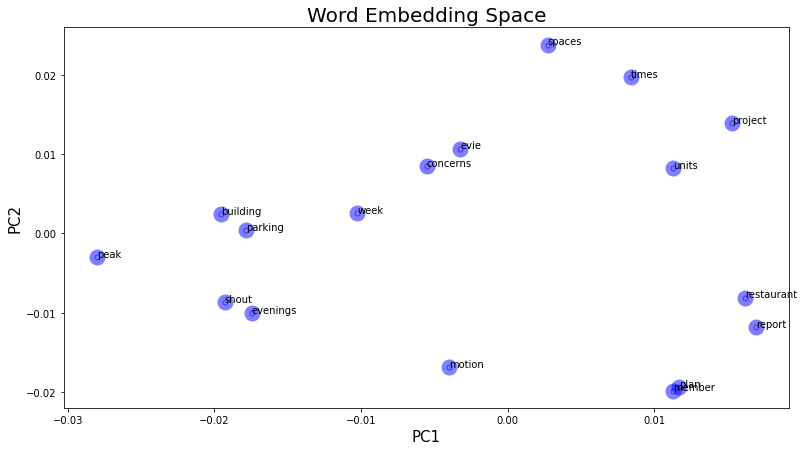

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue',alpha=0.5 )
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab):
    plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))